# Part 1
Team members:
* Marisol Velapatiño
* Ivo Kusijanovic

# Part 2

Some parts of this project require a good understanding of the Ultrasonic welding process. Find one or more research papers that explain this process in detail. Then, write a brief description of the Ultrasonic welding process in a single short paragraph, and ensure you correctly reference your data source(s). No AI summary report. Write your own report

Ultrasonic welding has become important in the advent of technologies where lightweight innovations are rising. These can be related but are not limited to the automobile, aviation, and in general transport industries. Composite joints can be made up of different materials, plastic, paper, stainless steel, aluminum to produce high-end quality lightweight parts. Ultrasonic welding is an industry preferred process thanks to its fast welding time to connect components into a solid state. The ultrasonic welding process is a projected type technique of binding : The process needs a vertical force that makes contact with the components through a horn. These components are placed in an anvil and oscillet at high frequencies in the kHz. The energy used and other parameters are dependent on the material being welded. In this project the following will be analyzed: ....

# Part 3
Part 3 Learn to use datasets (30 points):
An ultrasonic welding machine was used to perform a set of experiments. A total of sixty-nine
welding experiments were conducted across seven pressure levels (psi): 10, 20, 30, 40, 50, 60,
and 75. Each condition was repeated ten times. During the welding experiments, two types of
signals—power and force—were collected for each sample. Subsequently, a peel test was
performed to evaluate the welding quality. Based on the results, the samples were categorized
into three classes (as shown in Figure 1): cold, excessive, and good. Dataset: Part3.zip

## Part 3.a

Data preprocessing (5 points): As shown in Figures 2 and 3, the power signals consist of a
main-weld segment and a post-weld segment, while the force signals include a pre-weld
segment, main-weld segment, and post-weld segment.

Based on a physical understanding of the welding process, we know that the main-weld segment is the most informative for quality monitoring. Therefore, our analysis will focus solely on this segment.
Develop an algorithm to automatically extract the main-weld segment for all welds. In your
report, briefly describe the algorithm and demonstrate its effectiveness using one example
for each type of signal. Specifically, plot the raw signal and highlight the boundaries of the
main-weld segment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

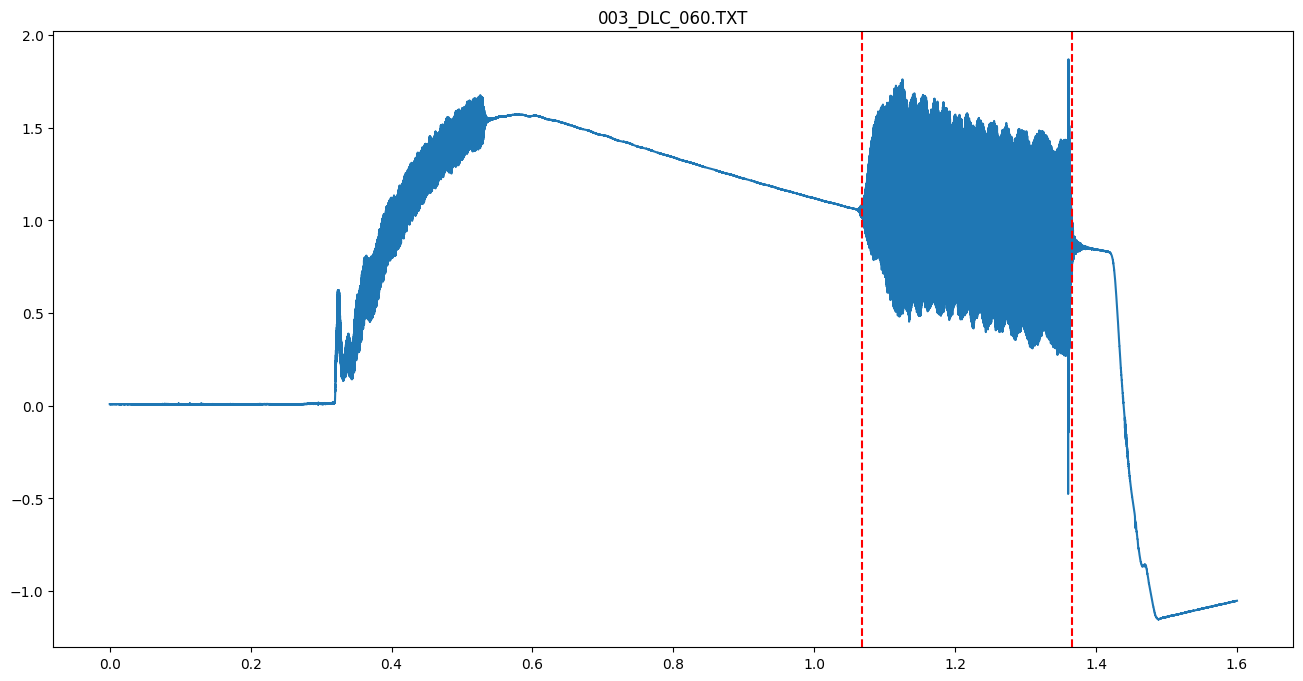

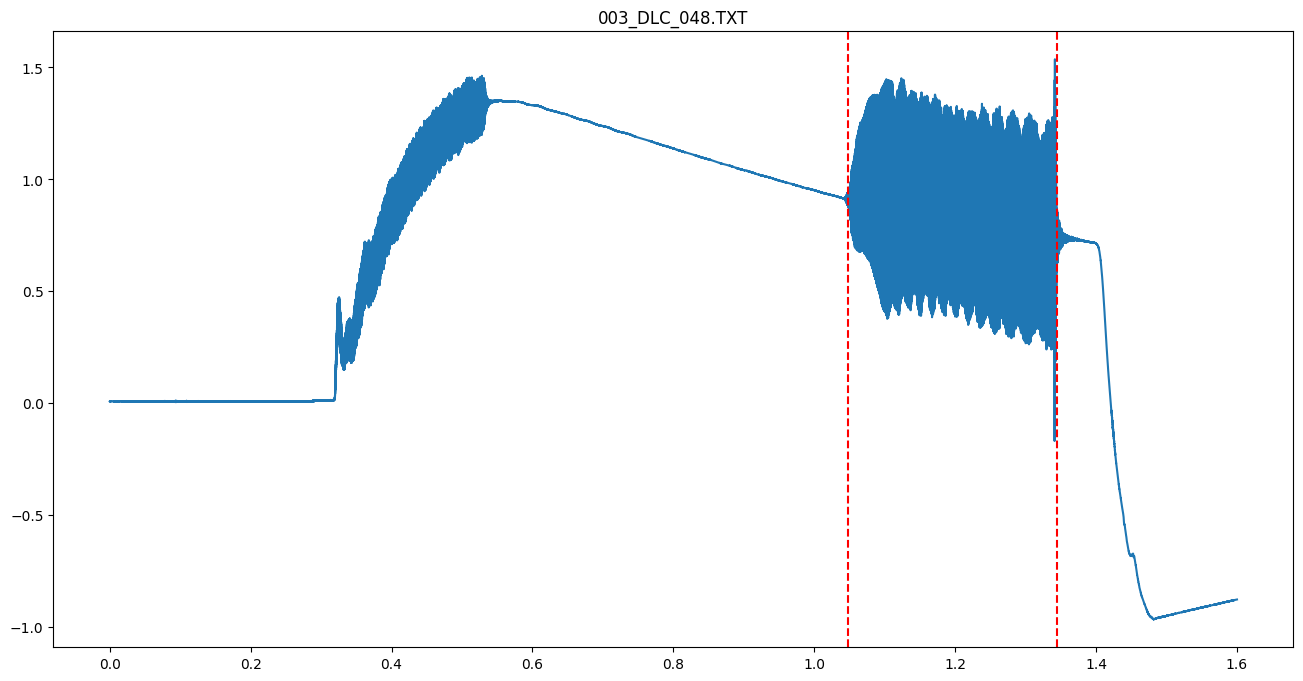

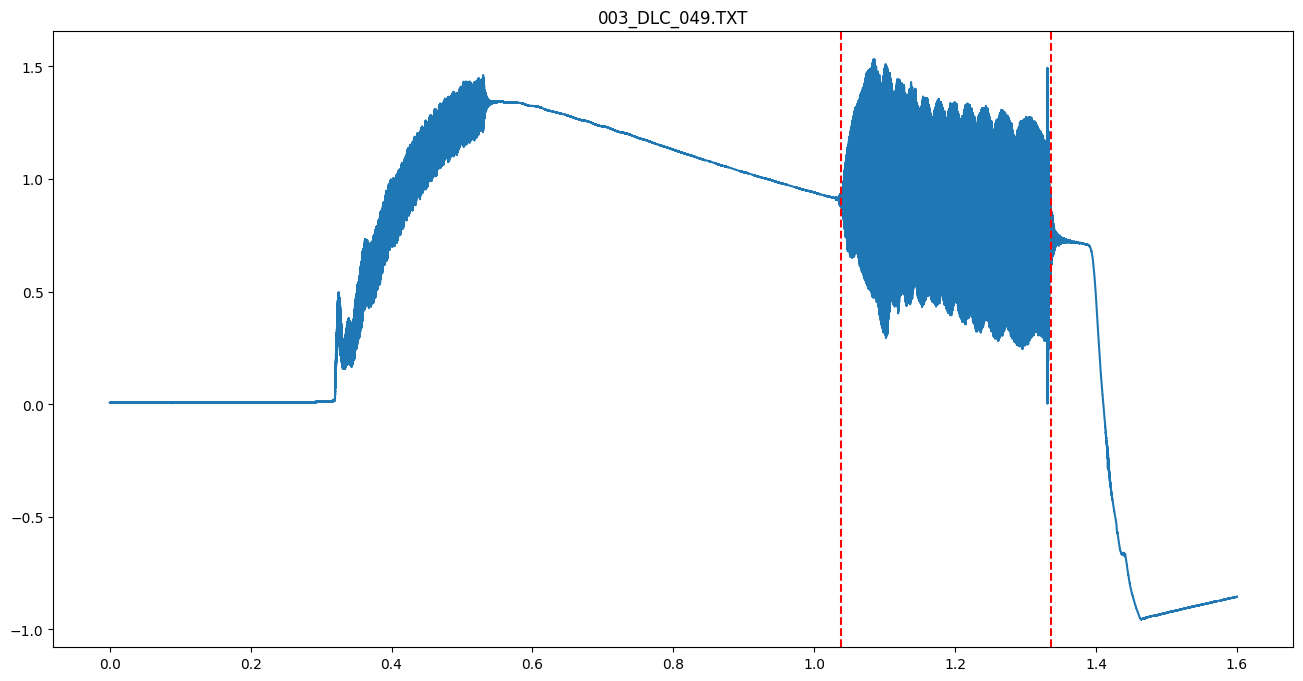

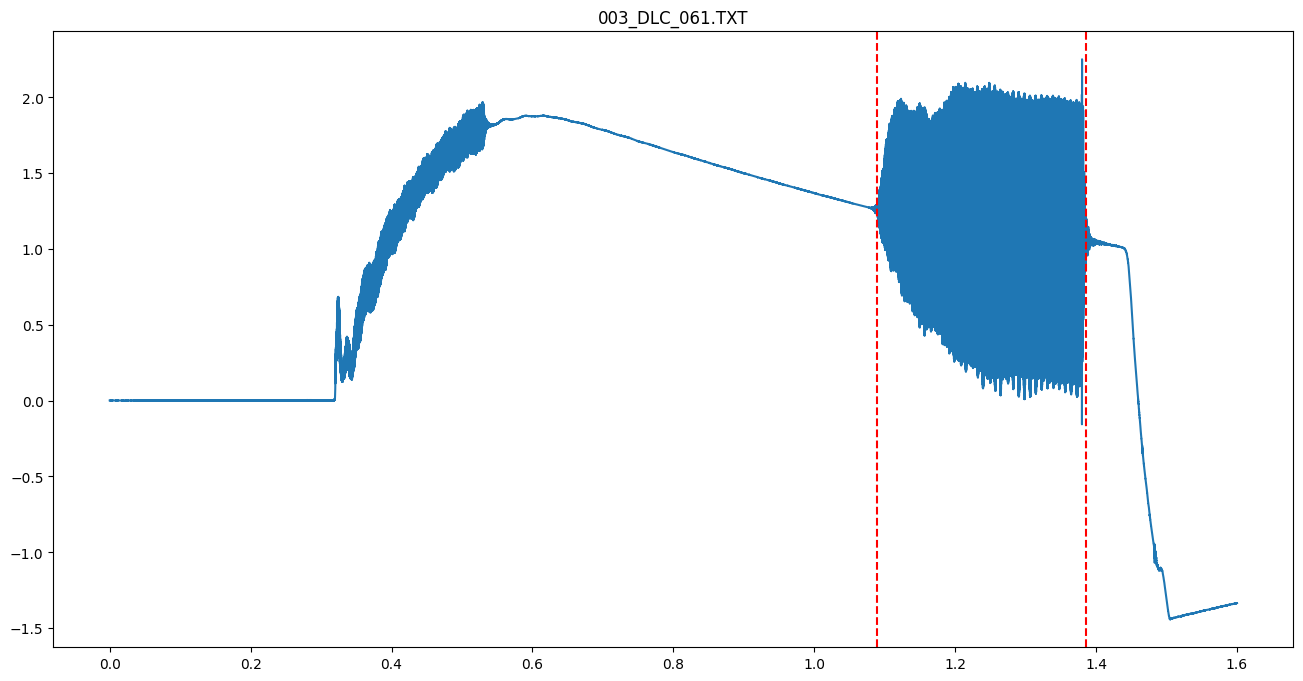

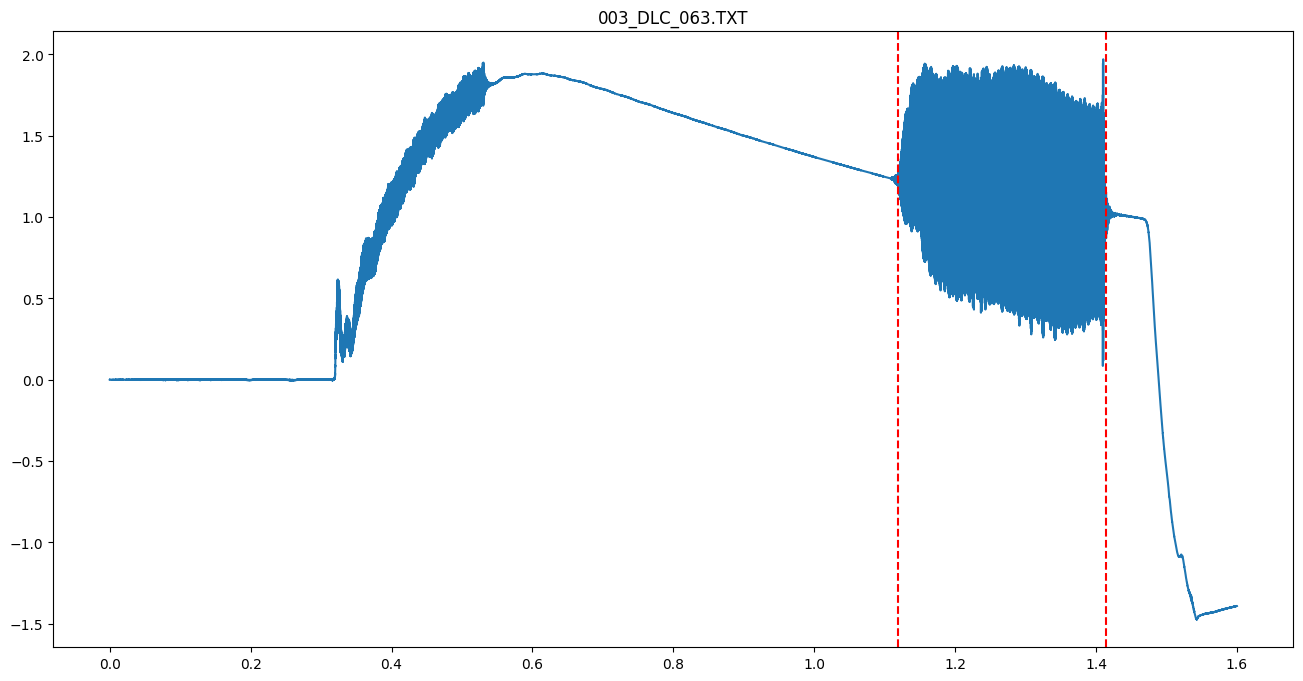

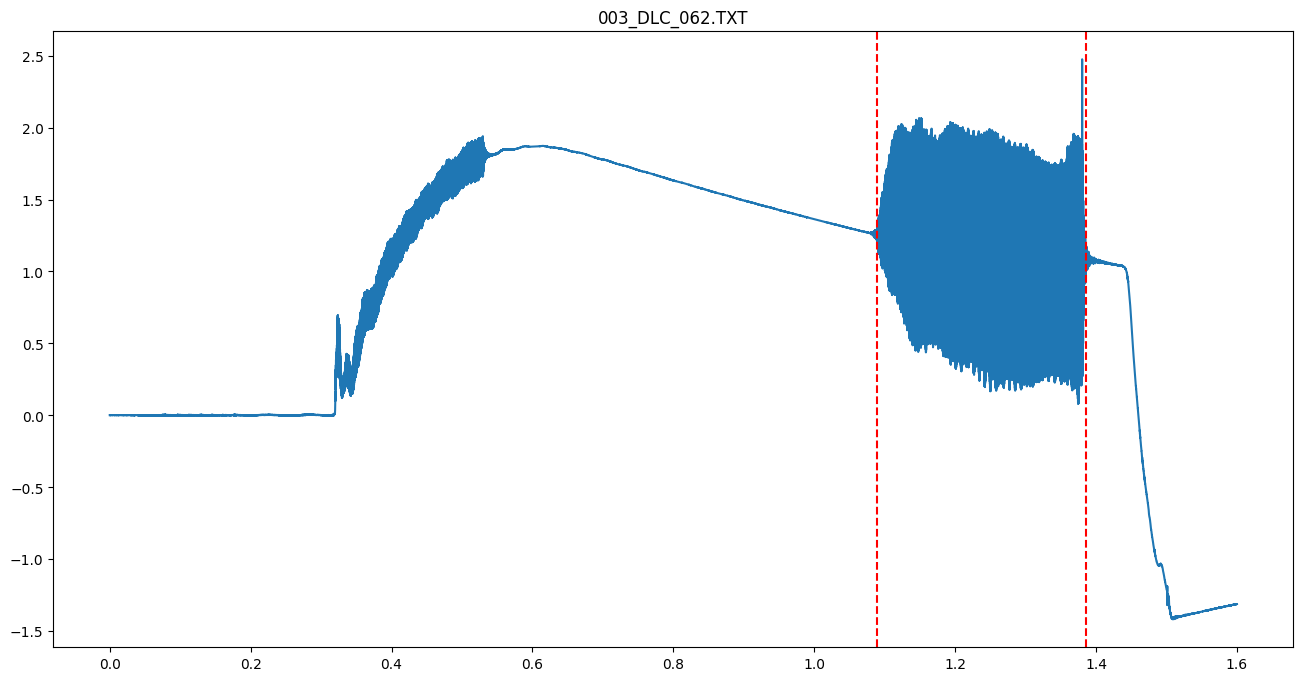

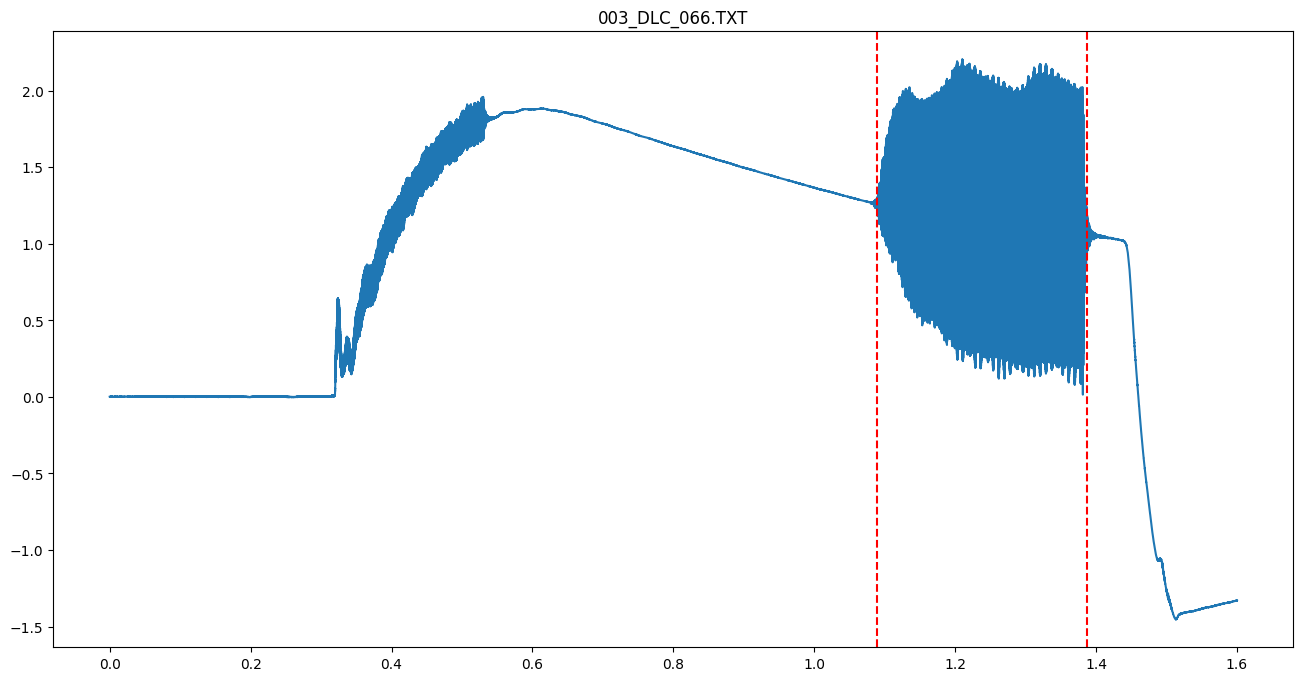

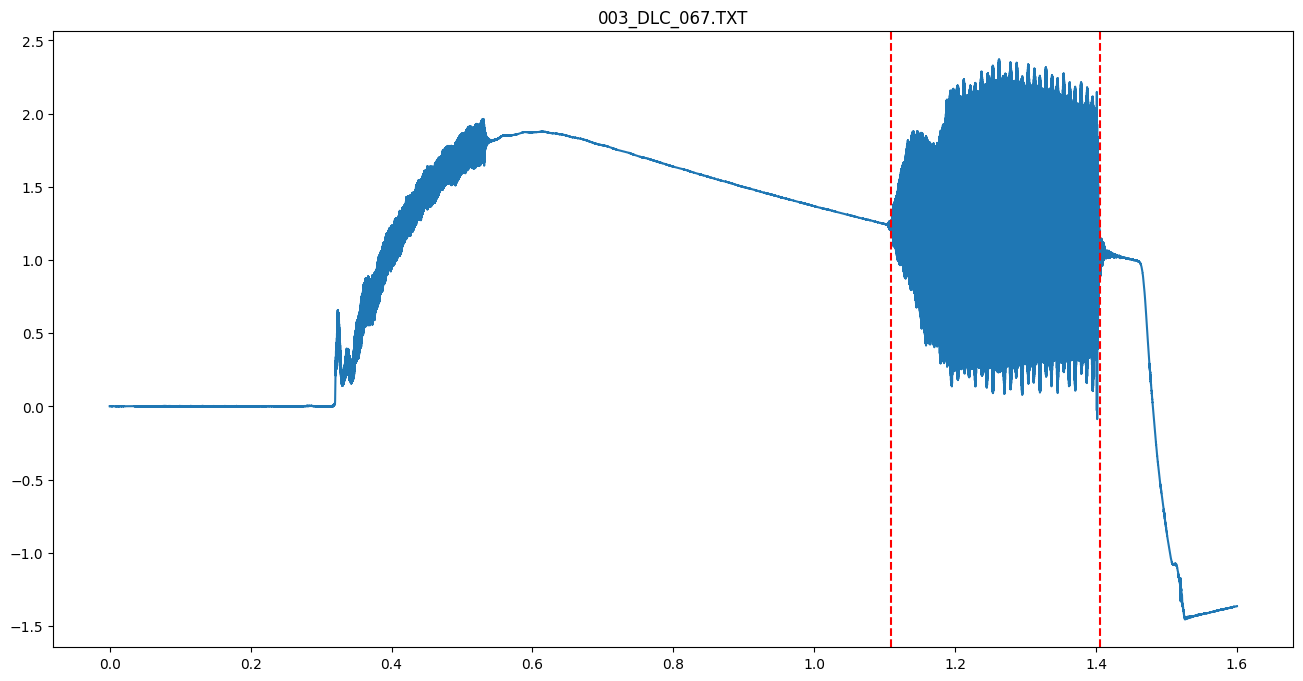

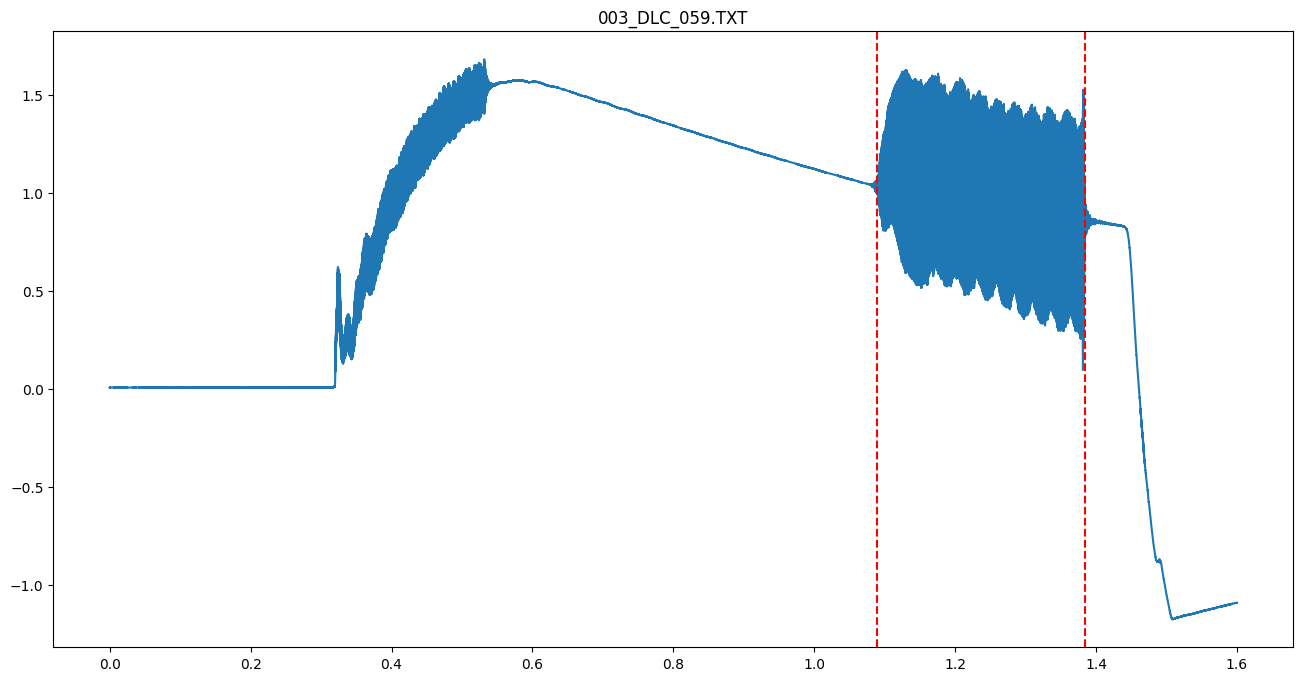

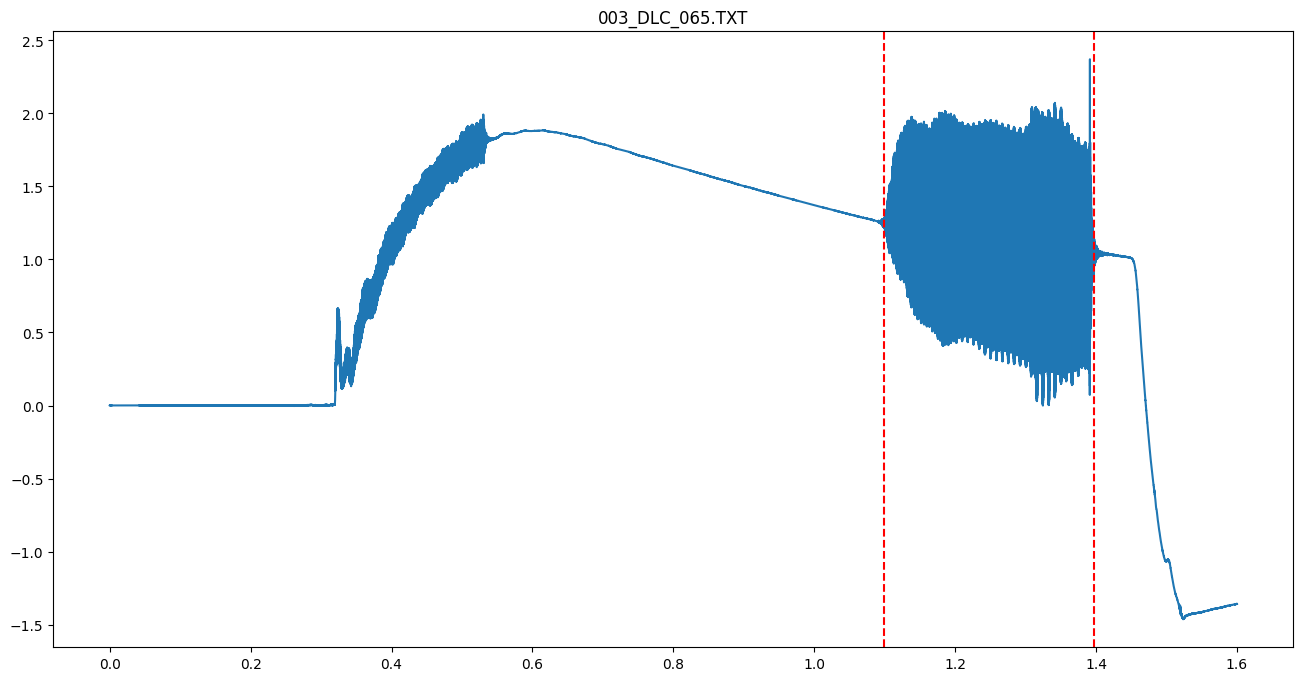

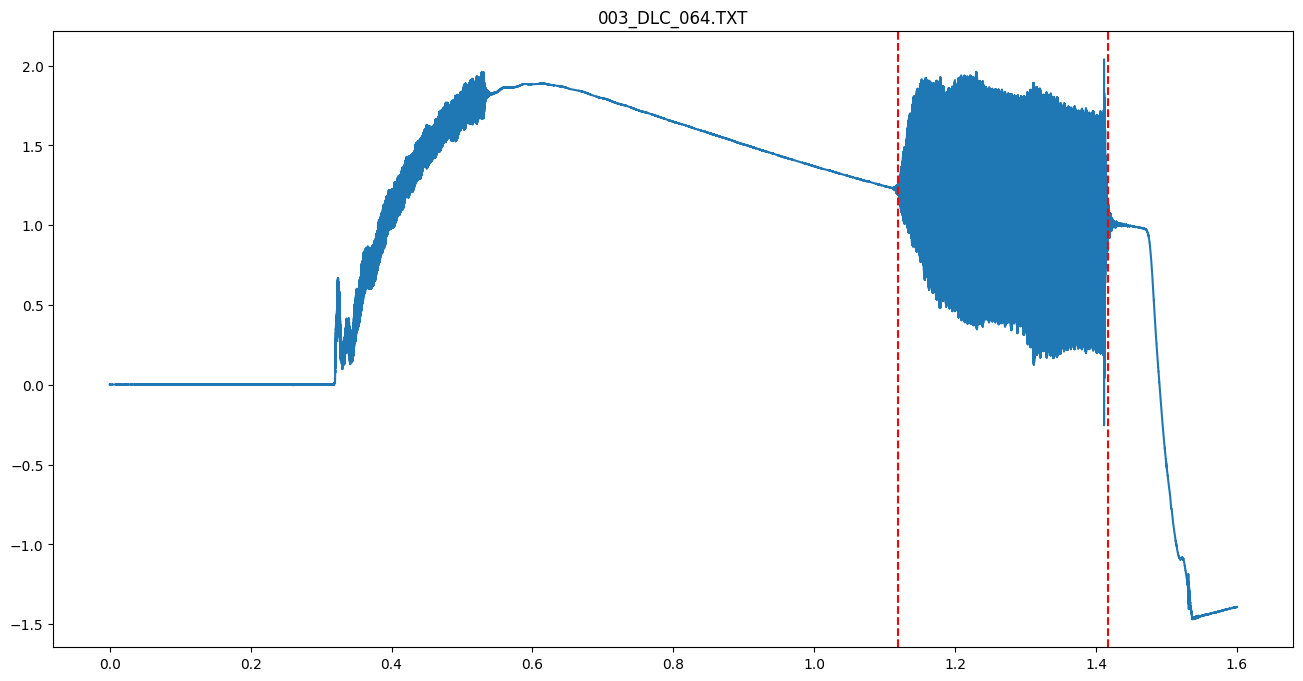

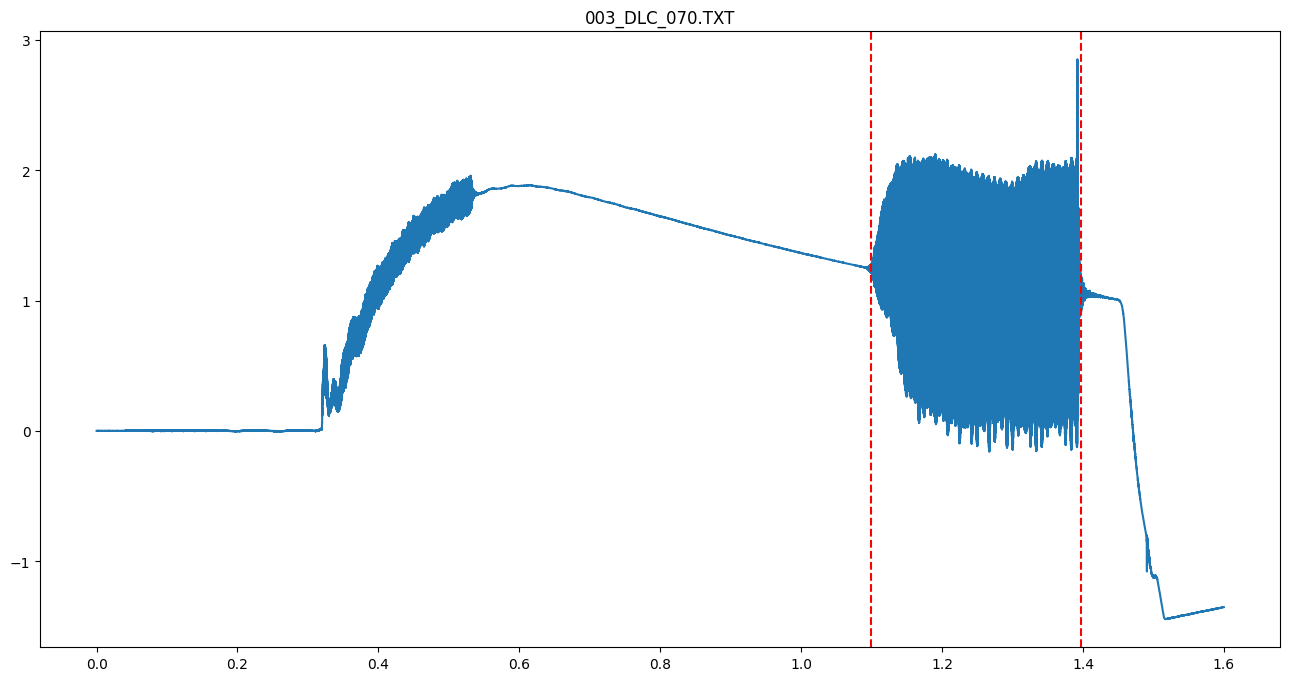

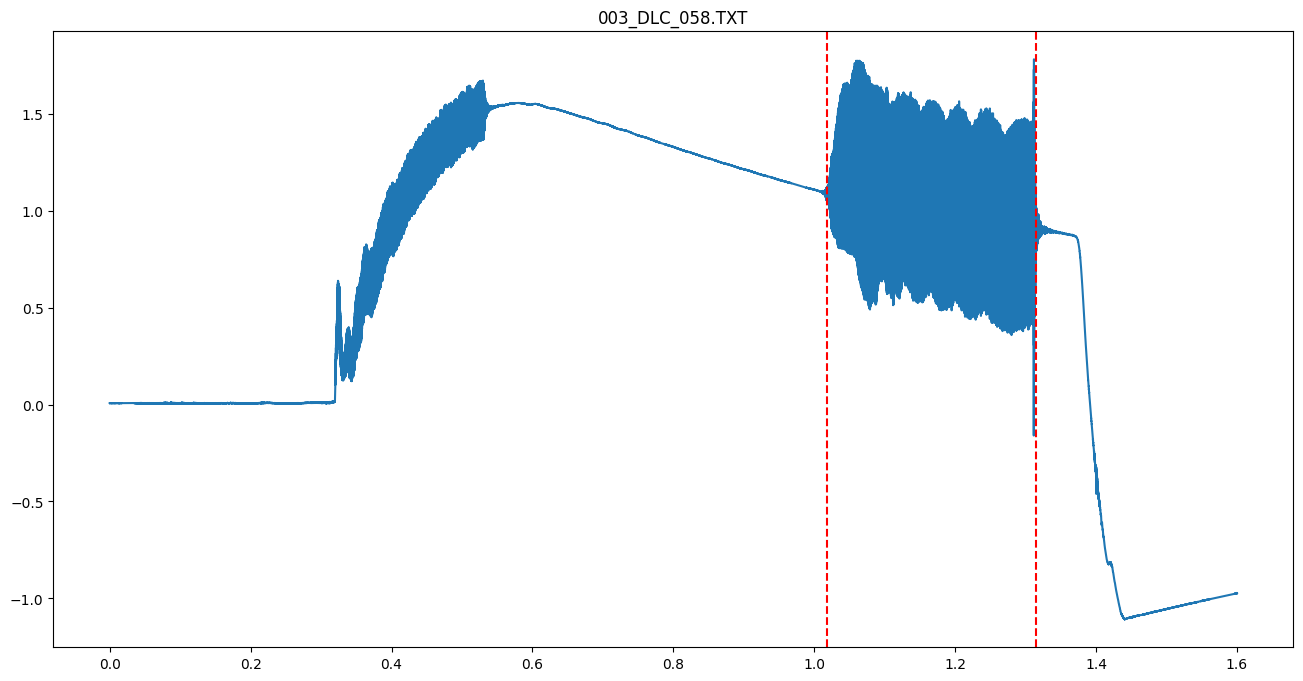

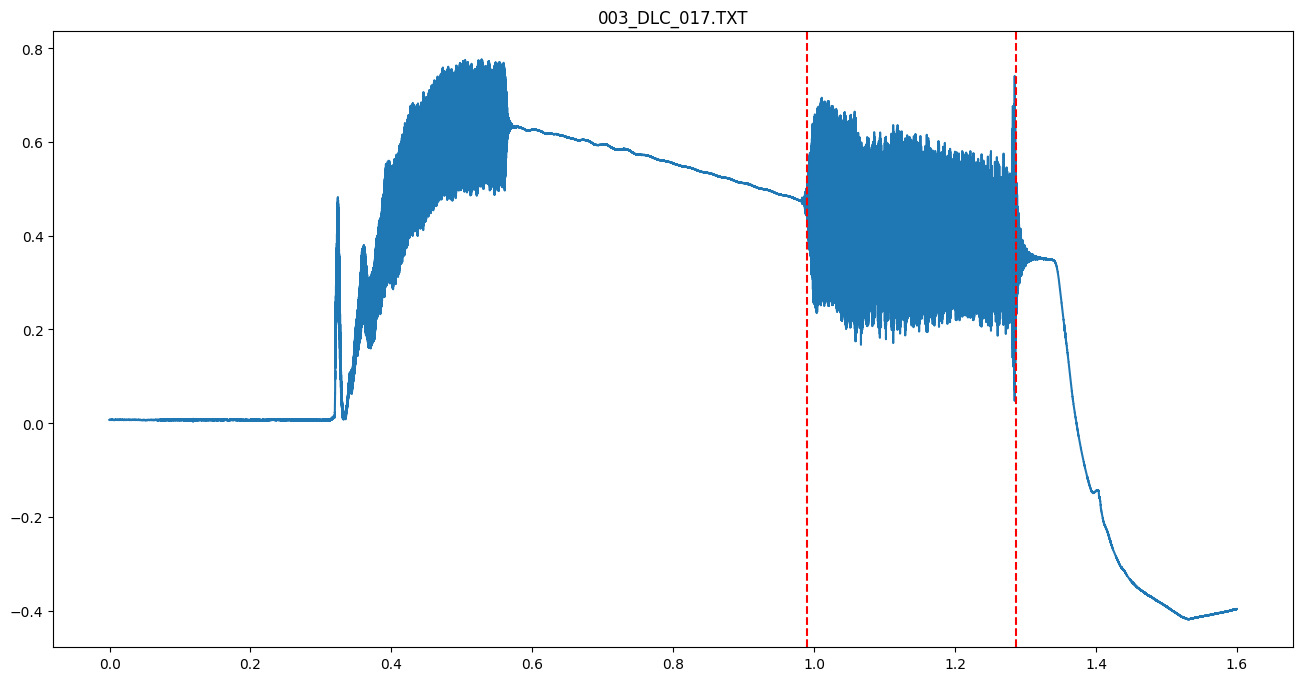

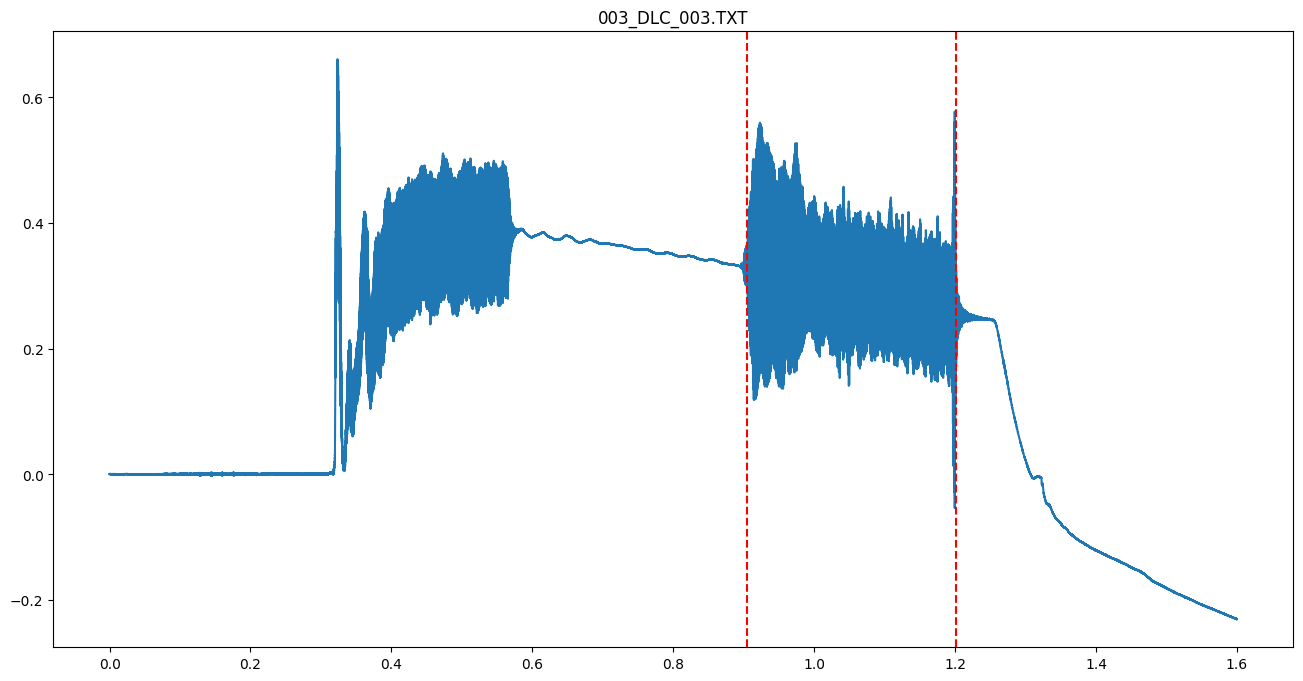

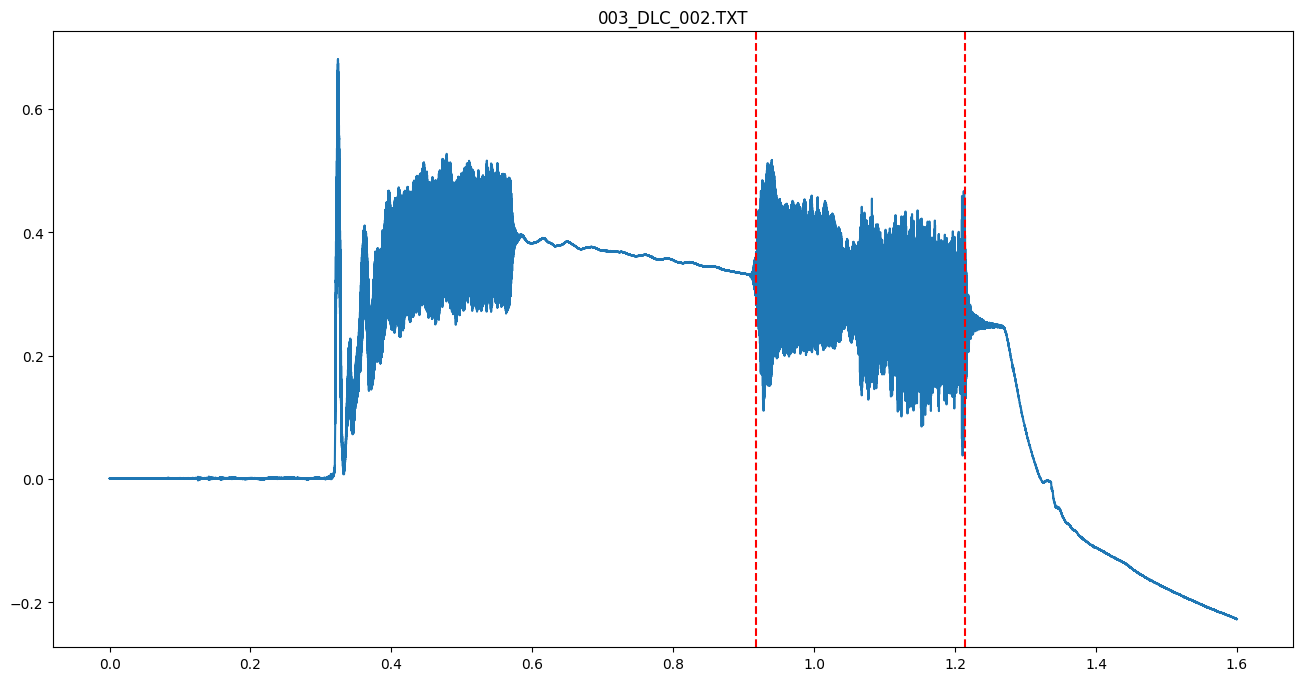

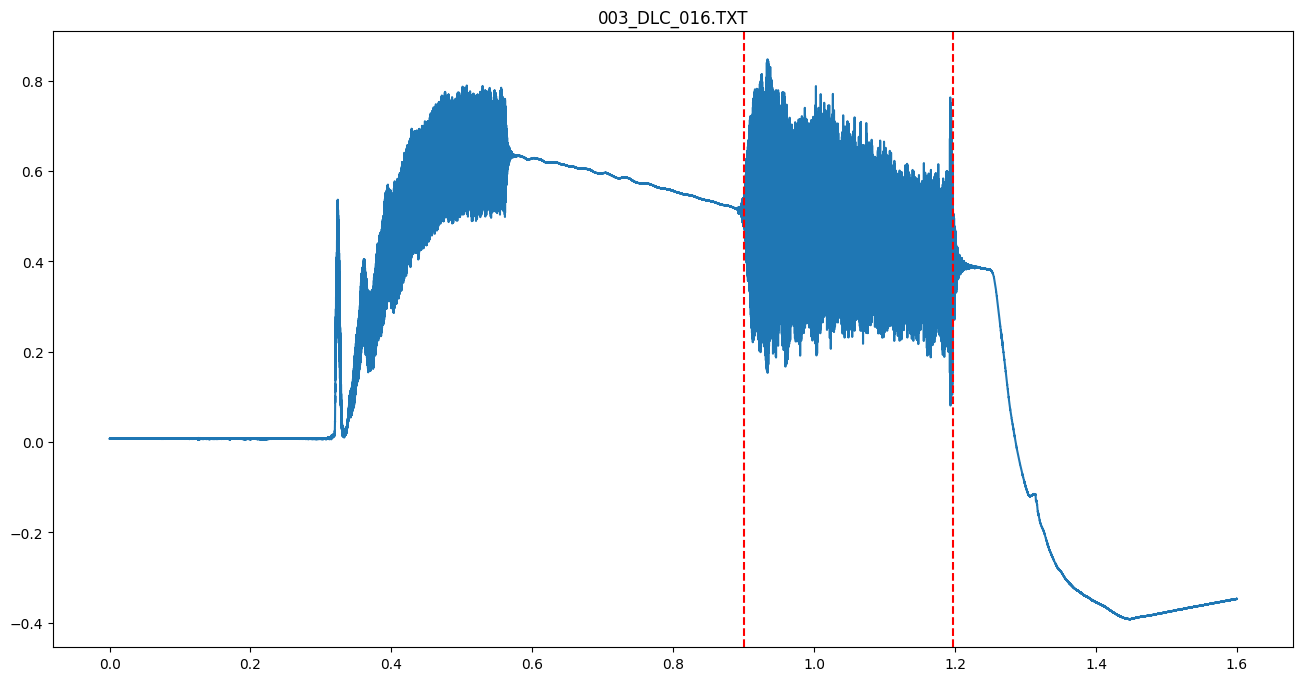

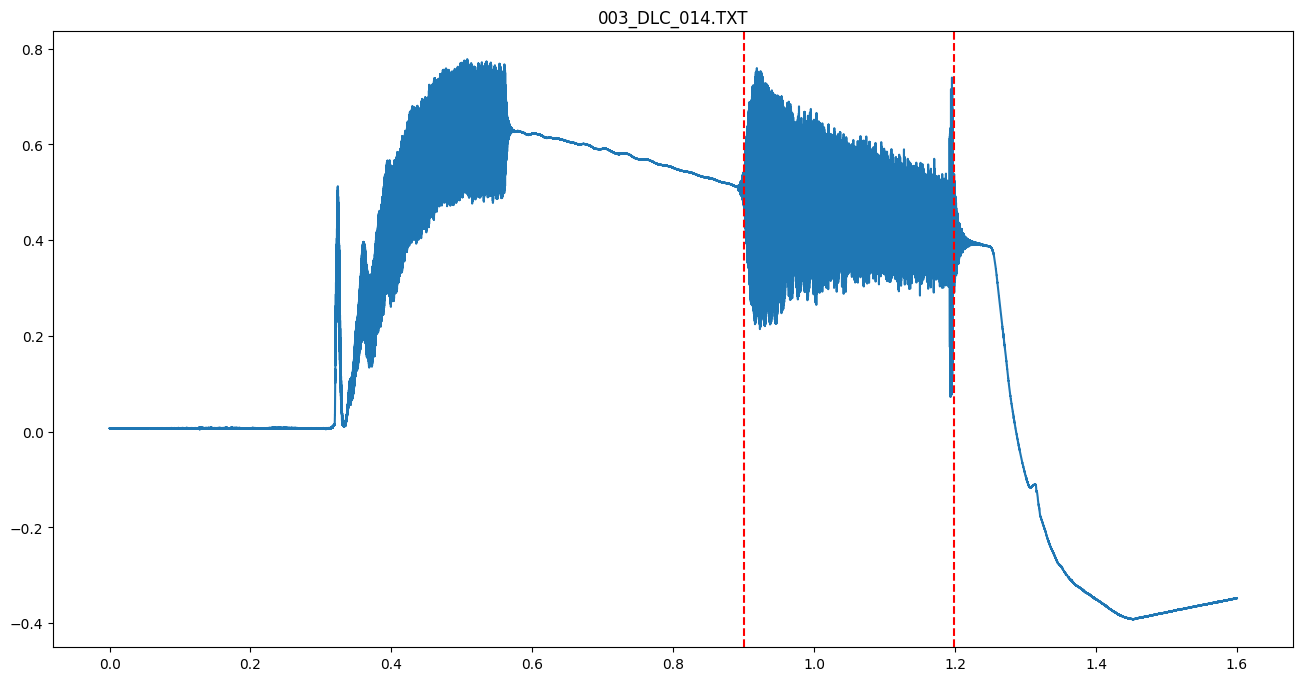

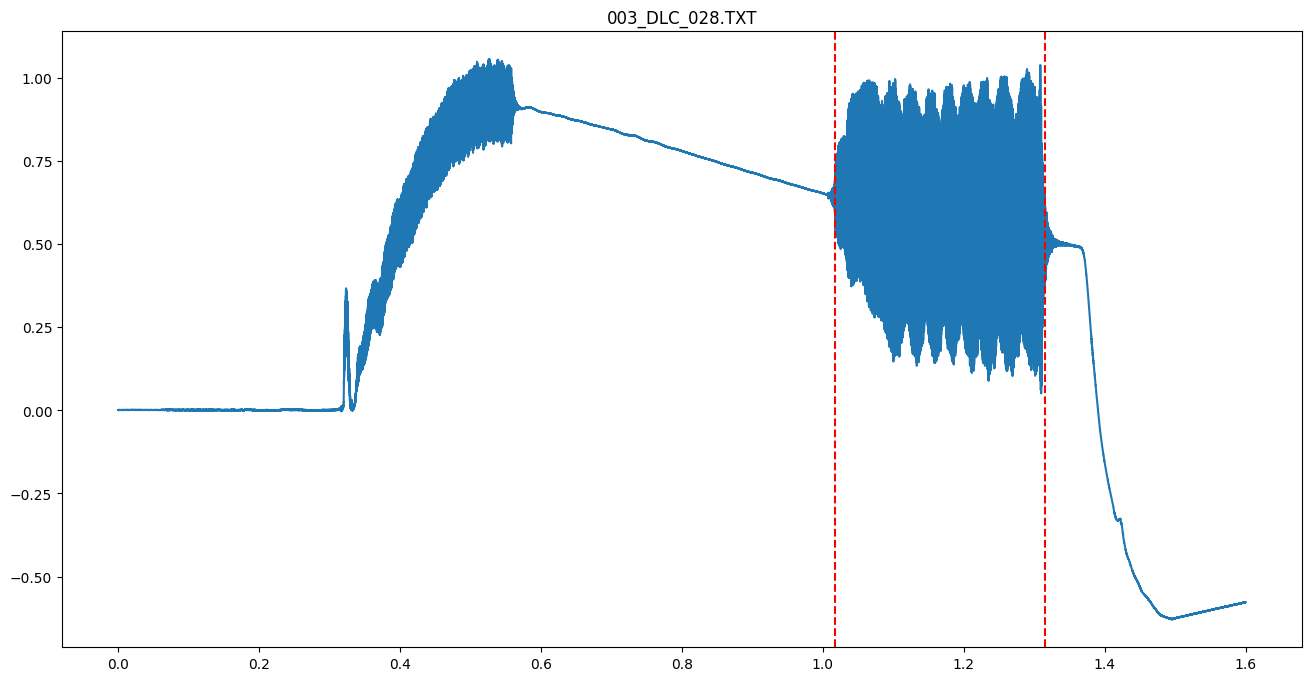

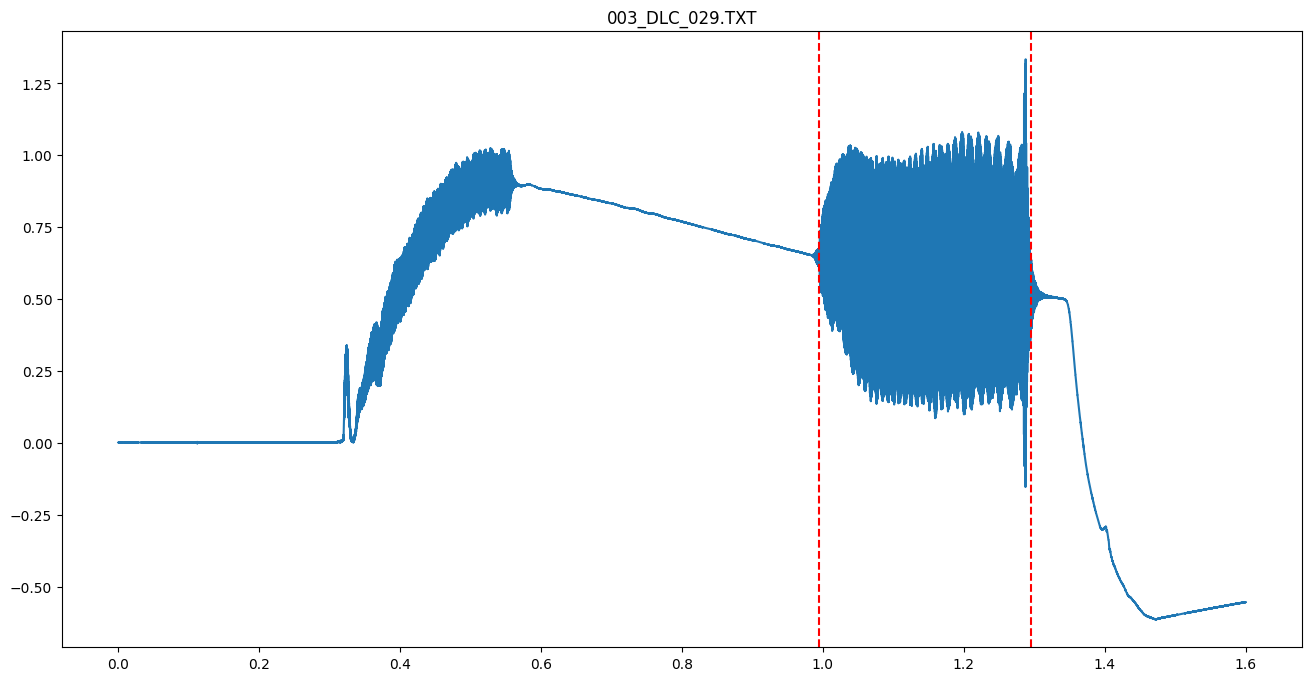

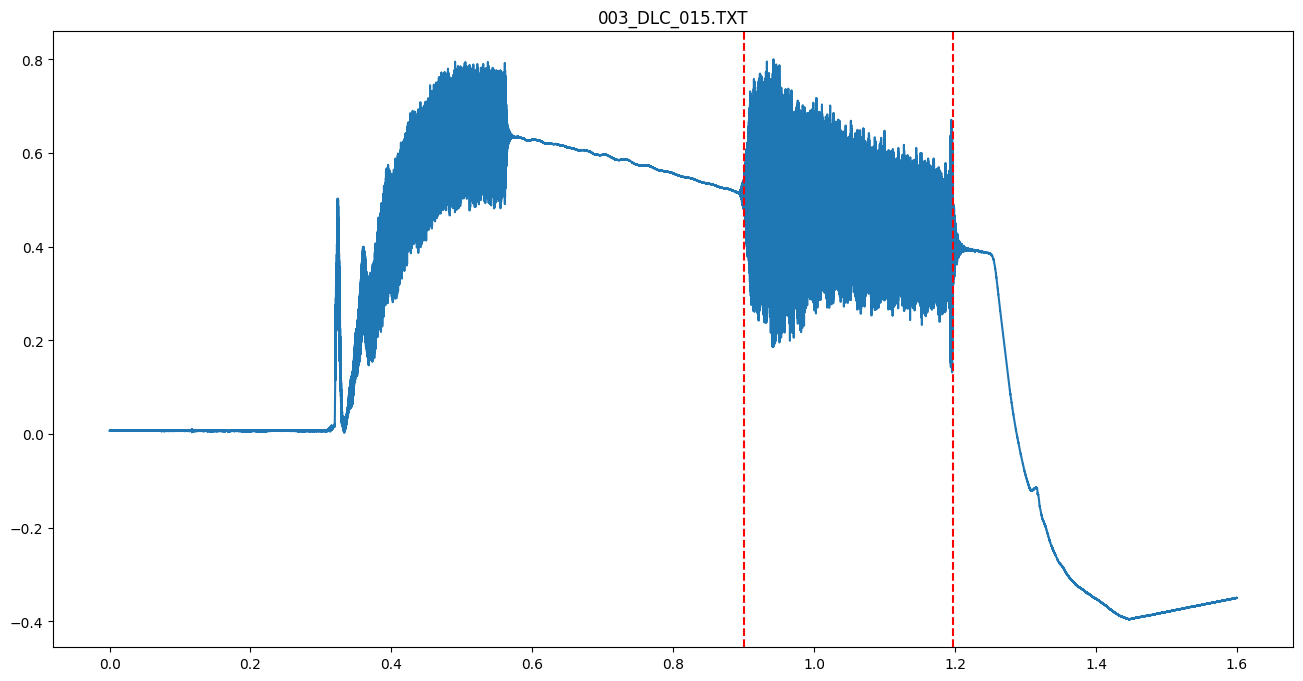

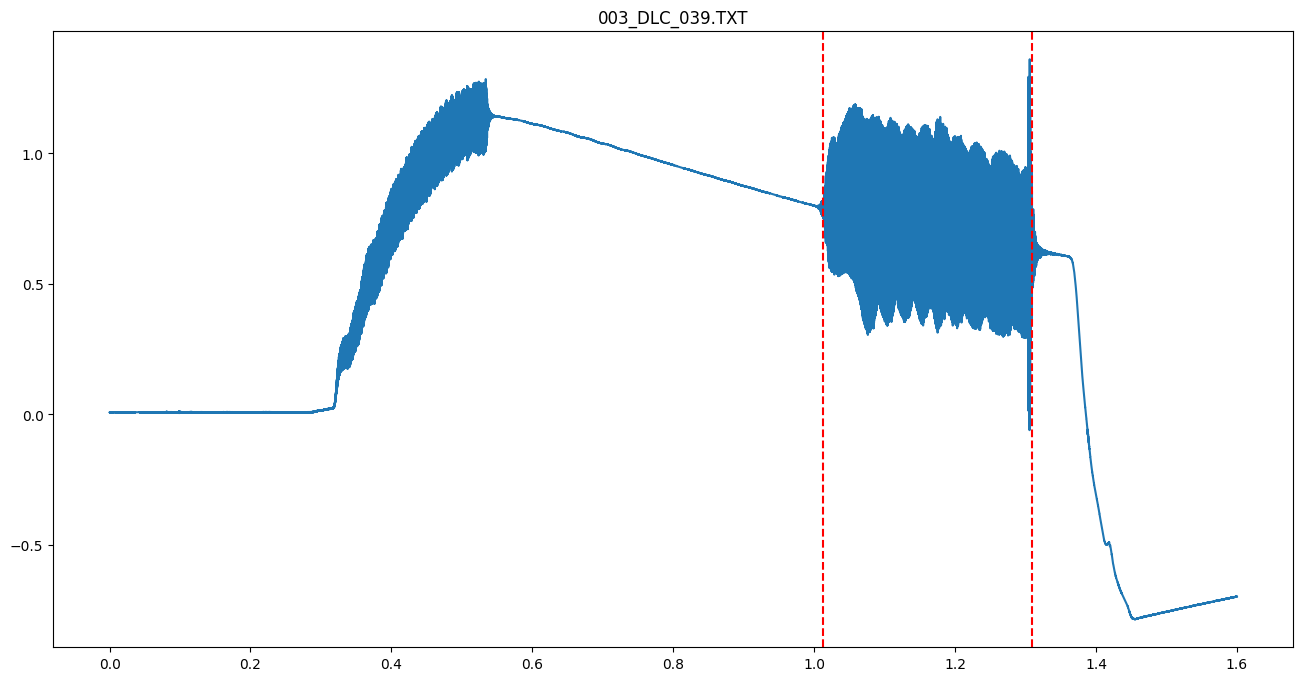

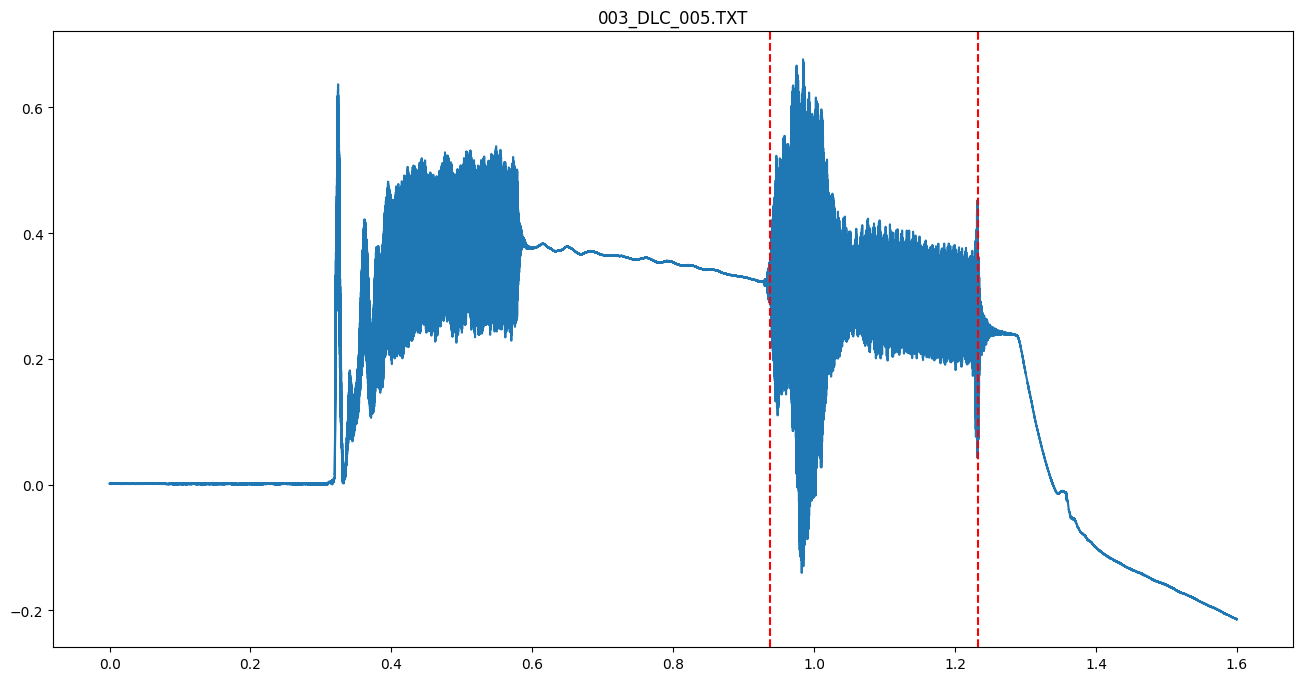

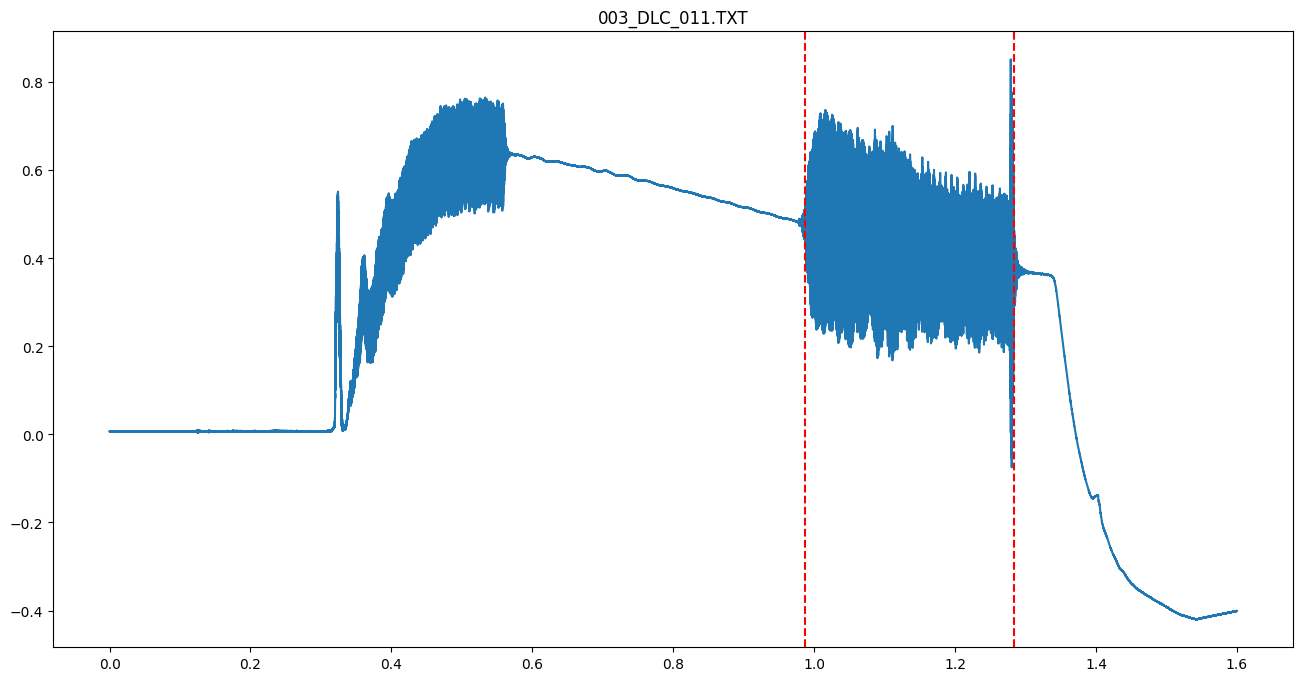

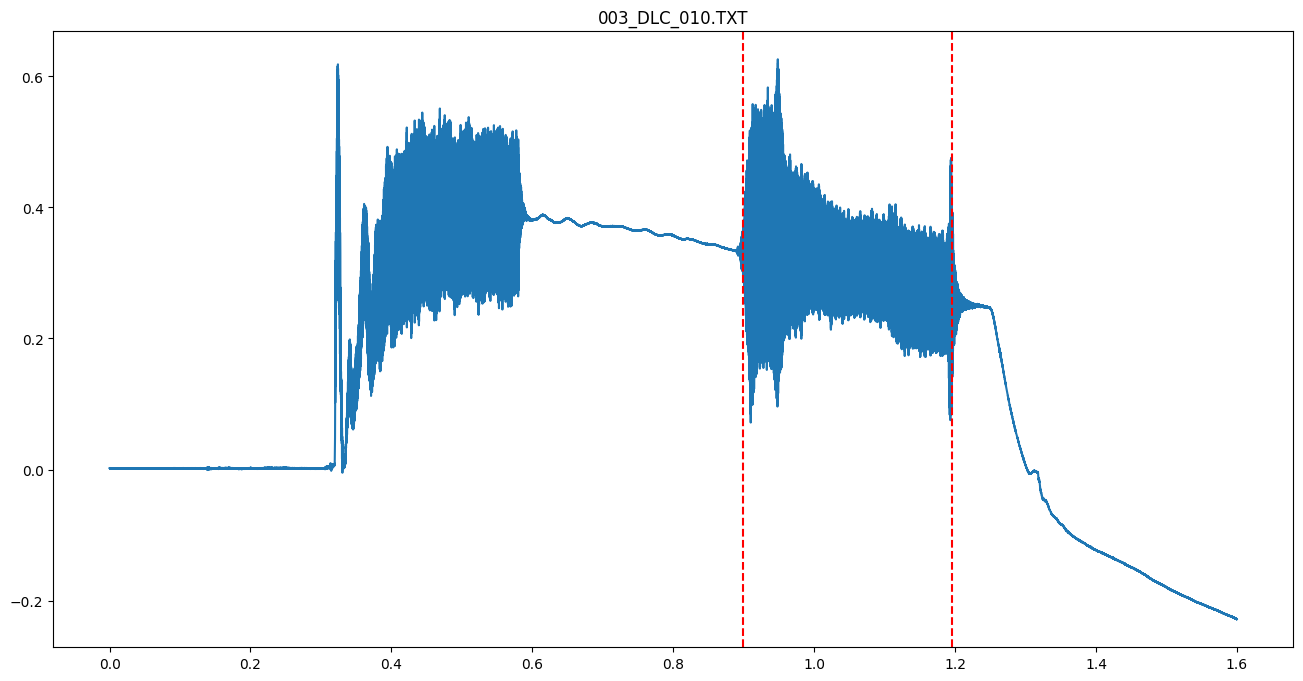

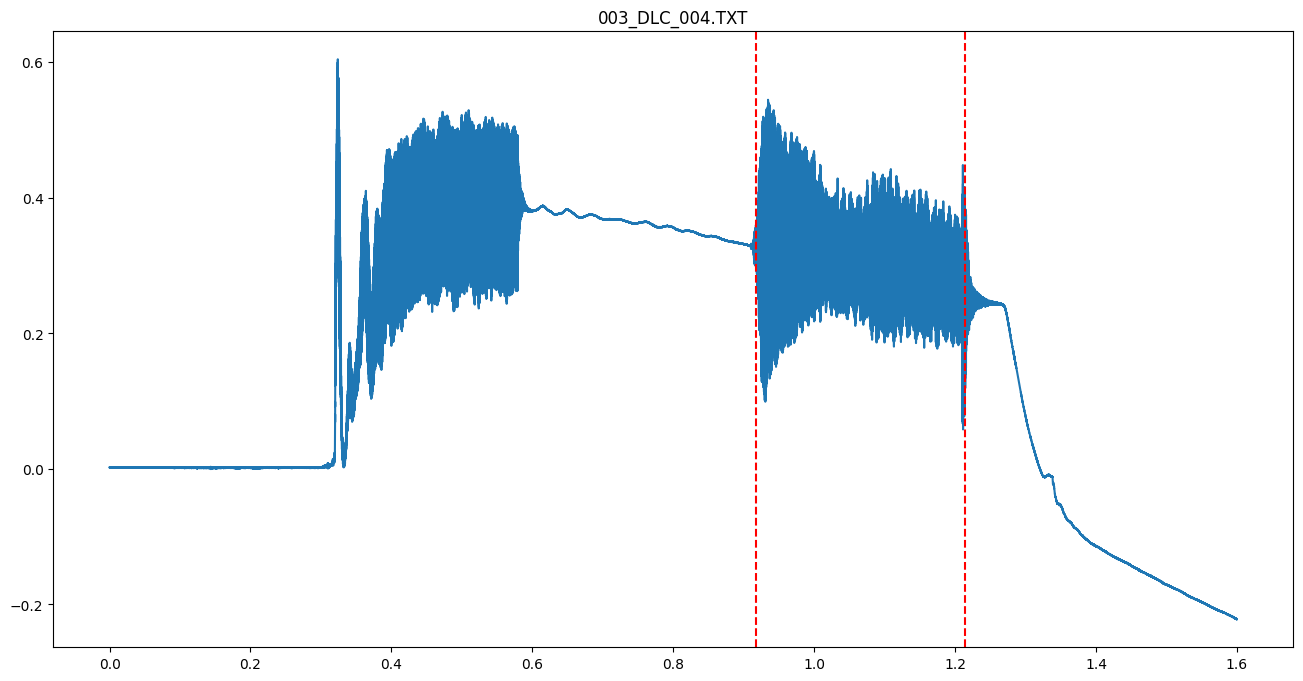

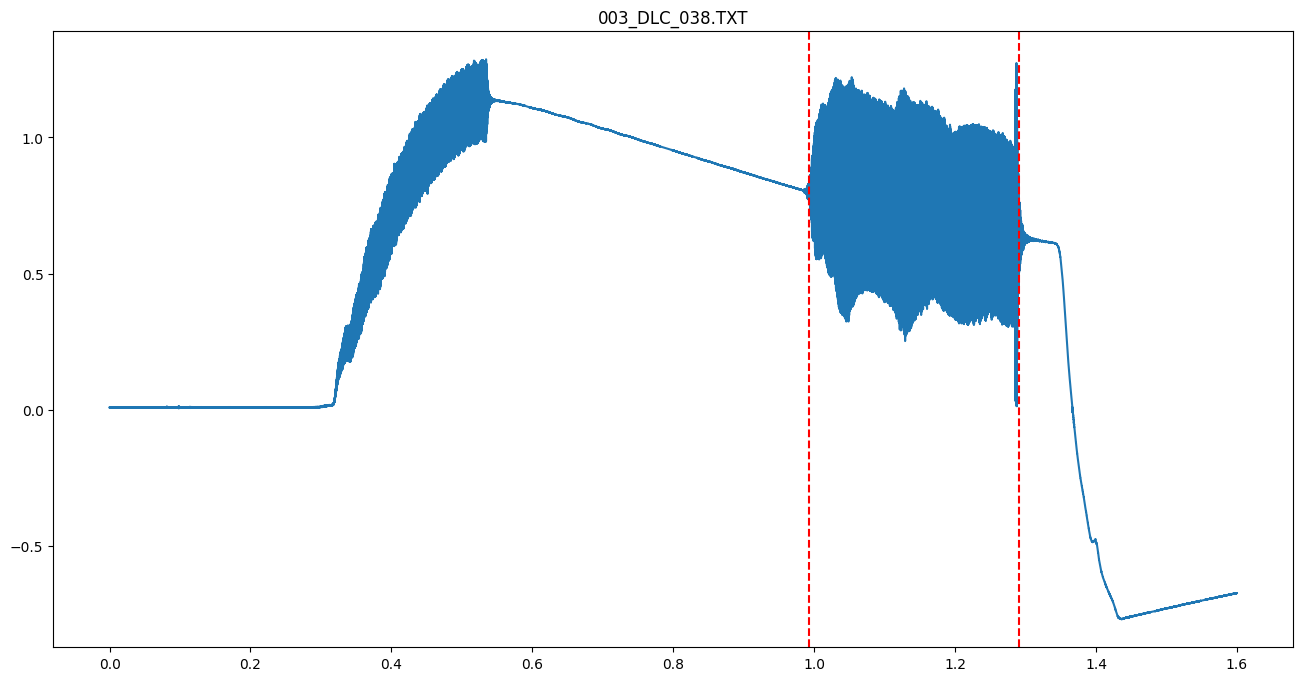

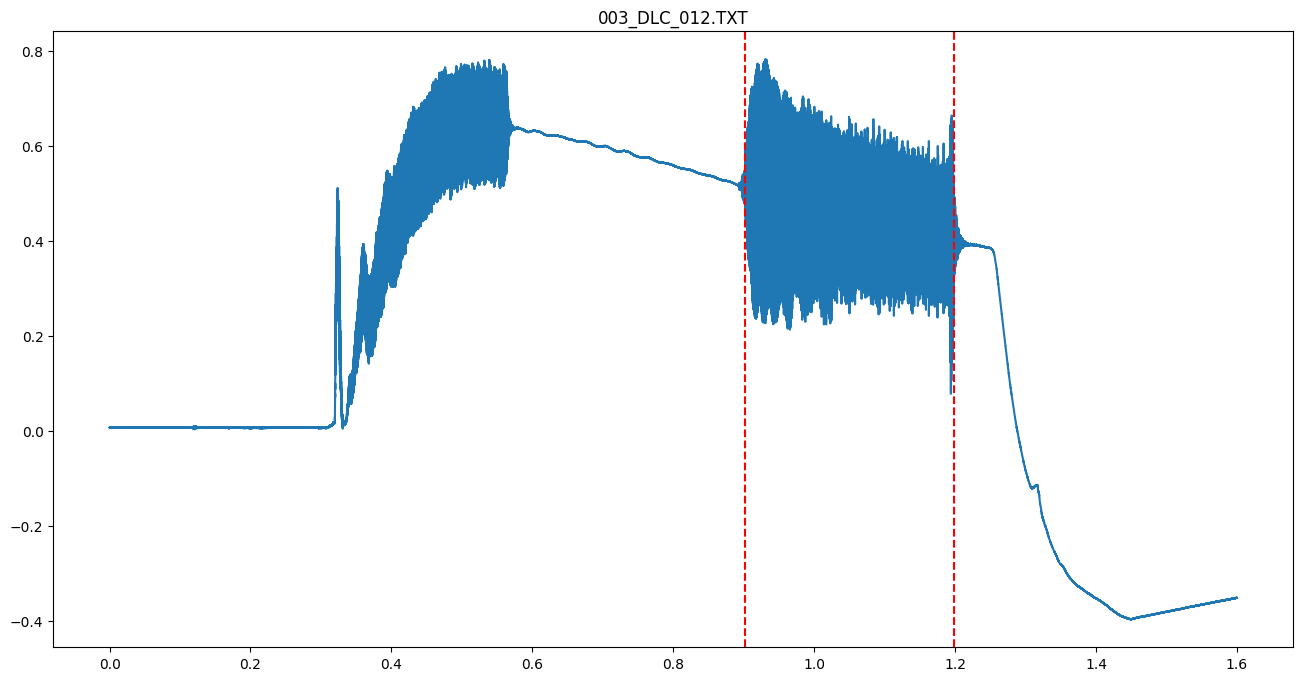

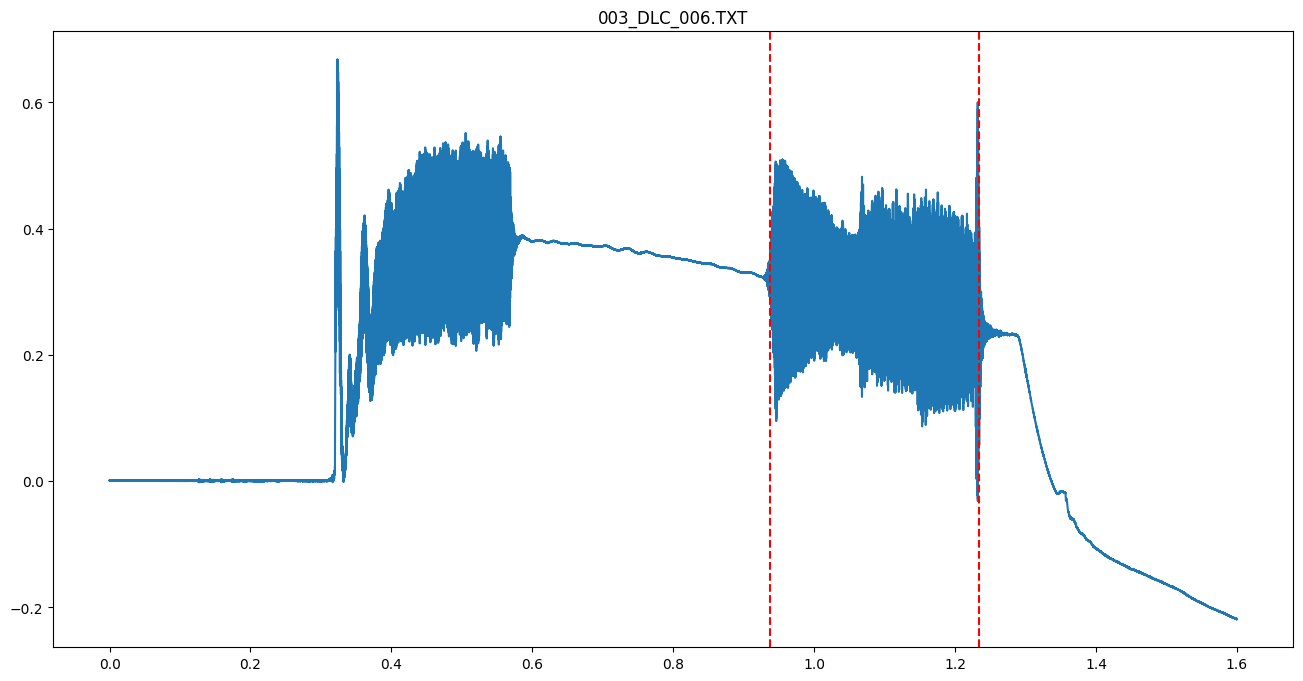

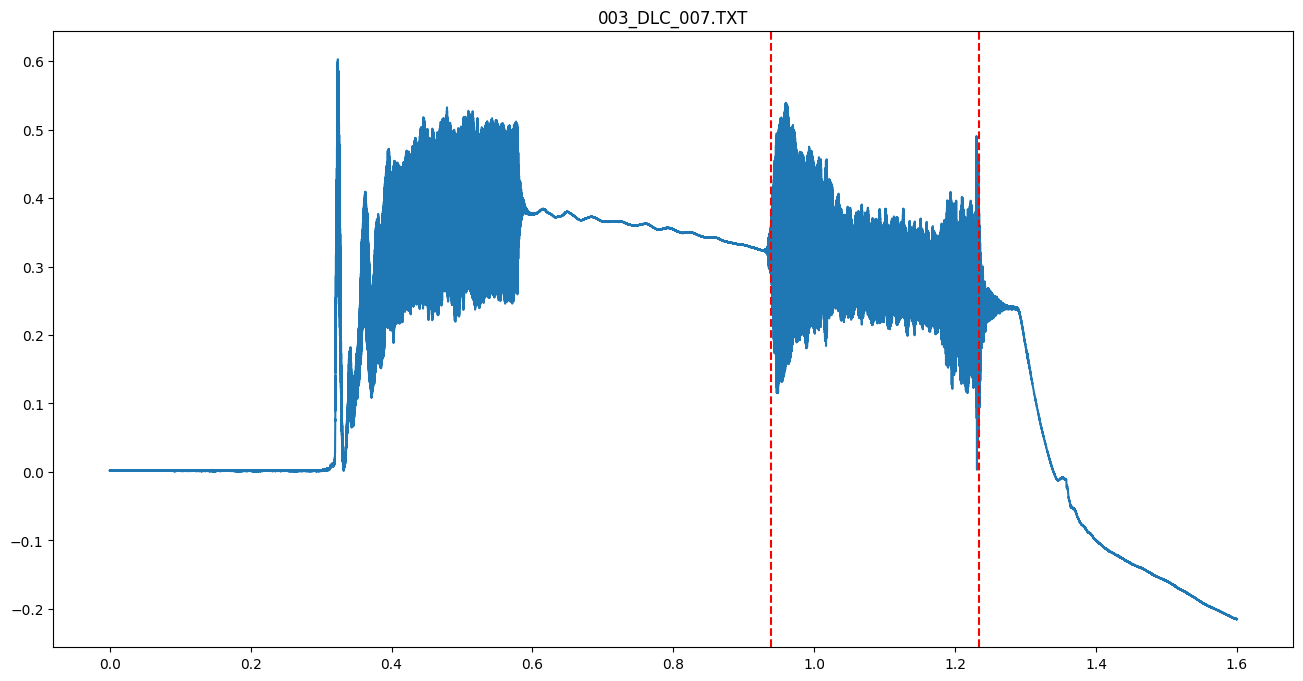

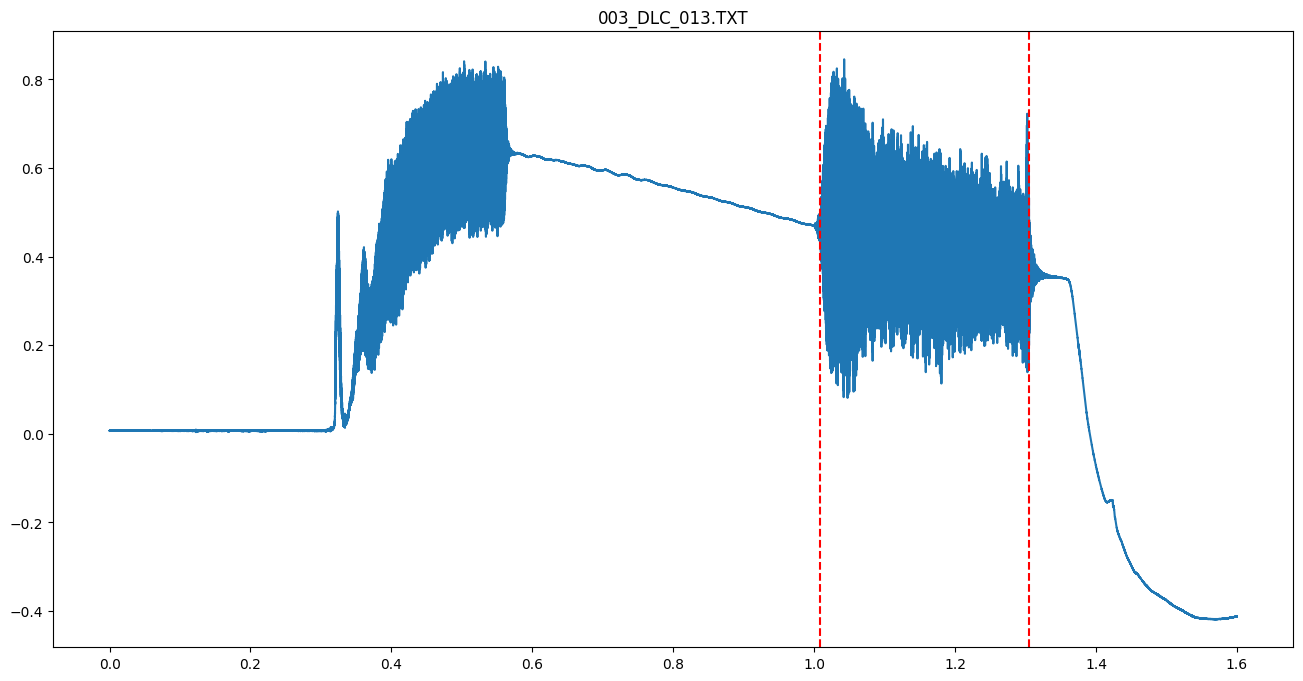

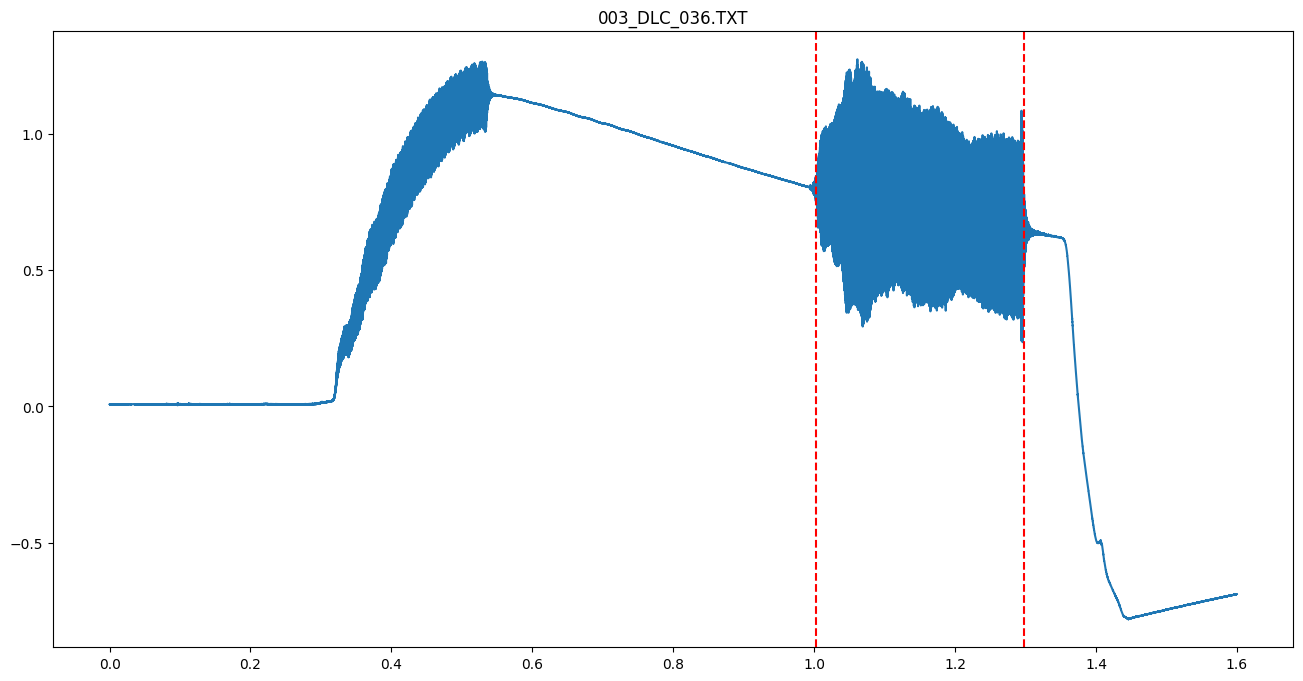

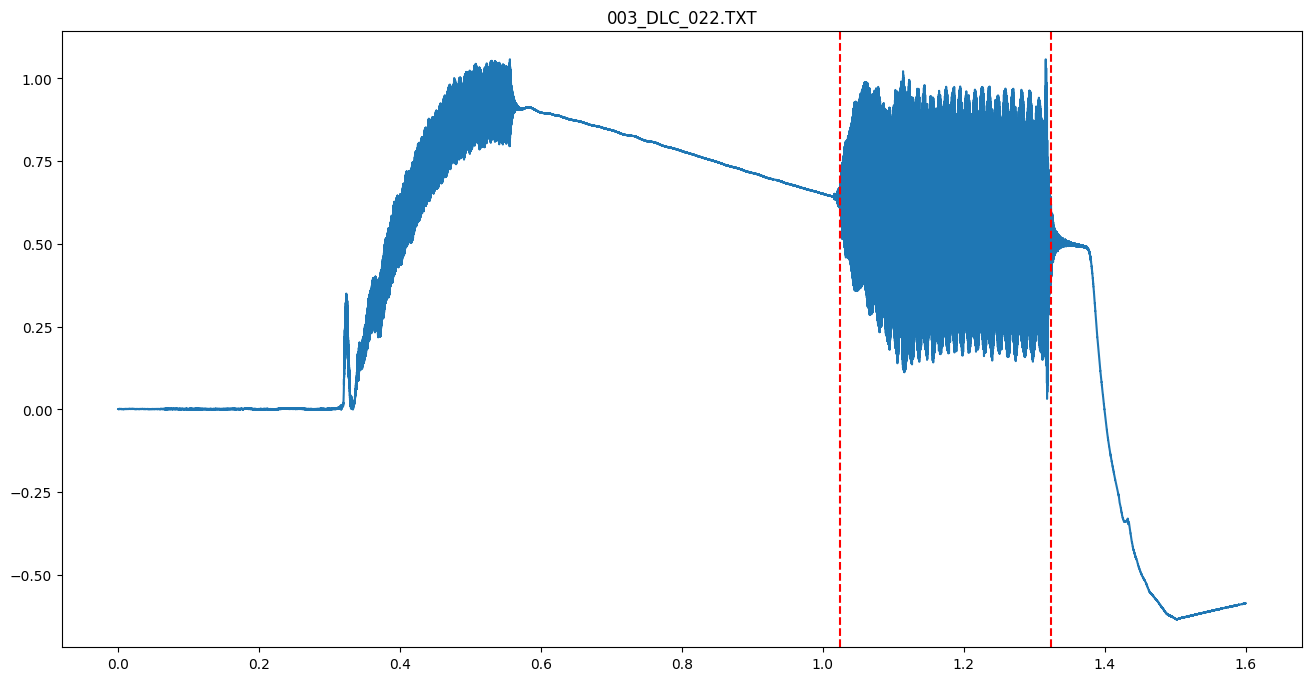

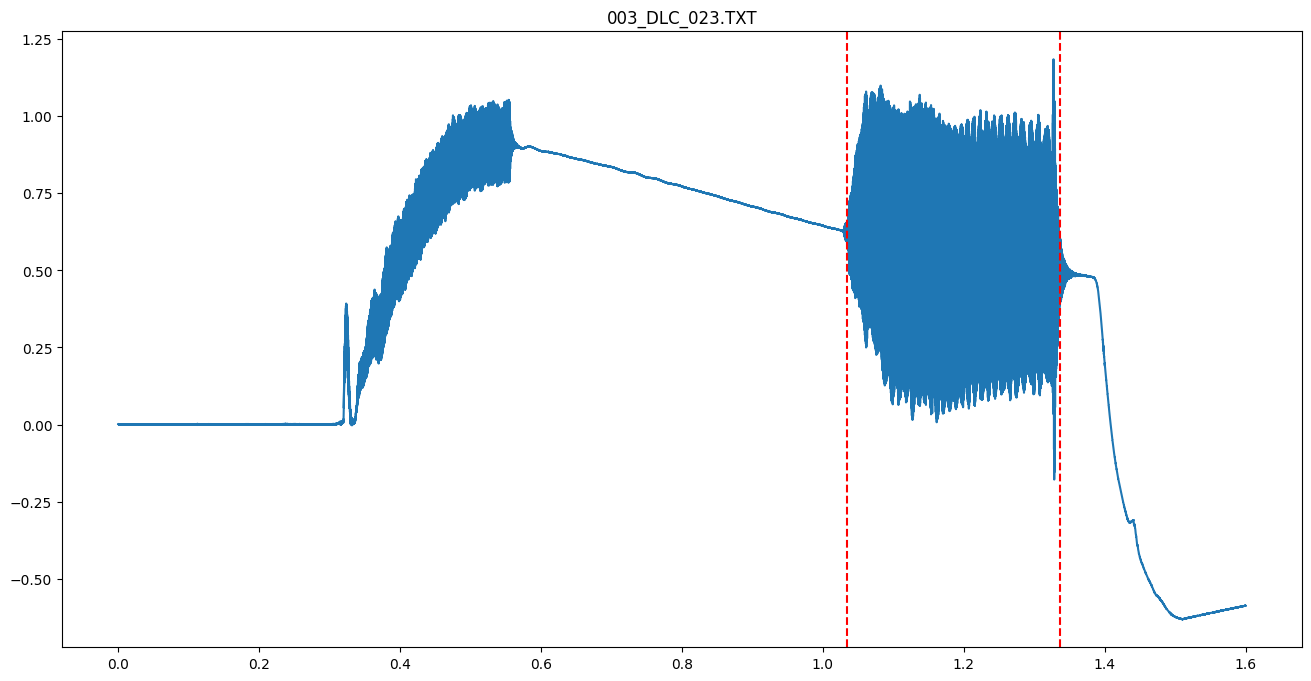

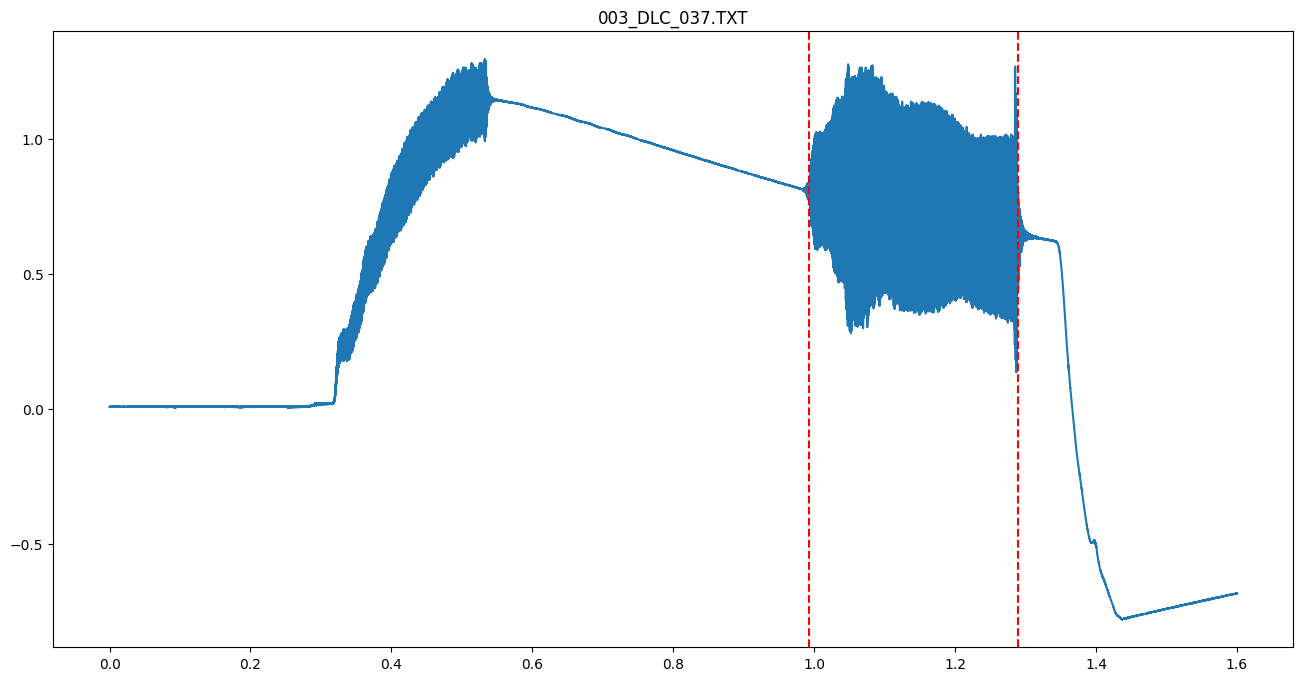

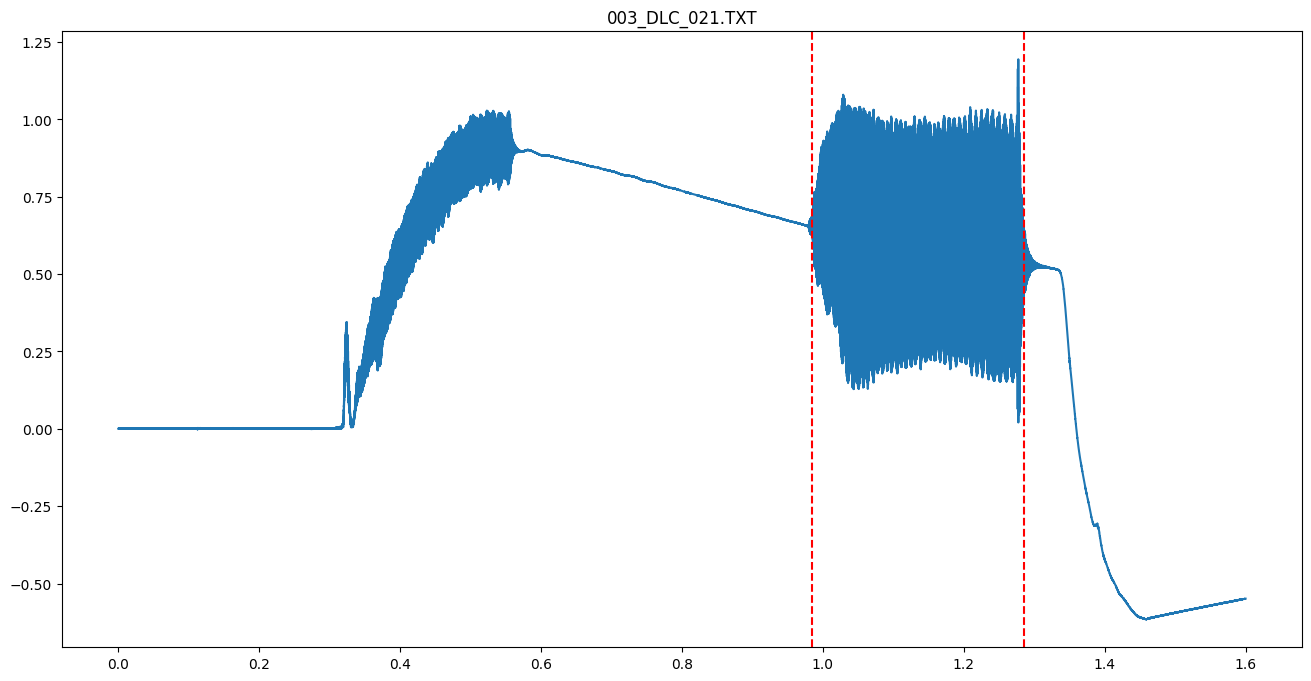

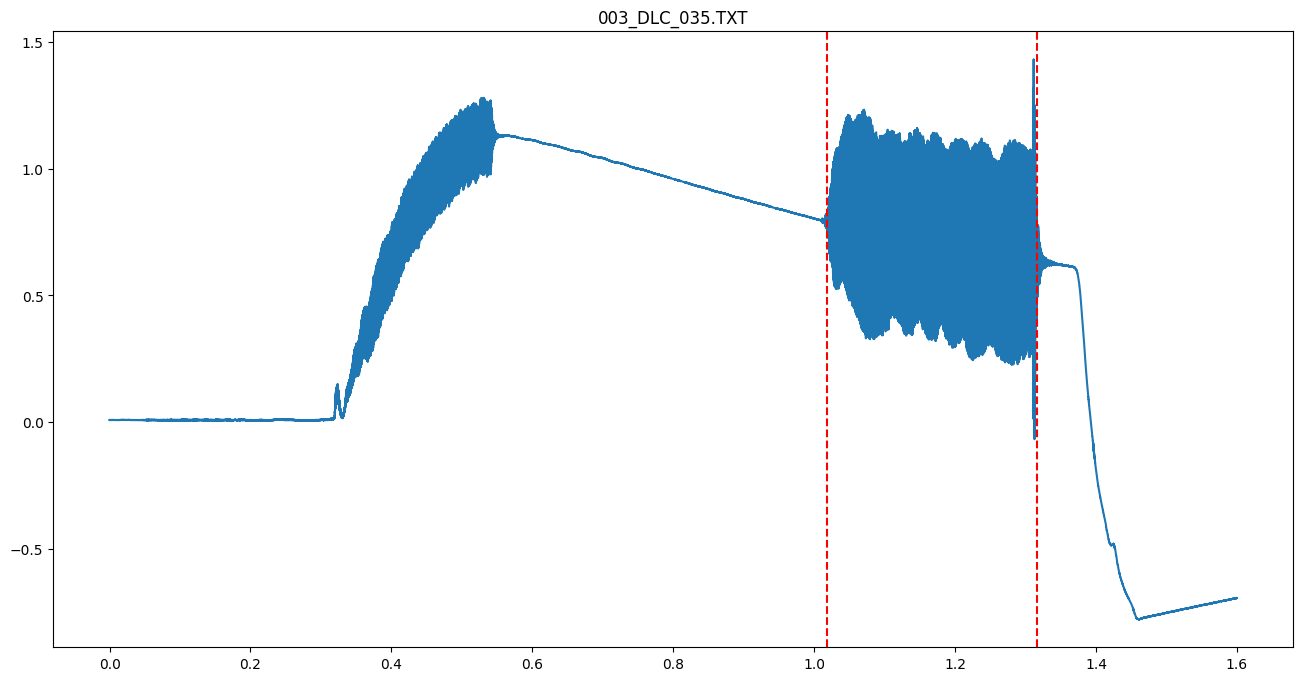

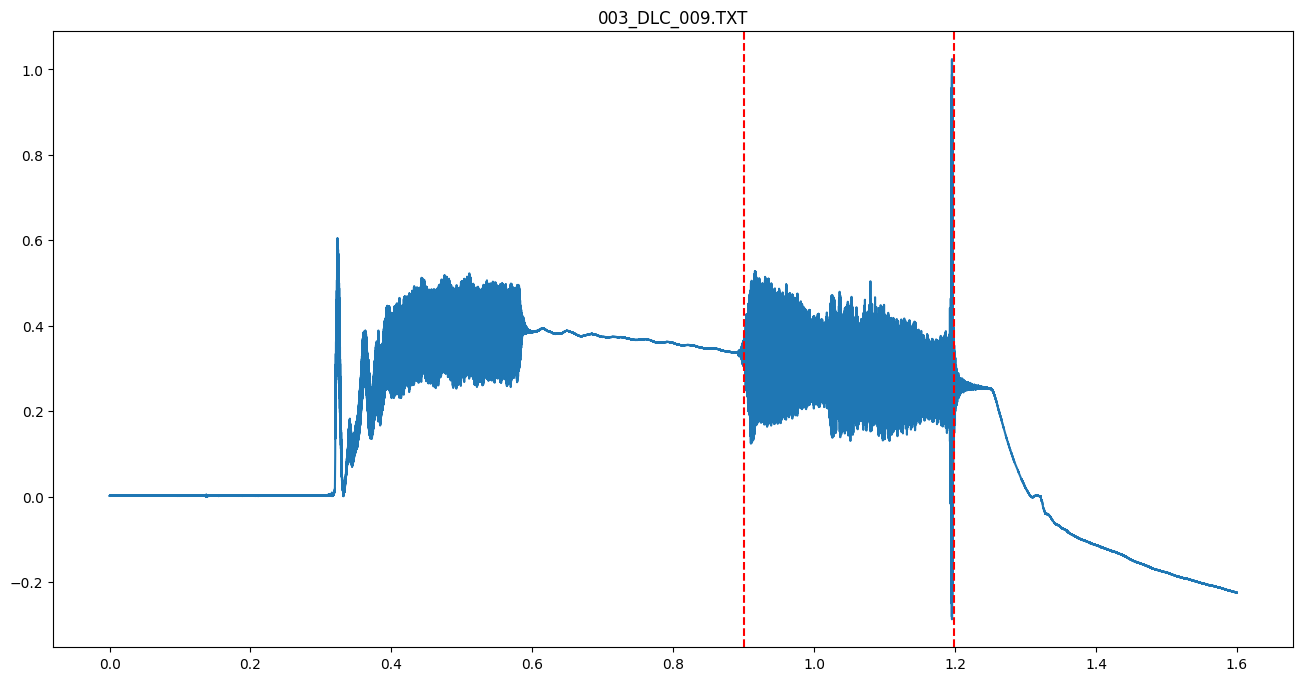

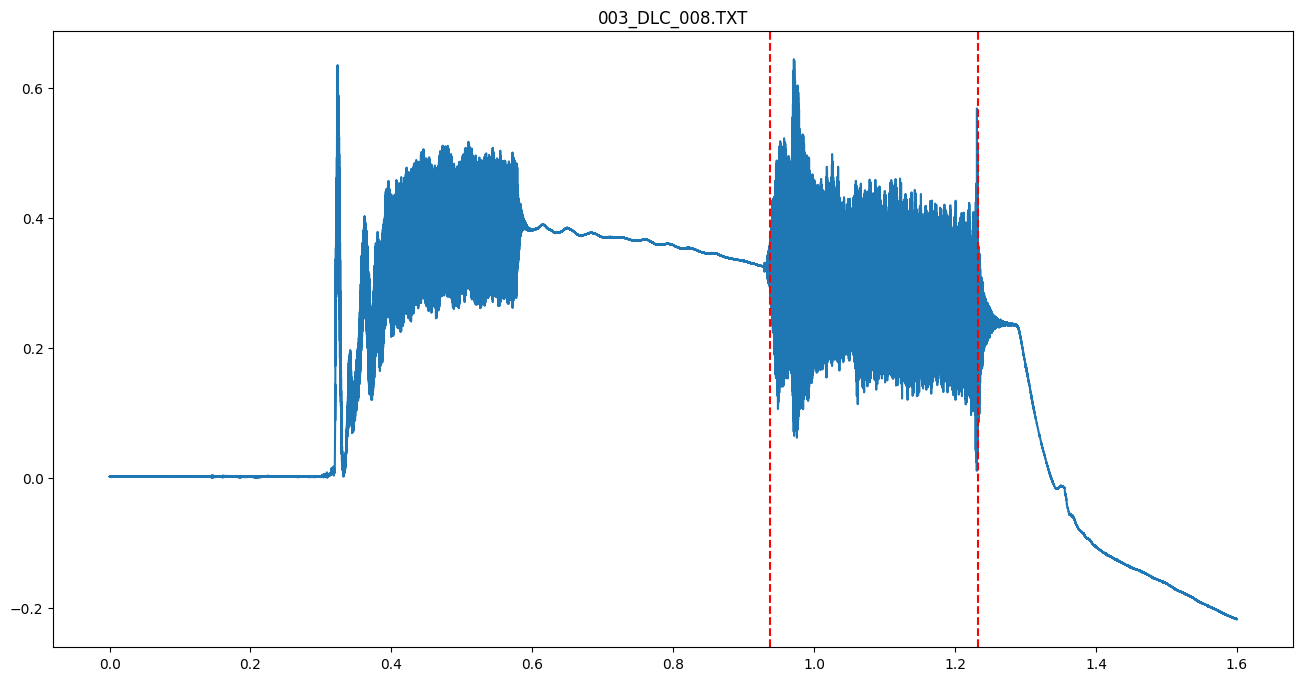

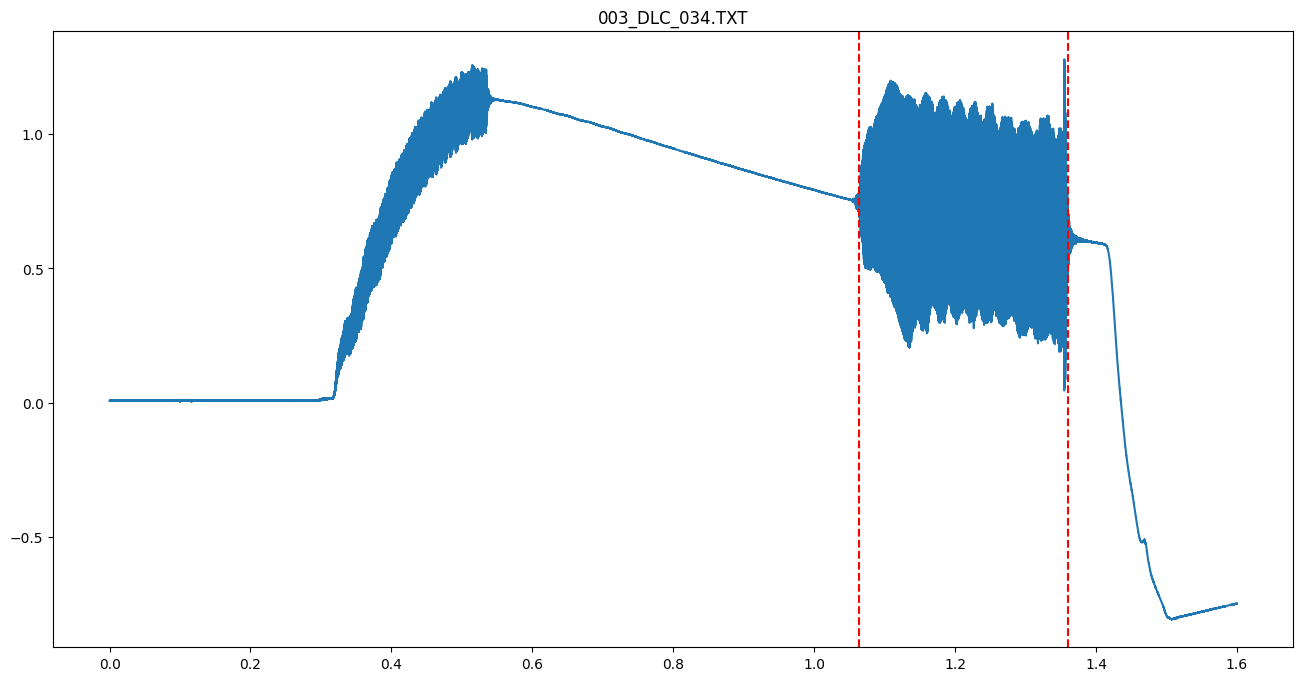

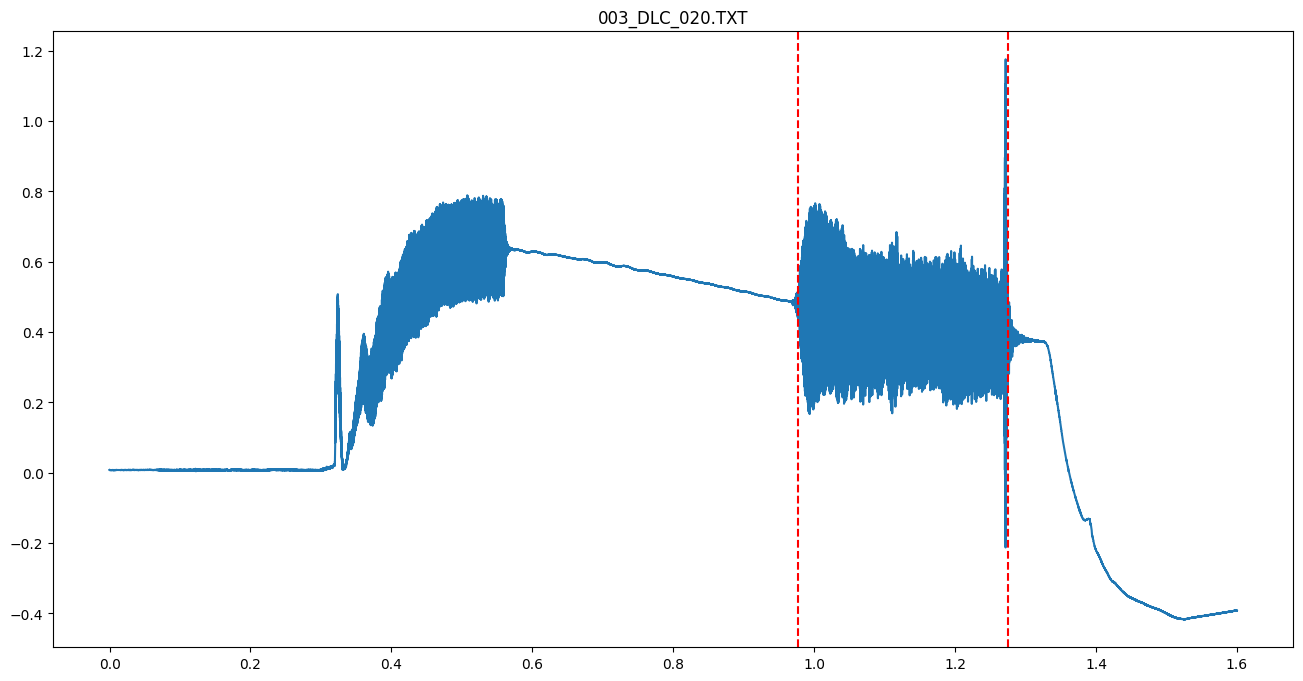

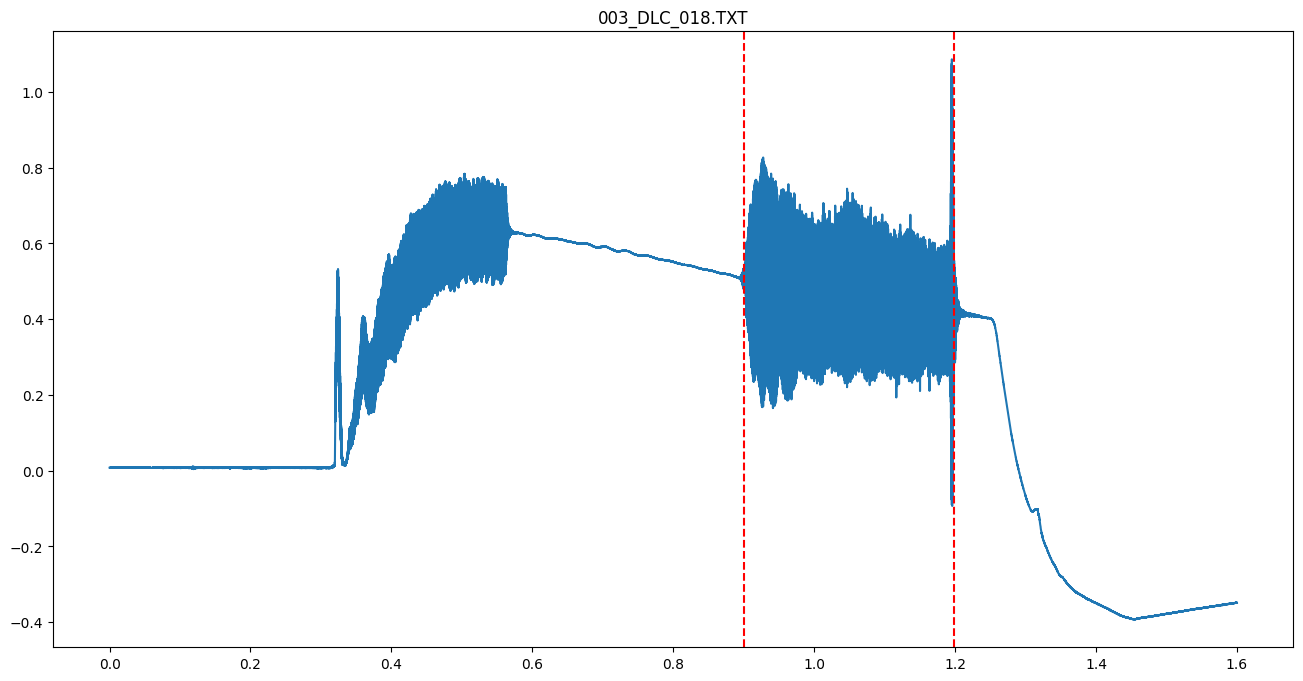

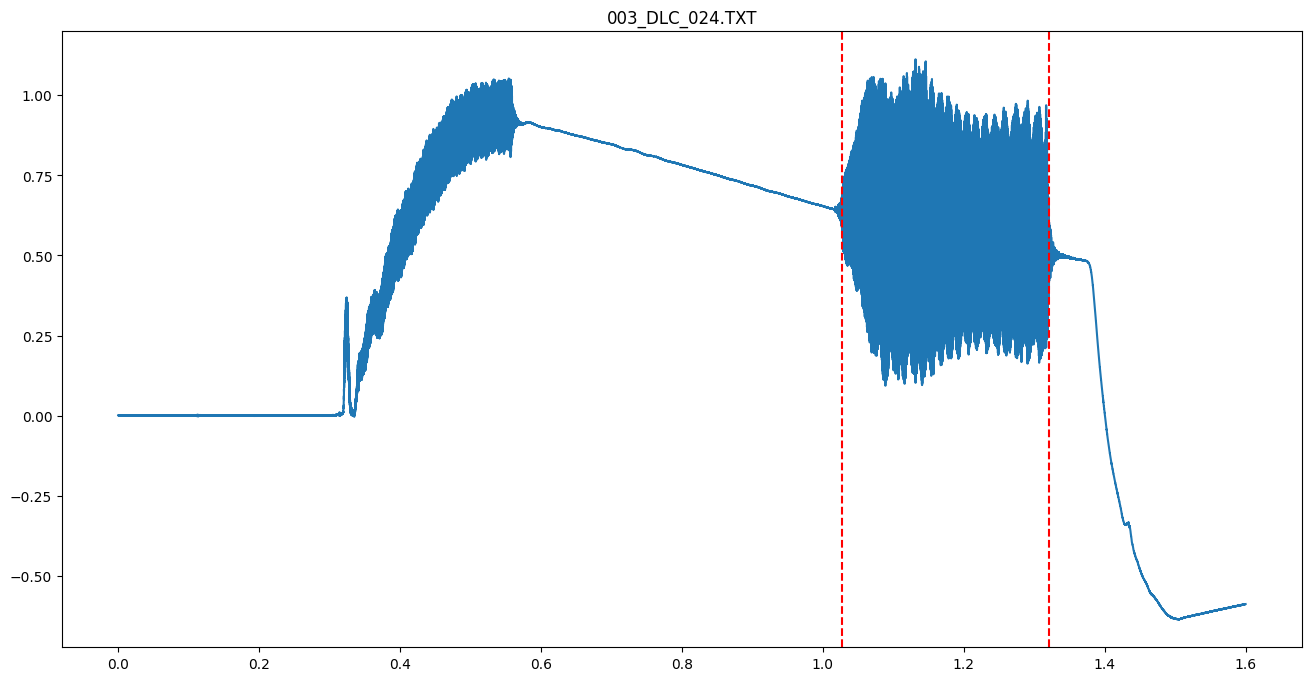

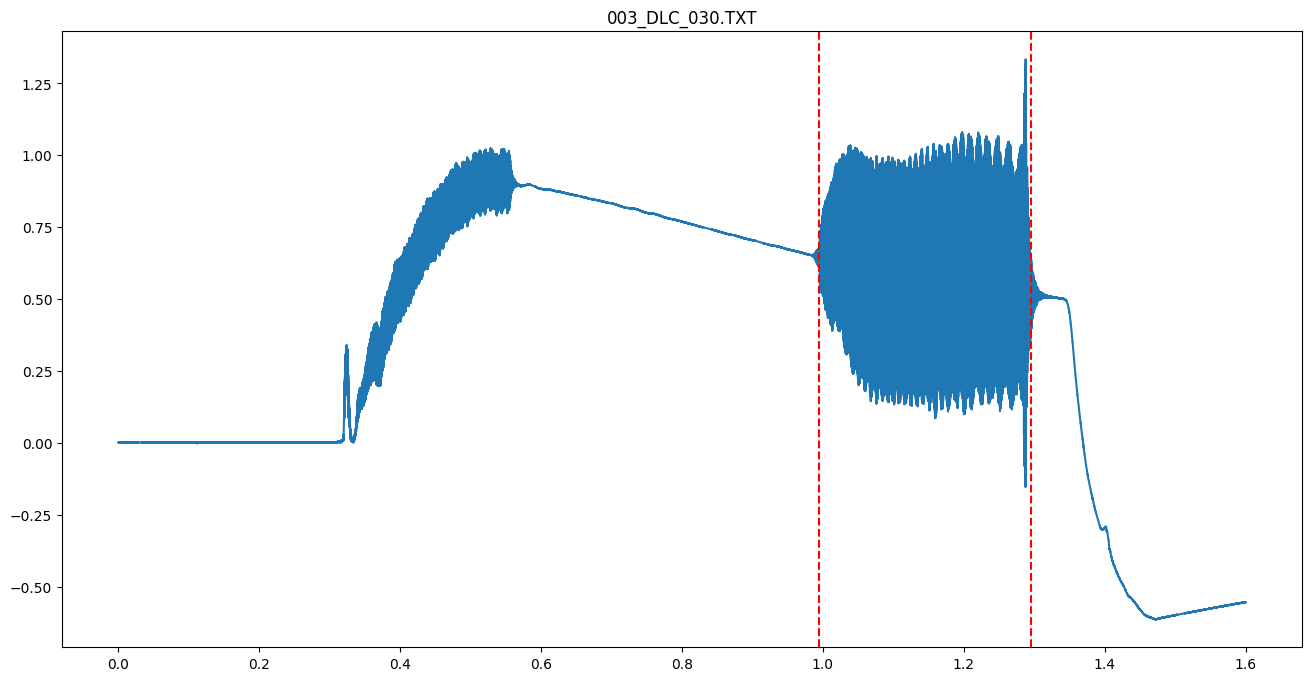

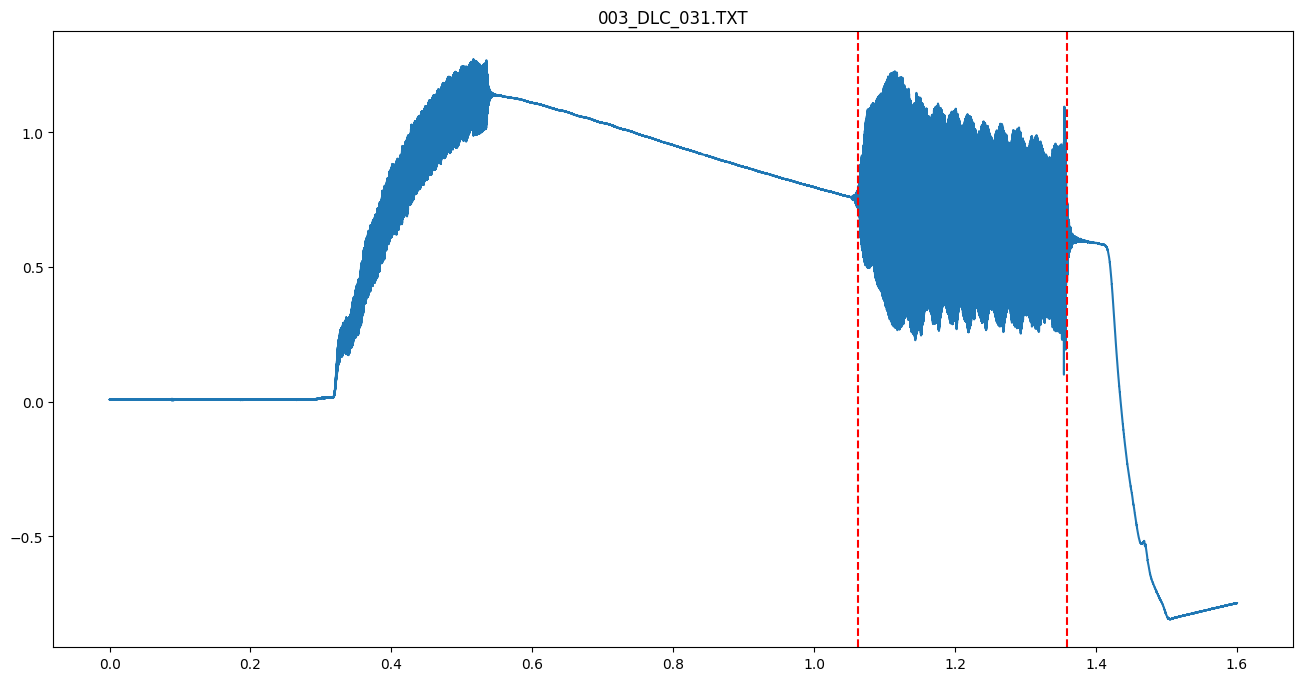

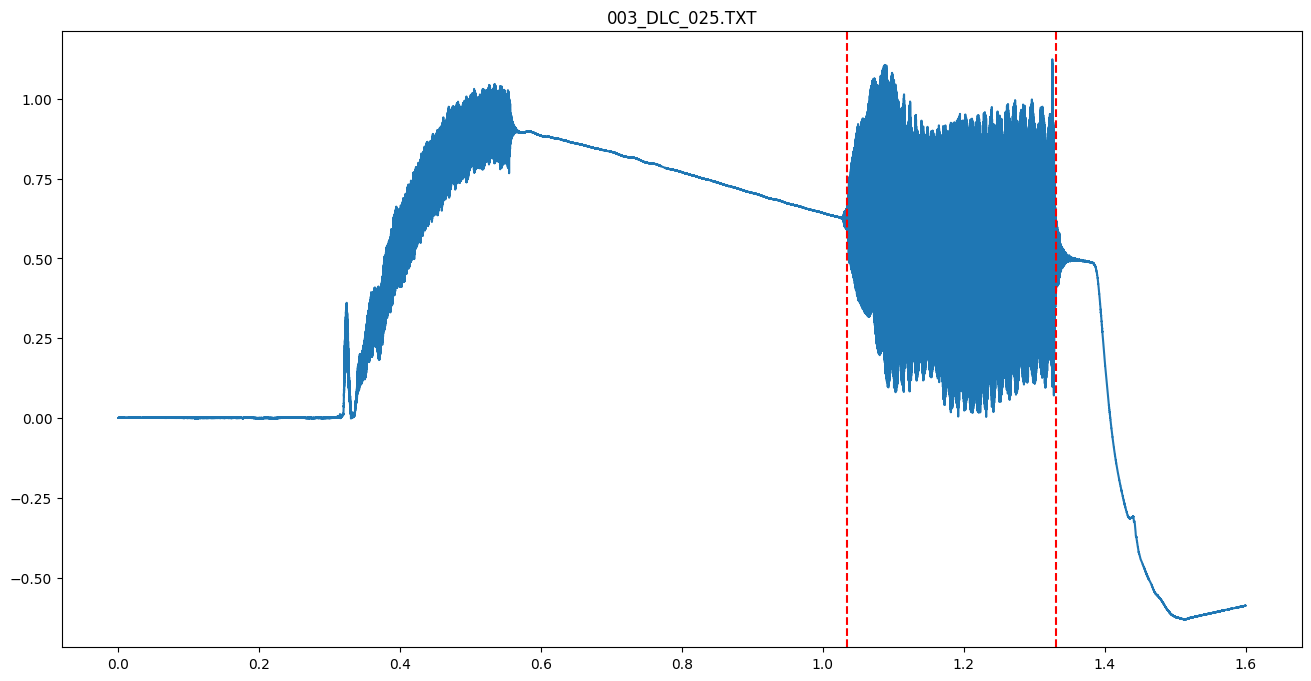

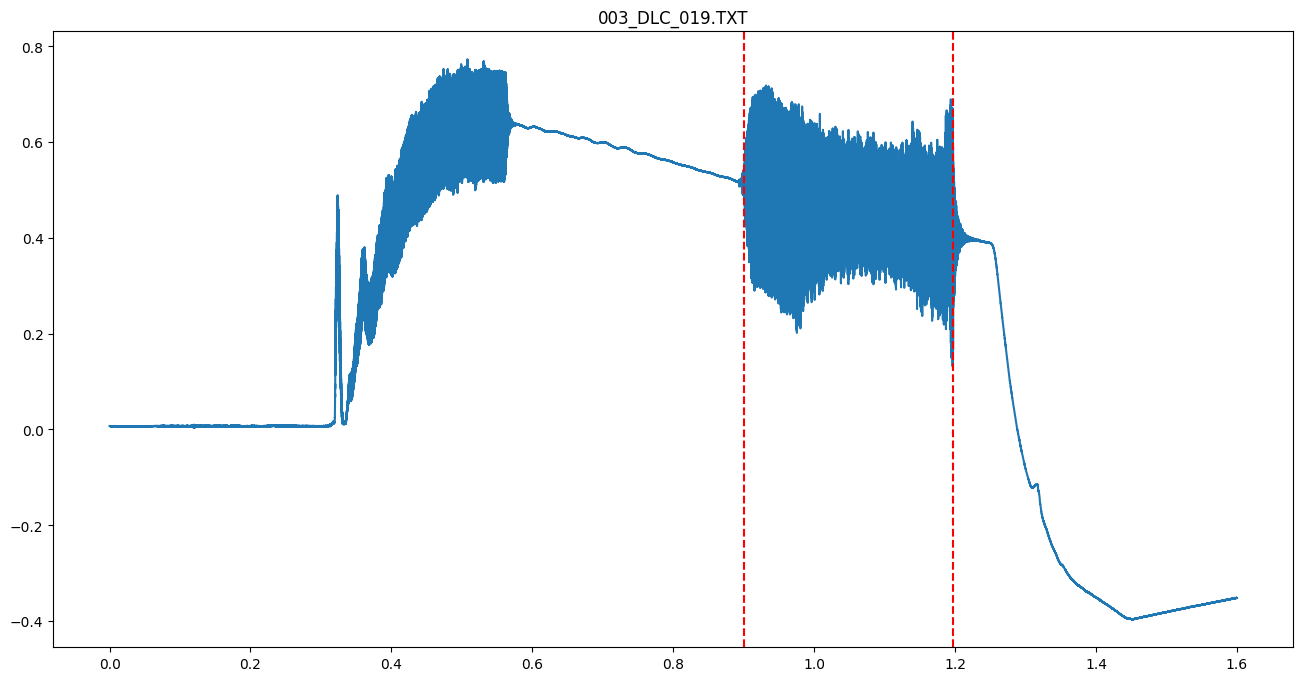

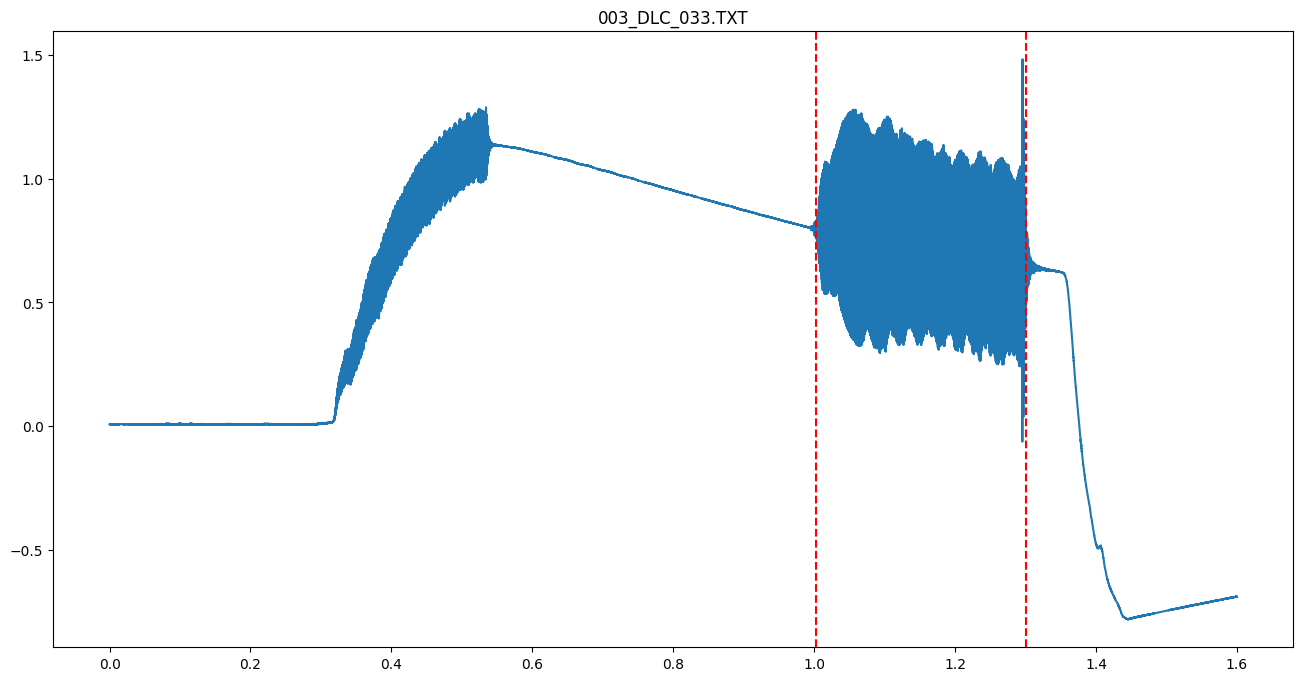

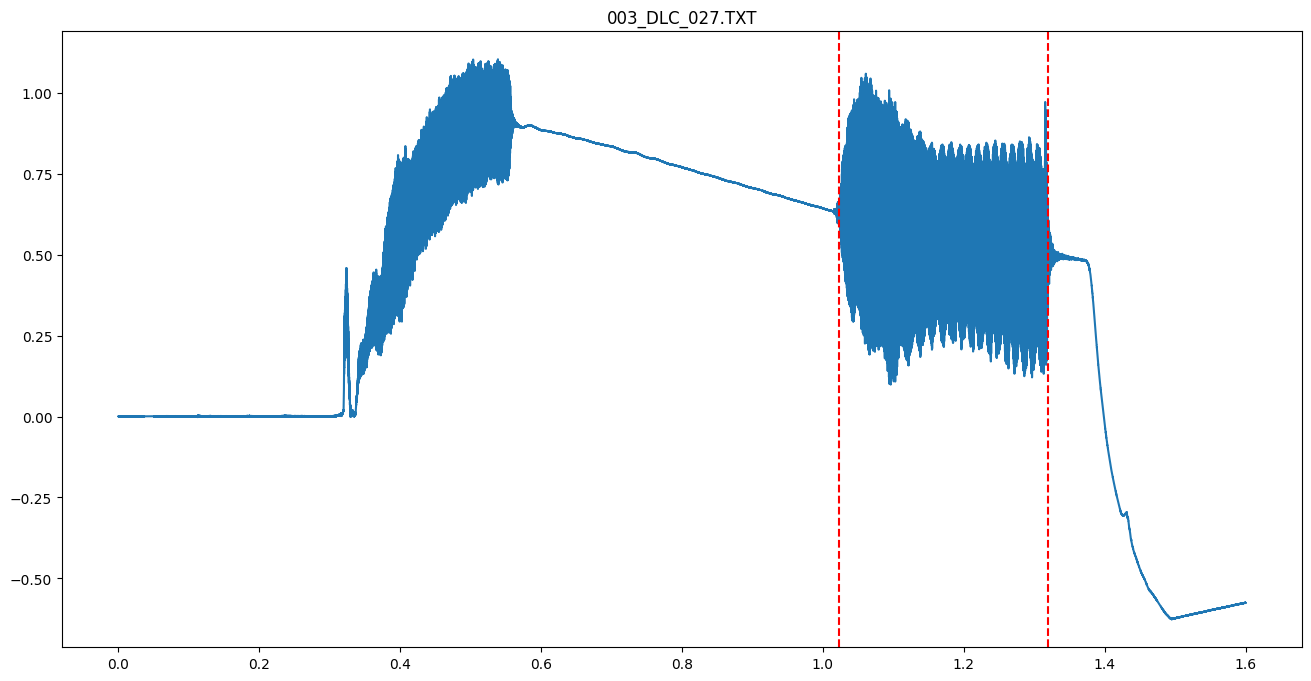

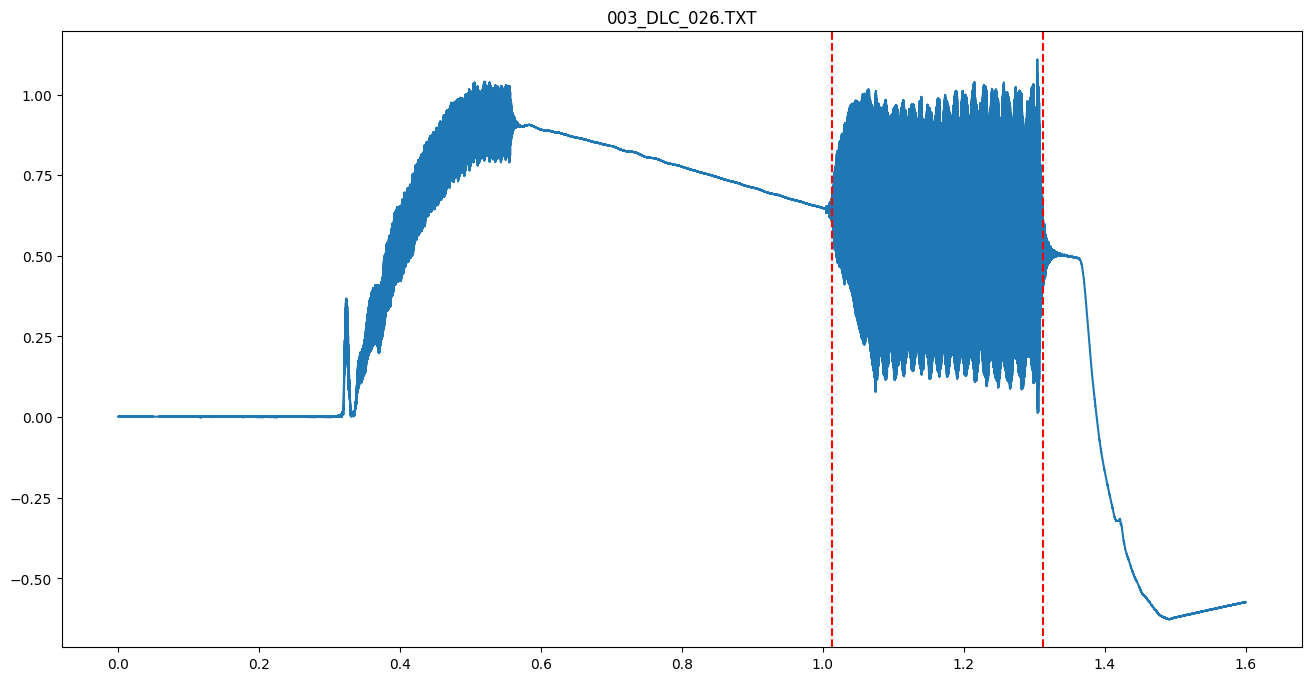

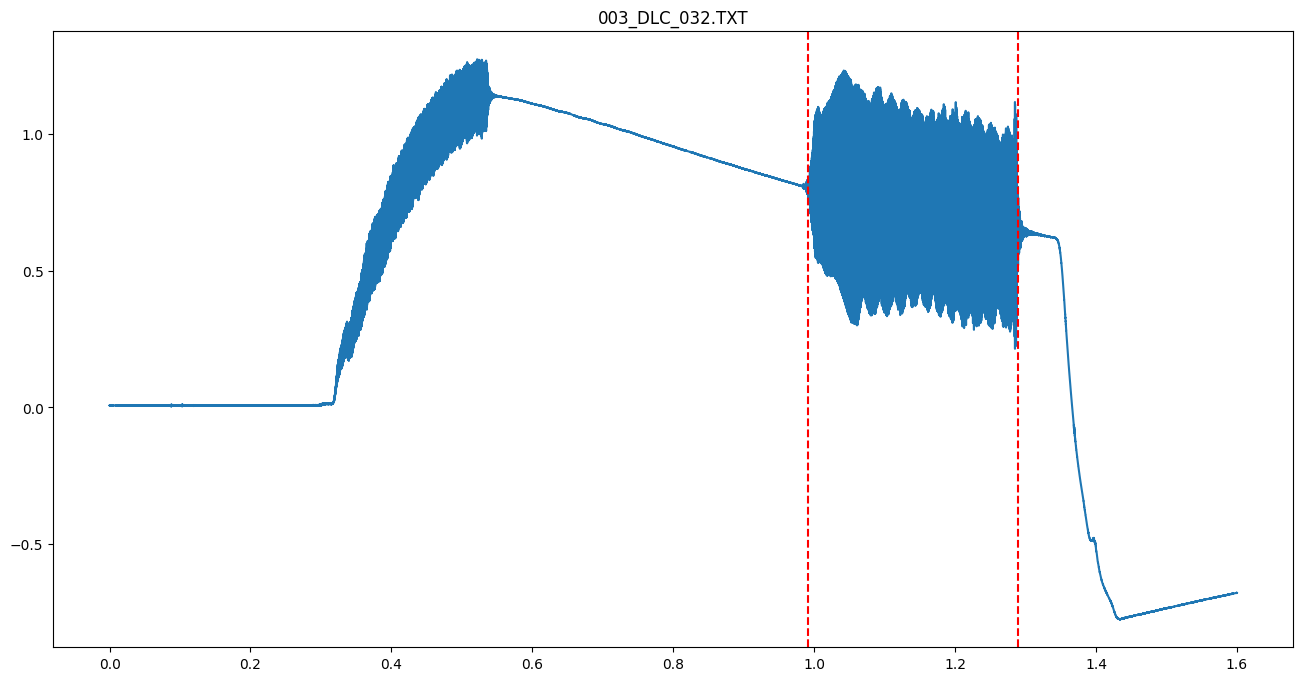

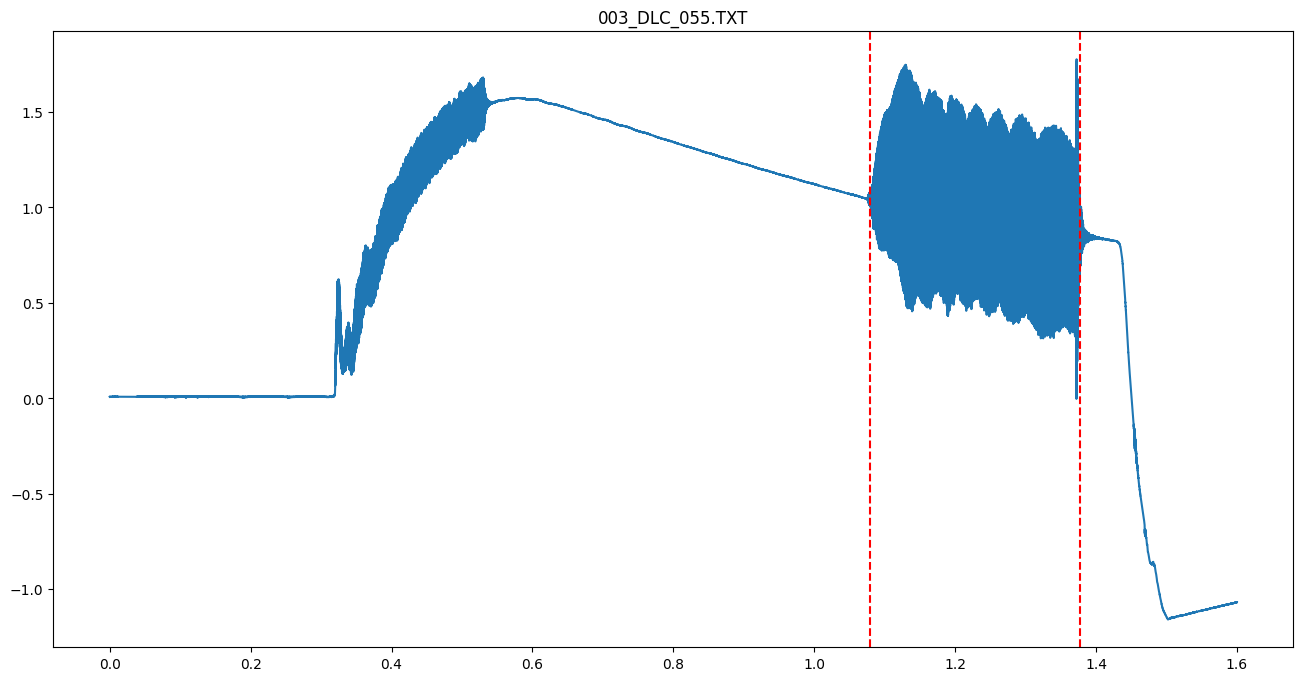

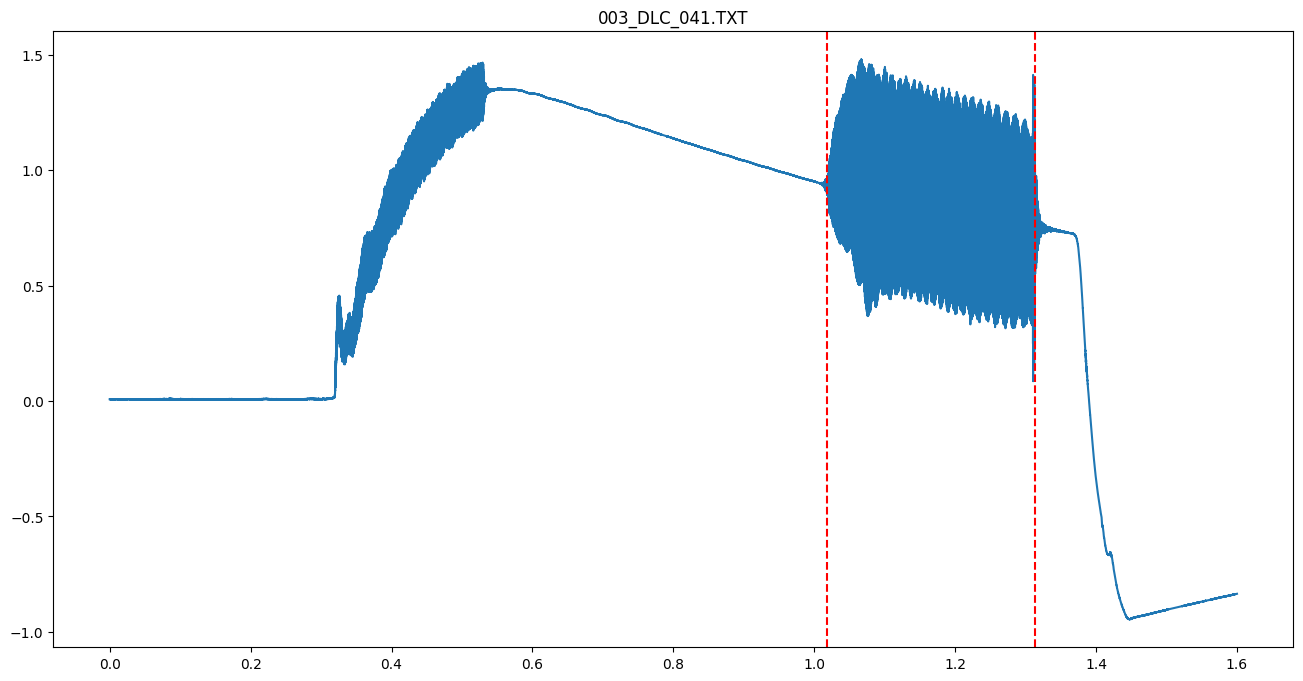

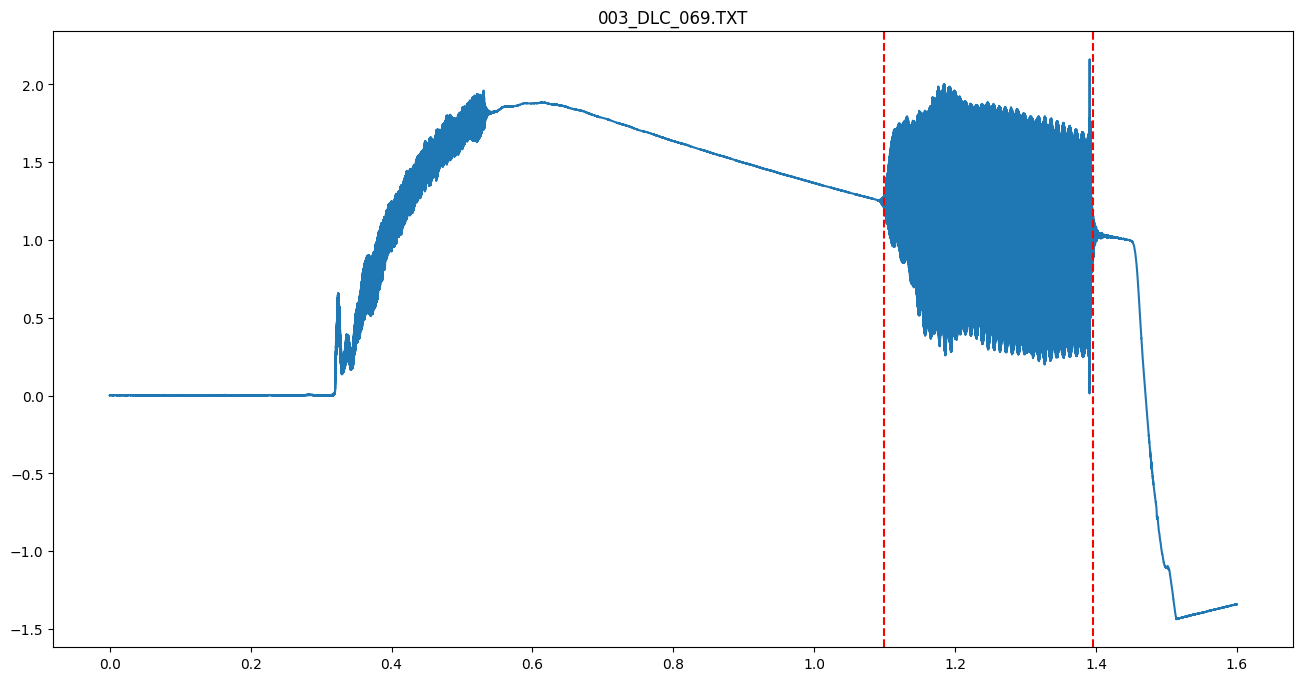

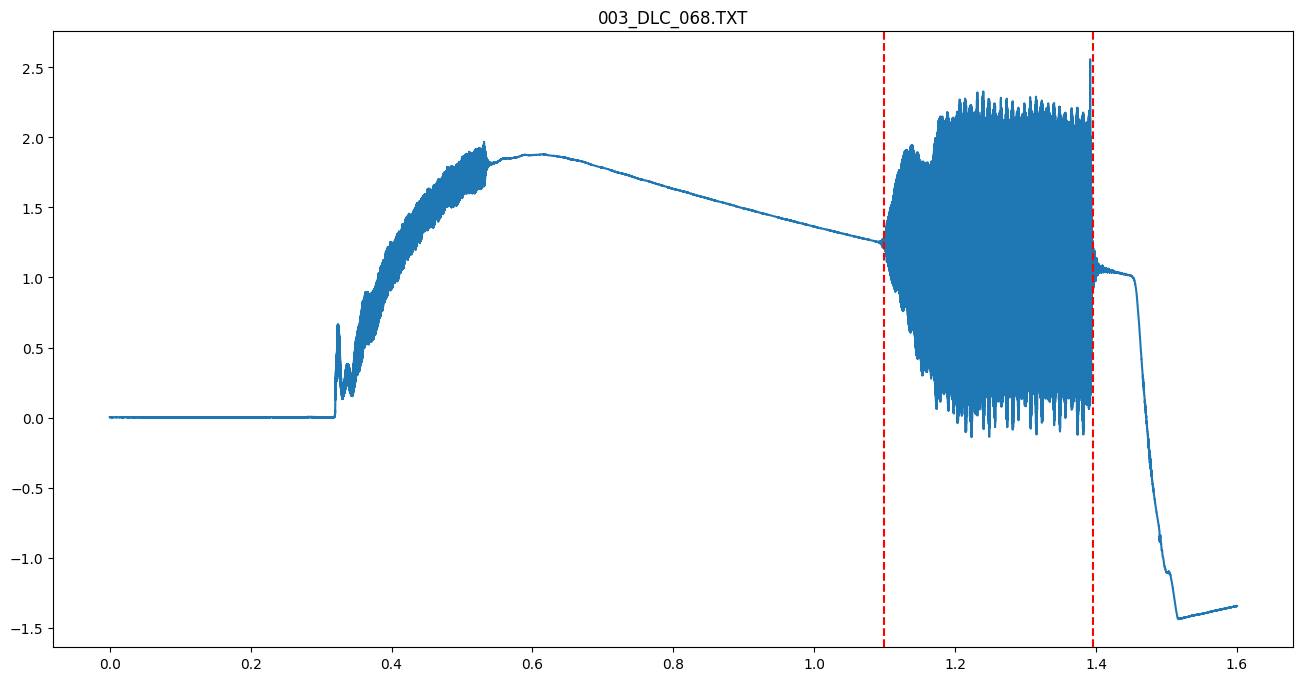

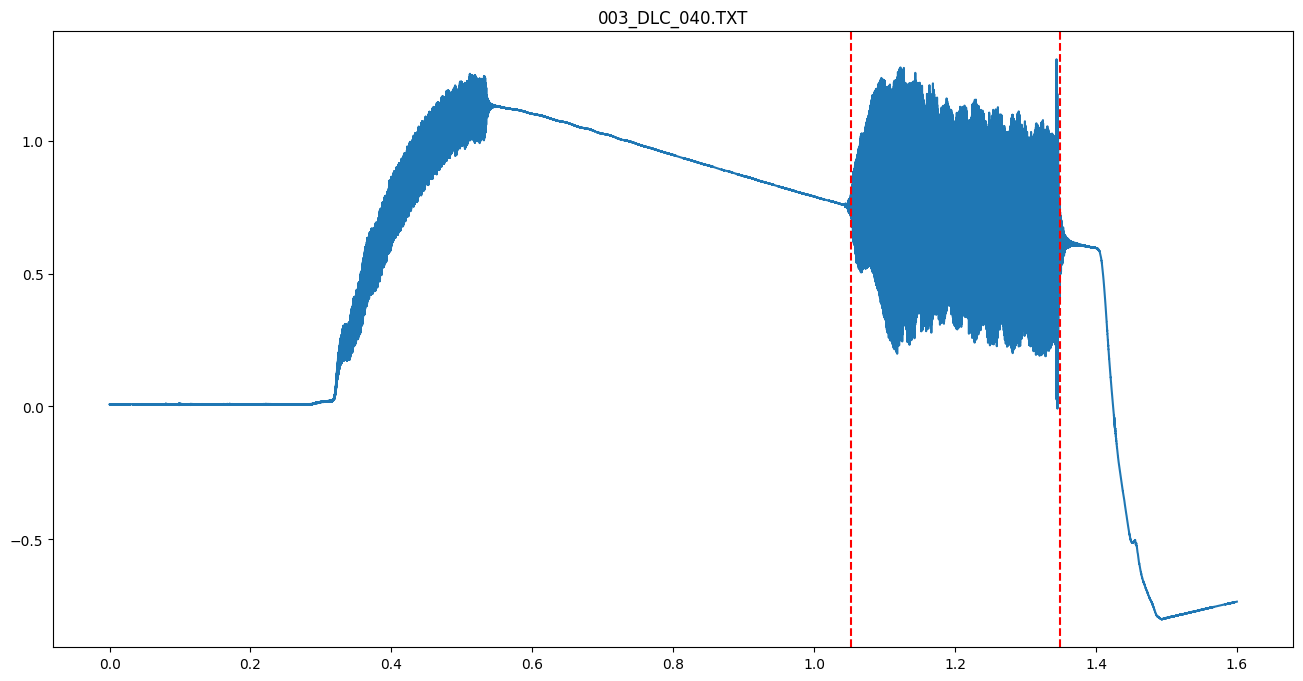

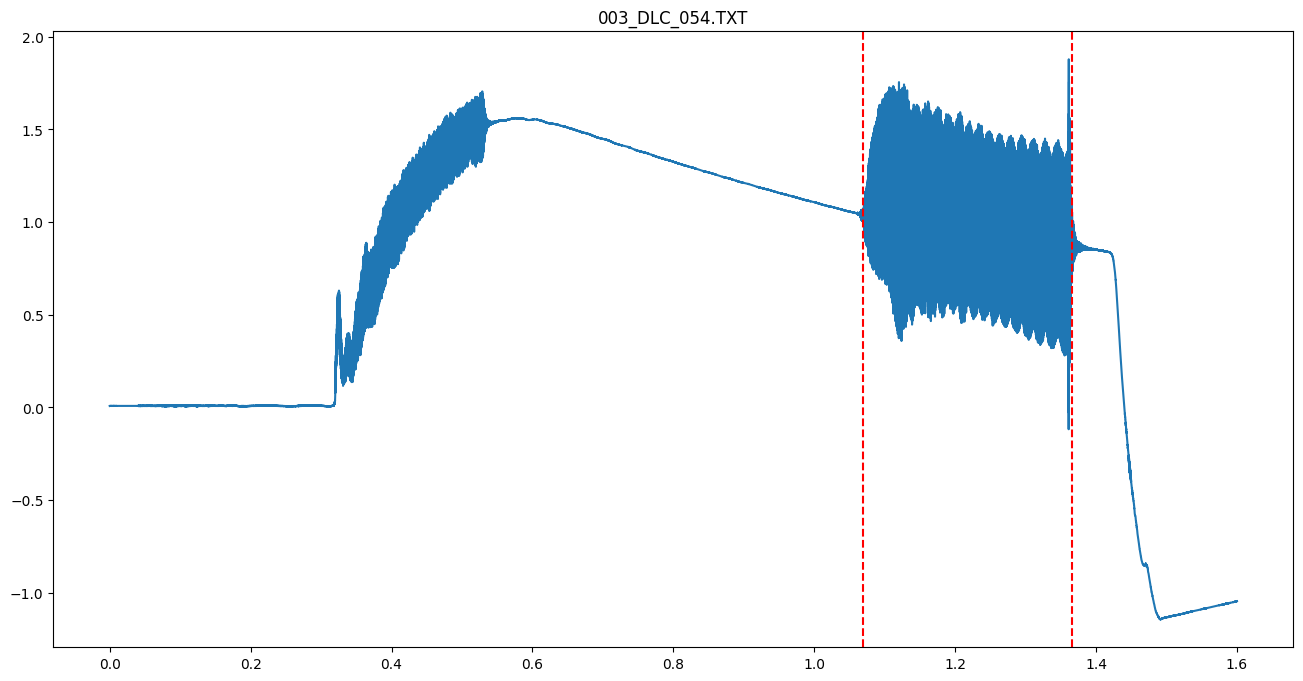

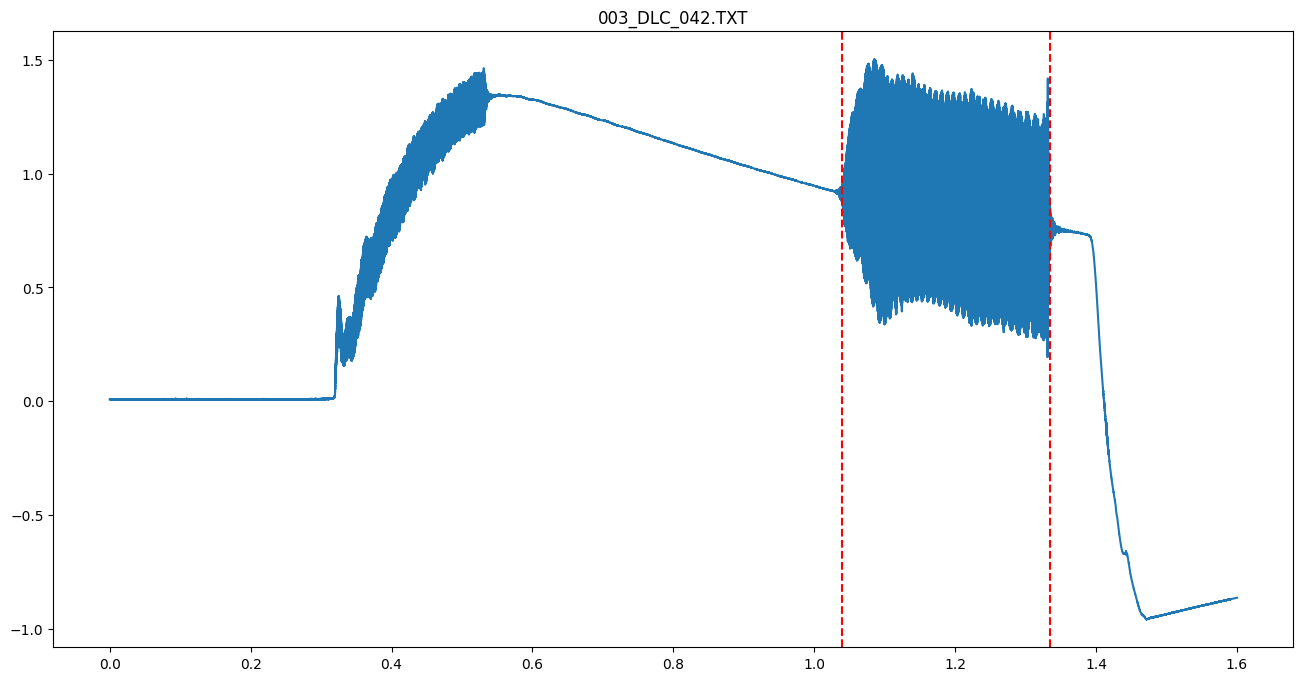

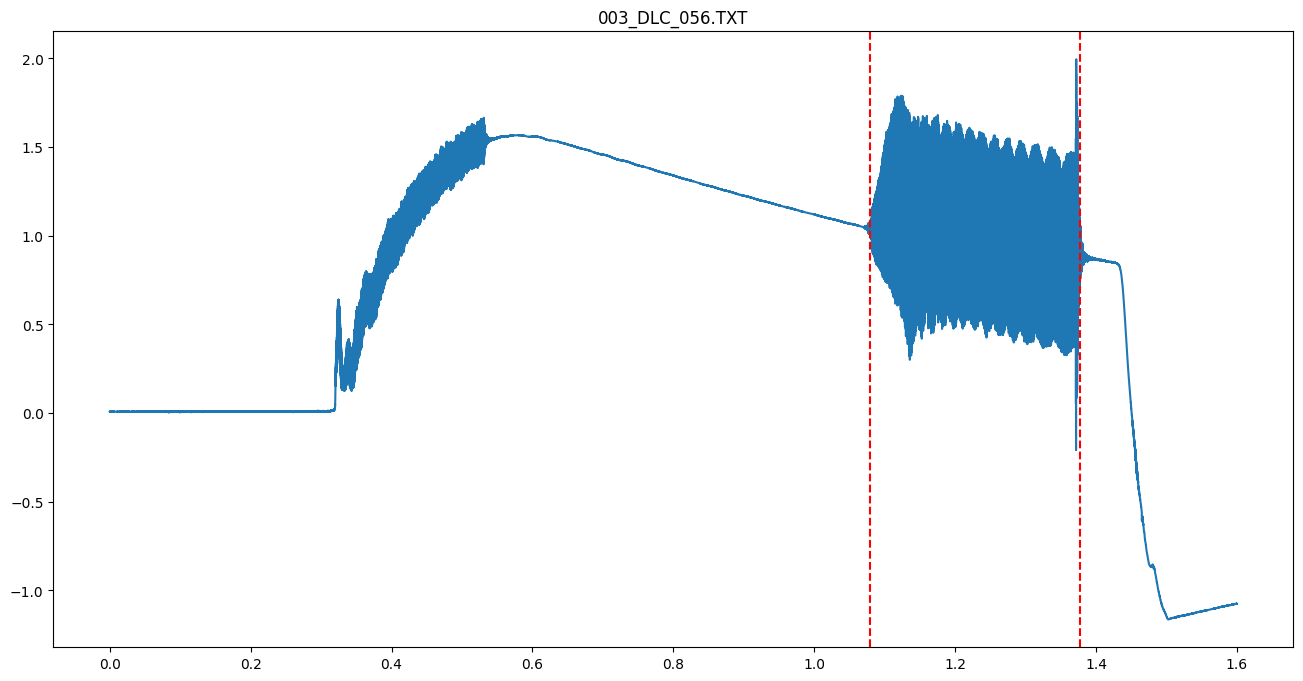

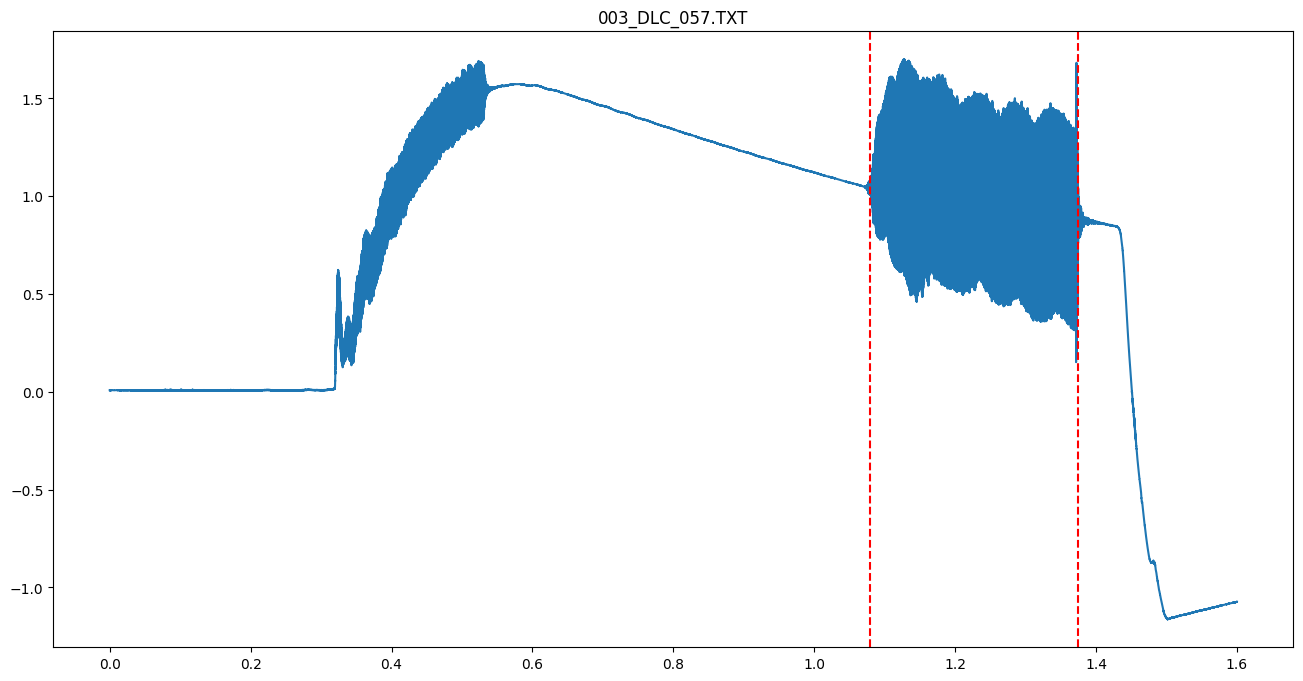

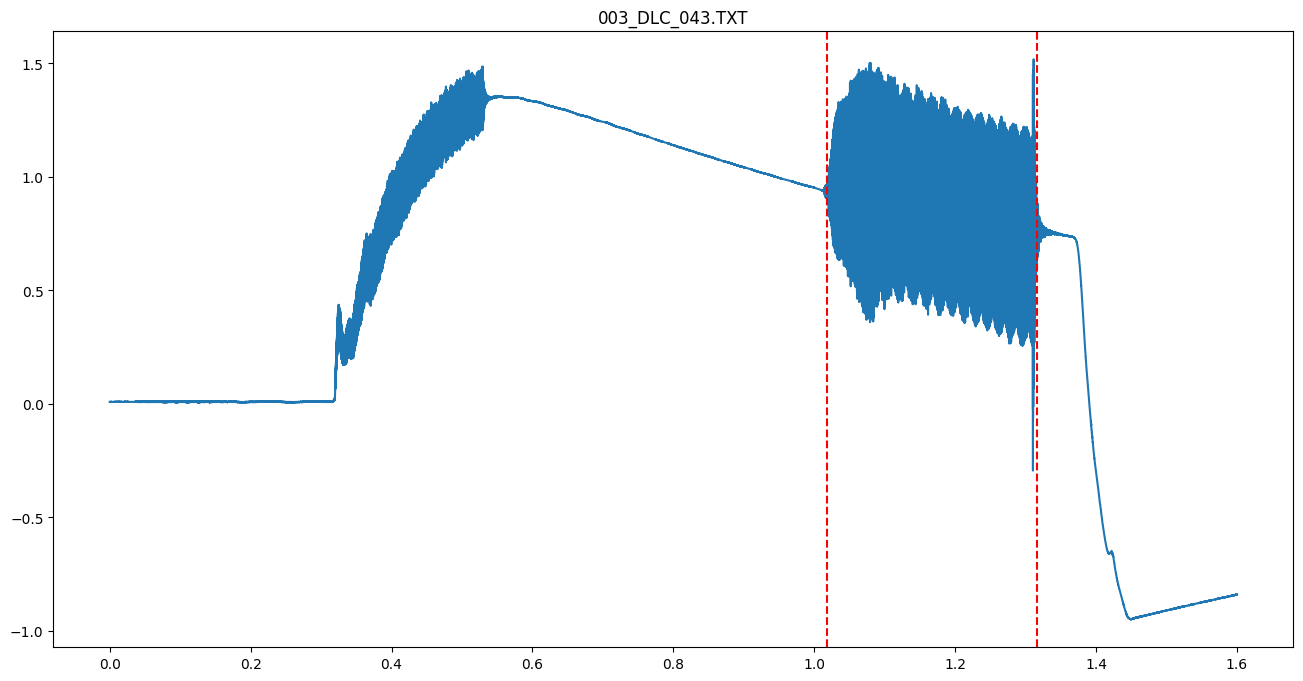

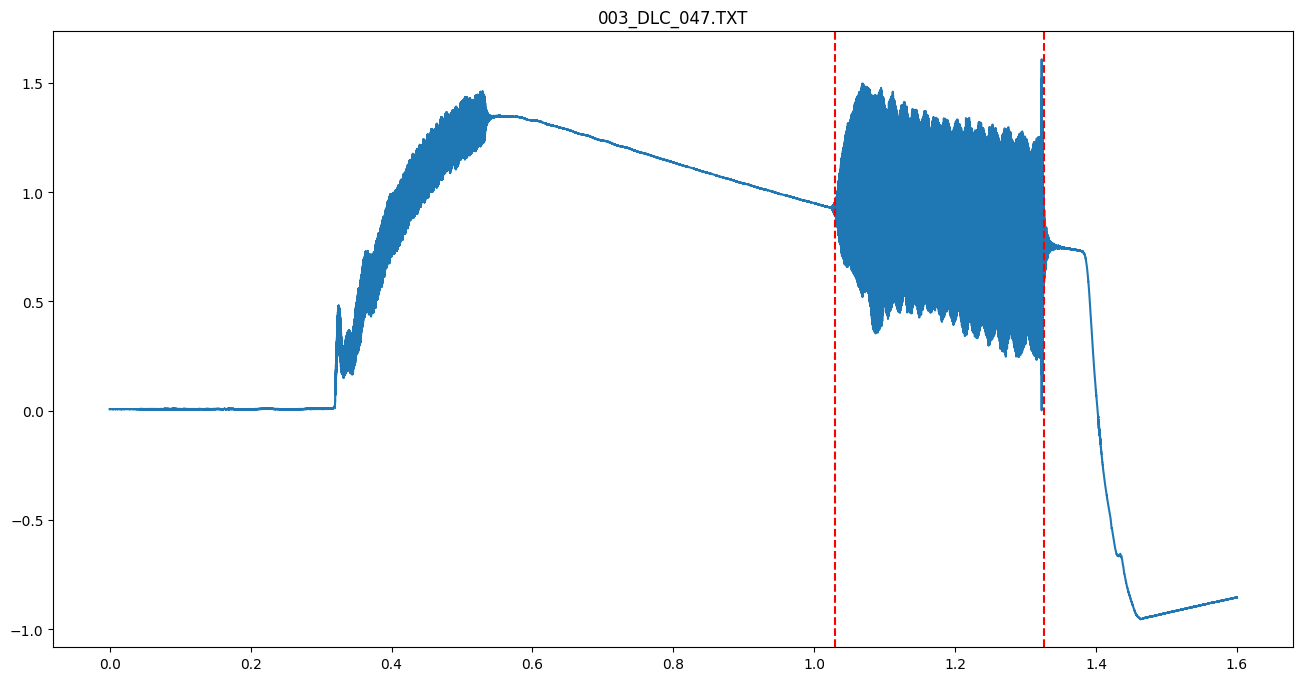

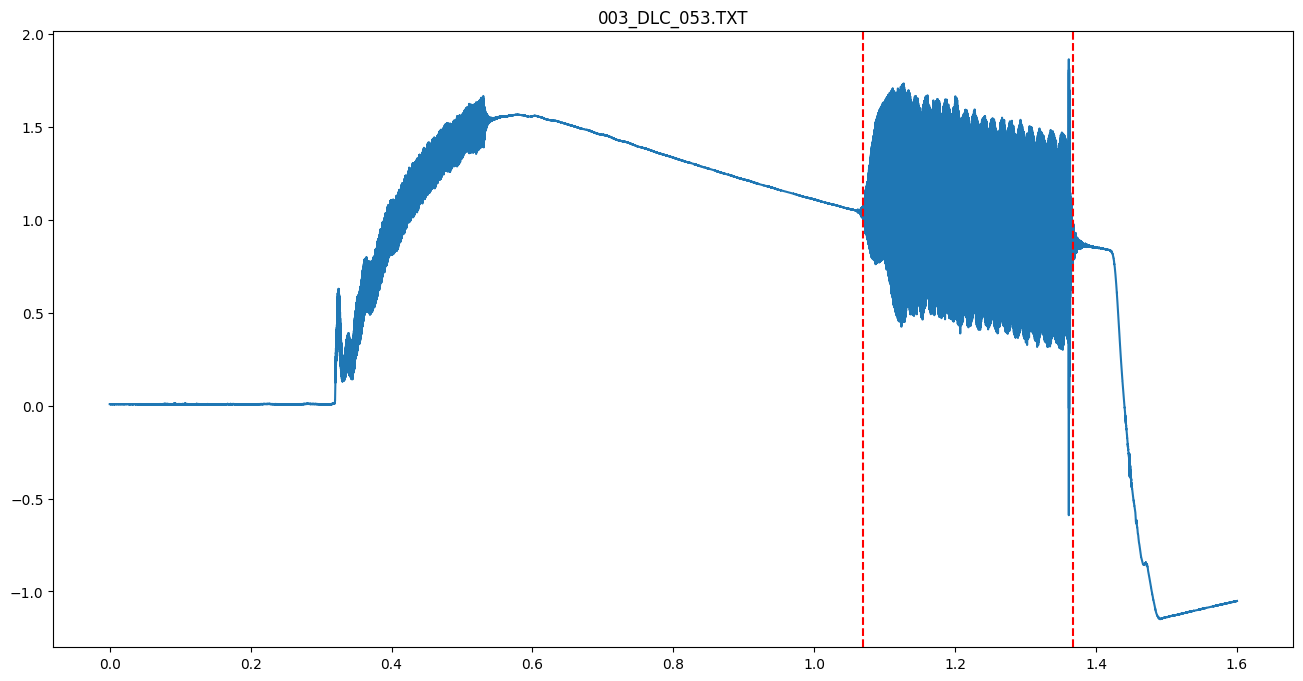

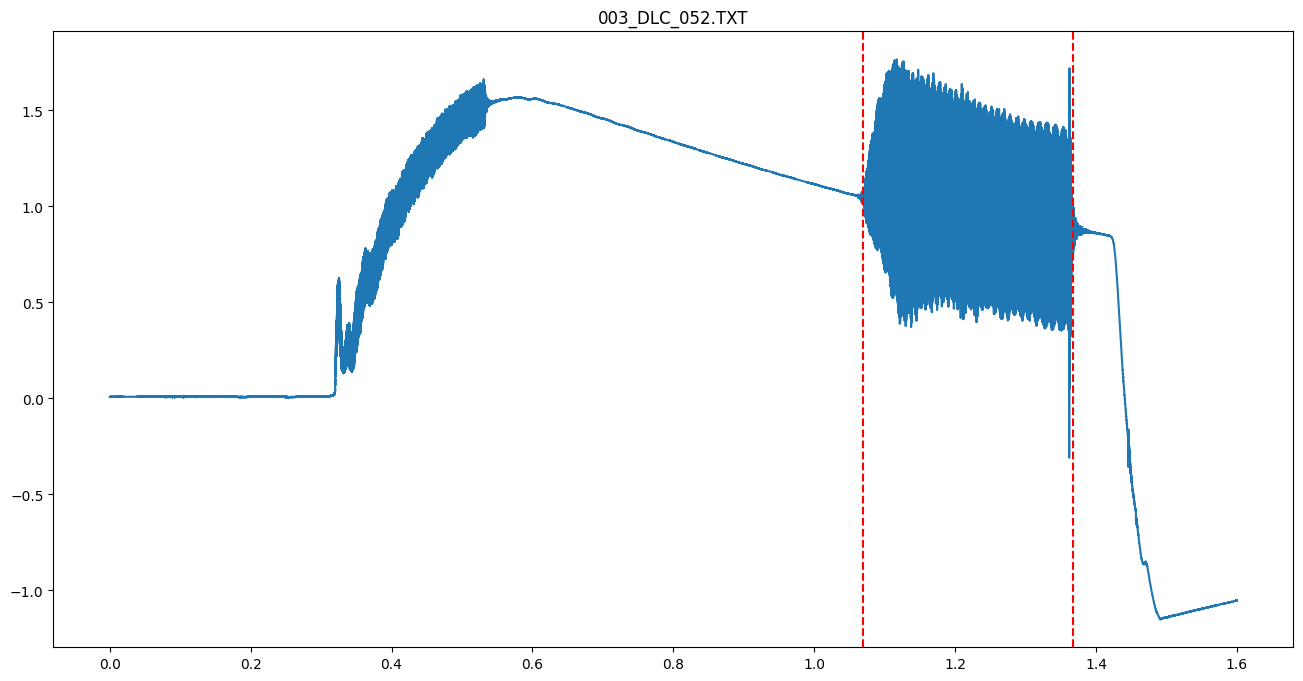

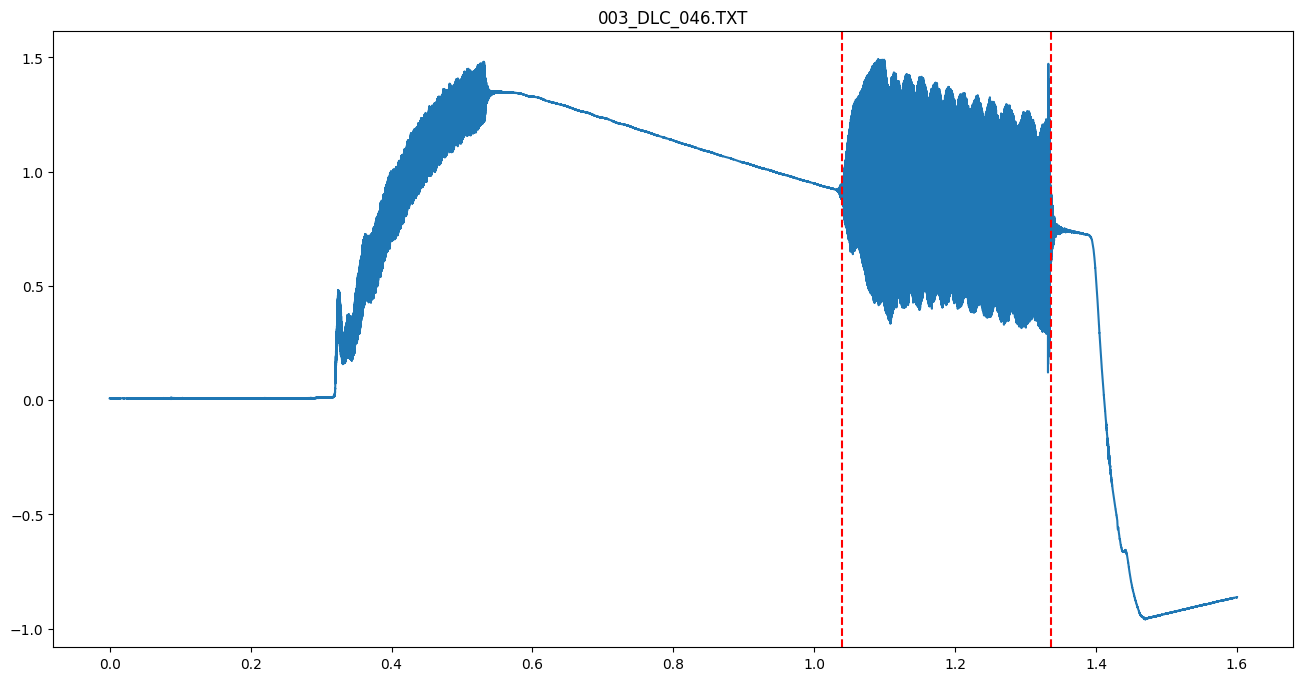

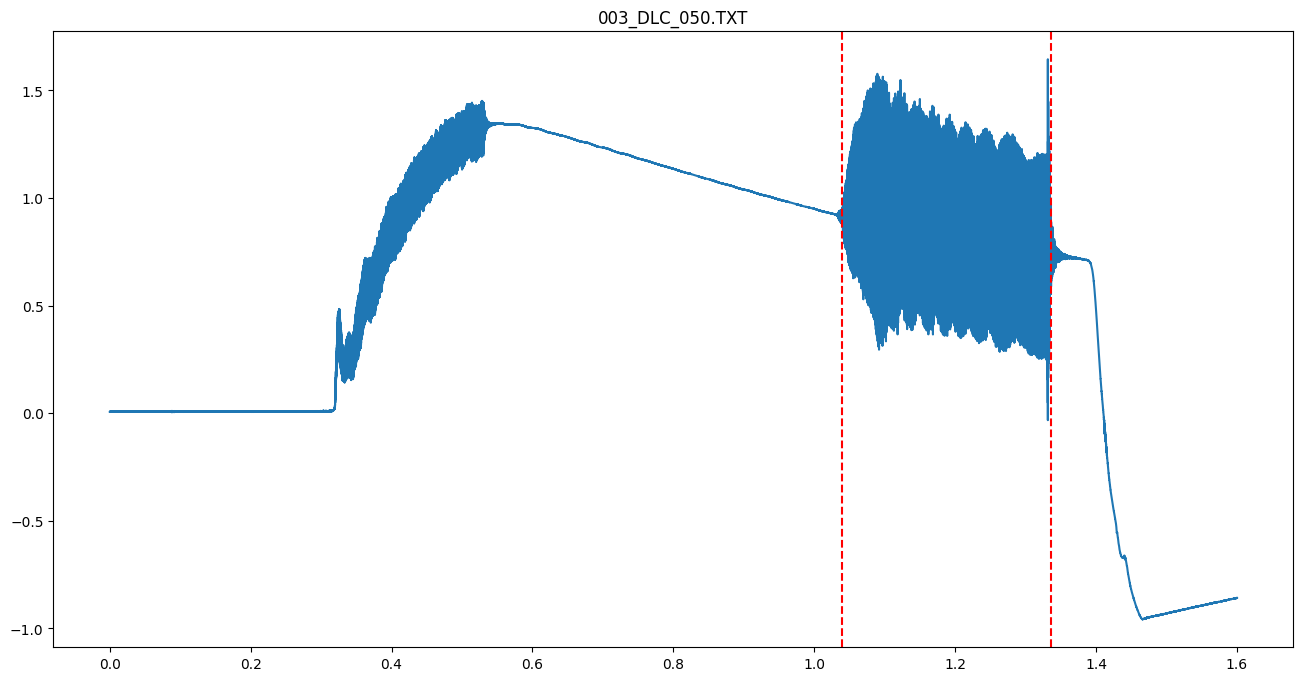

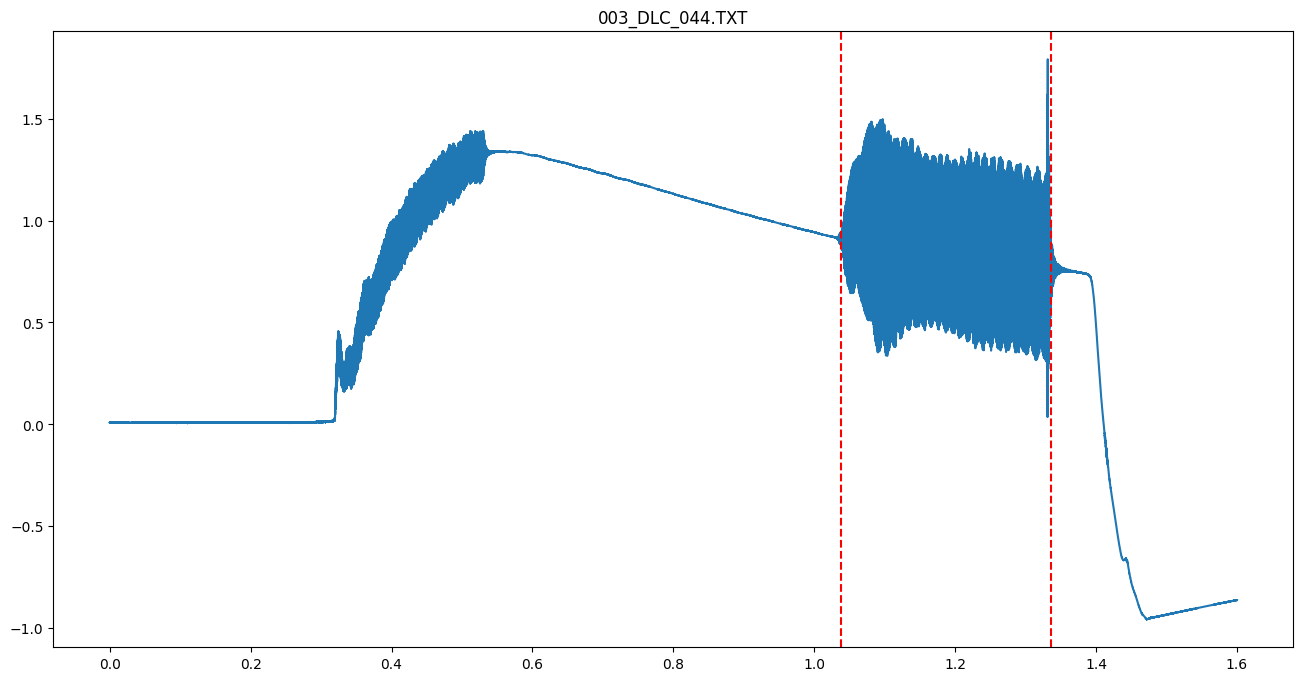

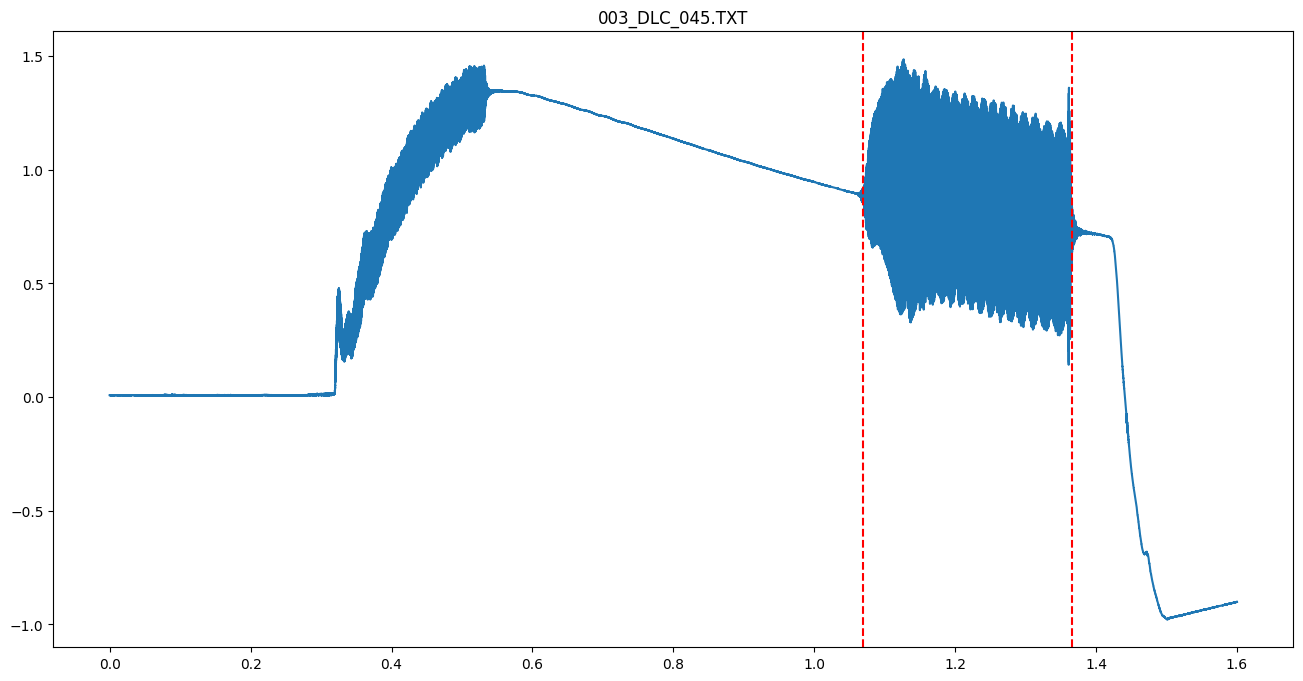

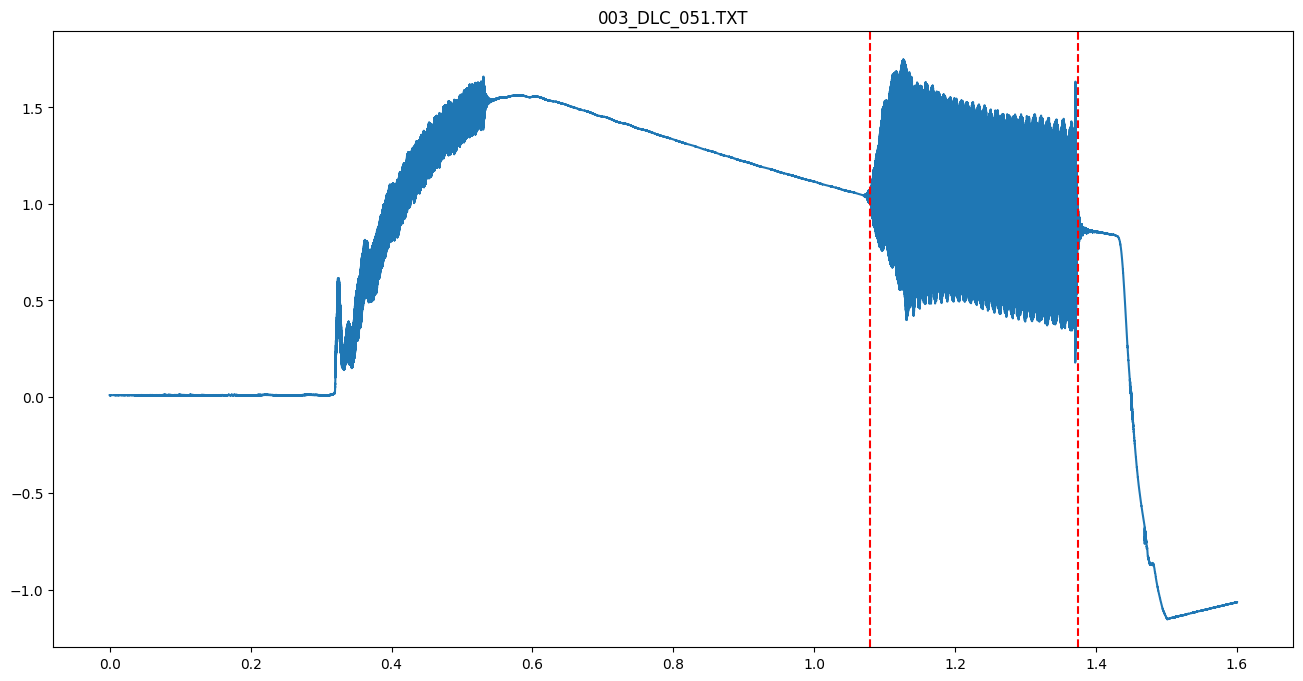

In [4]:
# loop through files within Force_Signals and Power_Signals dir

base_path = "./data/part3/"

force_signals = os.listdir(base_path + "Force_Signals/")

for force_signal in force_signals:
    
    time = []
    force = []
    
    with open(base_path + "Force_Signals/" + force_signal, "r") as f:
        
        lines = f.readlines()
        
        for line in lines:
            
            time_, force_ = line.strip().split()
            
            time.append(float(time_))
            force.append(float(force_))


    # plt.figure(figsize=(16,8))
    # plt.title(force_signal)
    # plt.plot(time[80000:], force[80000:])
    # plt.show()

    # Based on exploration we know that the main weld for all experiments starts somewhere after idx 80000

    # We see that leading up to the main weld there is minimal noise. 
    # When we reach the main weld we see a spike in noise

    n = len(time)
    
    window = 50
    noise_threshold_start = 0.025

    ptr = 80000
    while ptr < n:
        
        # Look into a 20 point window
        diff = 1 / window * sum([abs(force[i + 1] - force[i]) for i in range(ptr, ptr + window)])
        if diff >= noise_threshold_start:
            break

        ptr += window

    main_weld_start_idx = ptr

    # When we neear the end of the main weld we see a decrease in noise

    ptr = main_weld_start_idx + 10000  

    noise_threshold_end = 0.035

    while ptr < n:

        diff = 1 / window * sum([abs(force[i + 1] - force[i]) for i in range(ptr, ptr + window)])
        if diff < noise_threshold_end:
            break

        ptr += window

    main_weld_end_idx = ptr

    plt.figure(figsize=(16,8))
    plt.title(force_signal)
    plt.plot(time, force)
    plt.axvline(x=time[main_weld_start_idx], color='r', linestyle='--')
    plt.axvline(x=time[main_weld_end_idx], color='r', linestyle='--')
    plt.show()

/var/folders/9z/jmpnldq52lj6dmk37mzxznzw0000gn/T/ipykernel_43936/3548601720.py:63: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


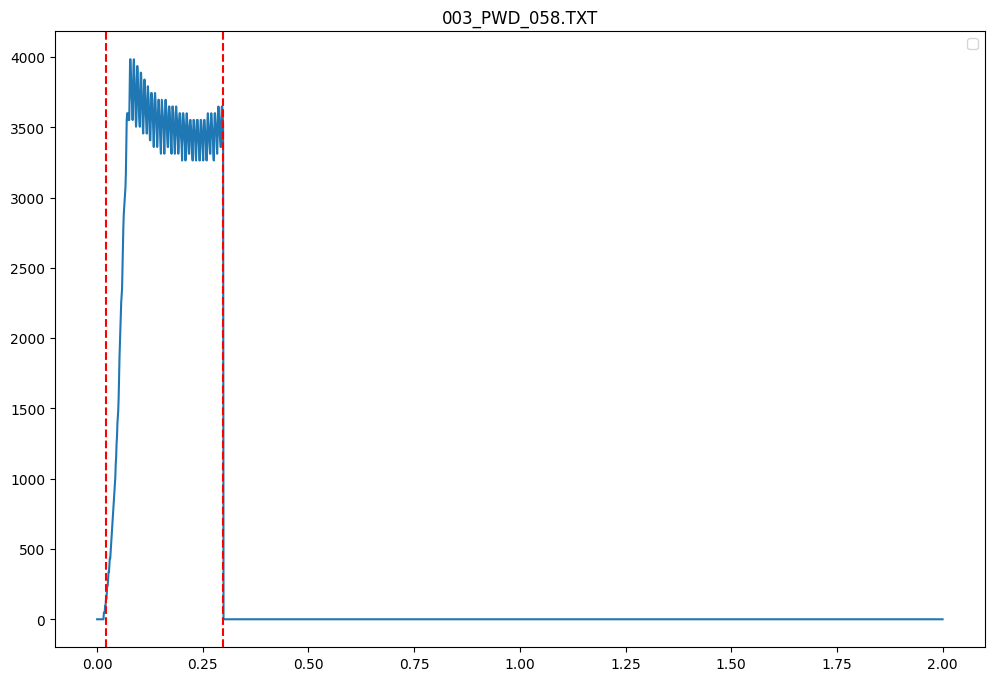

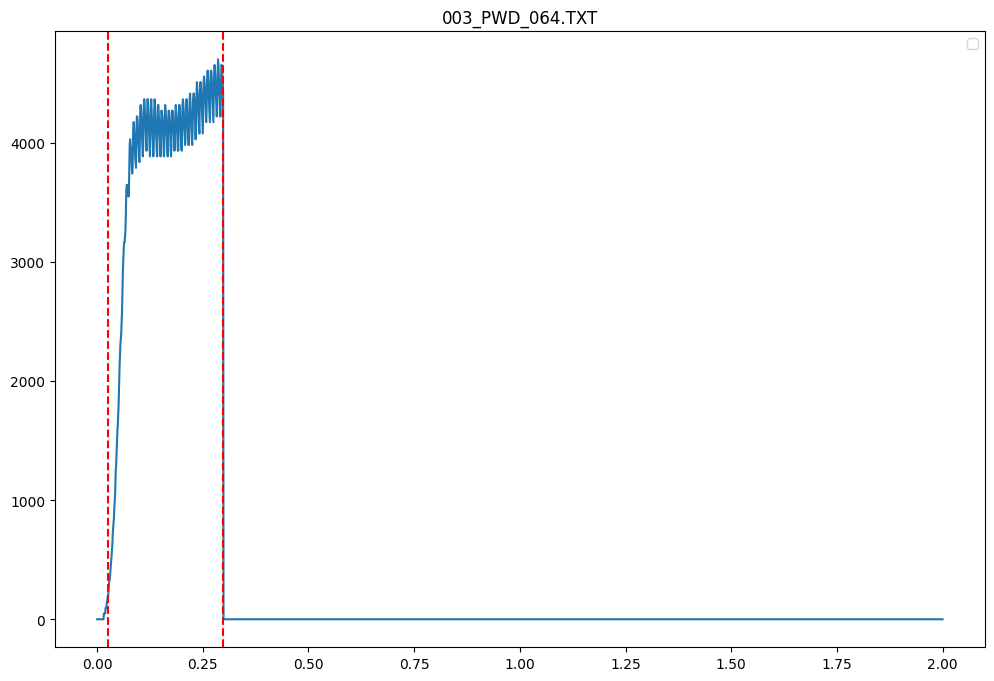

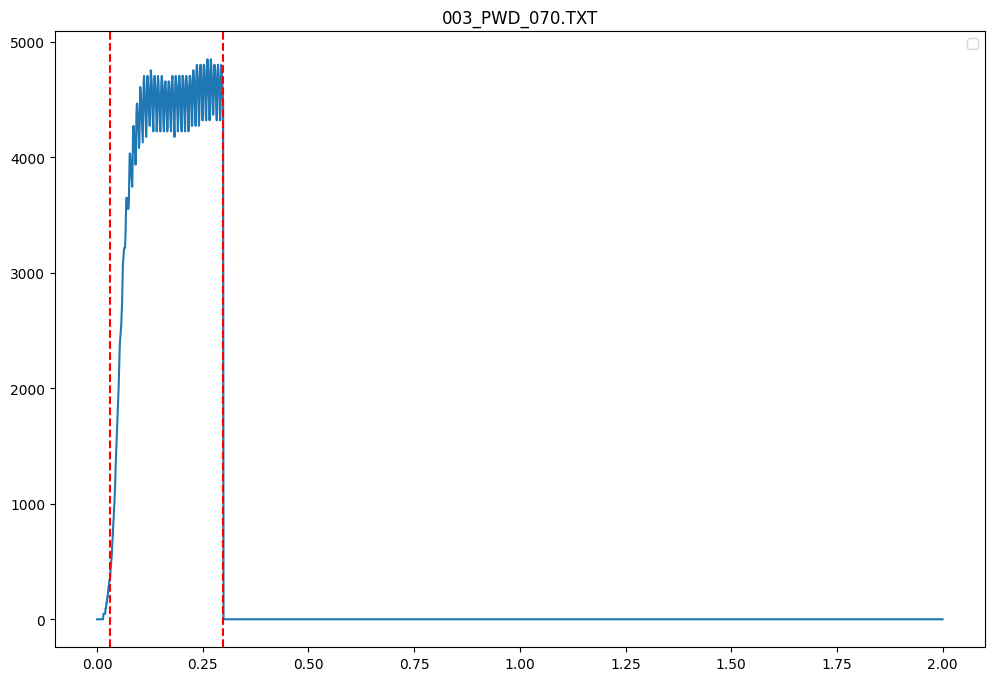

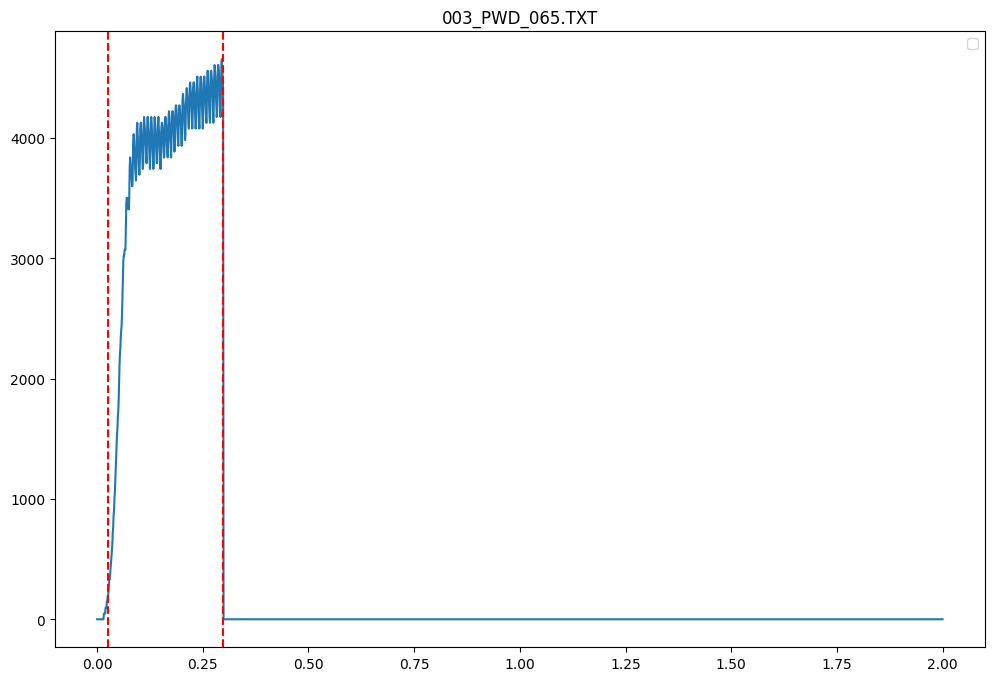

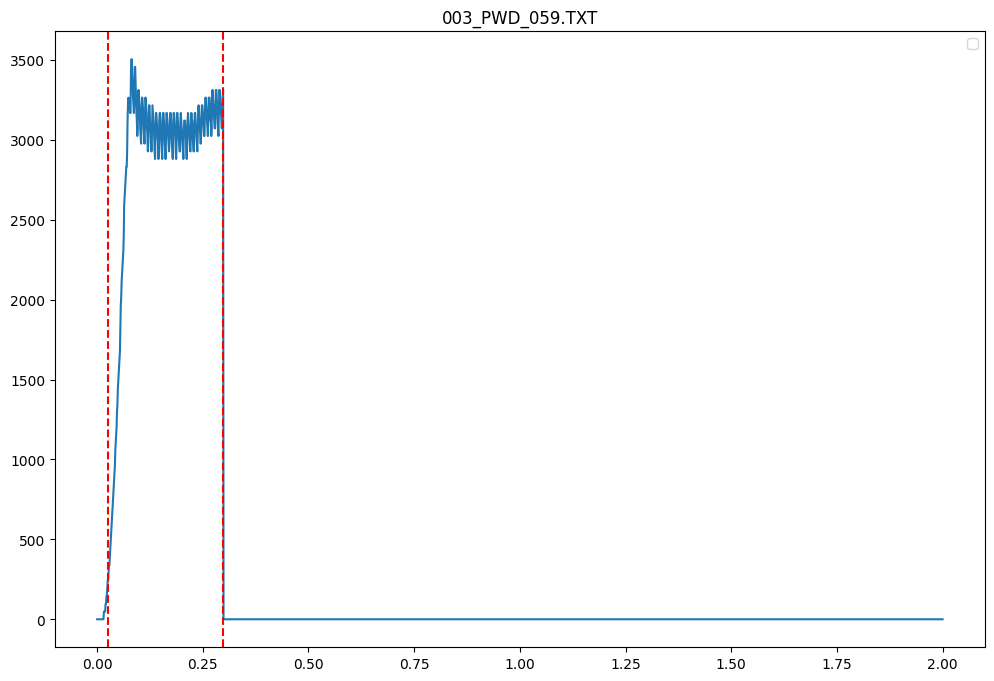

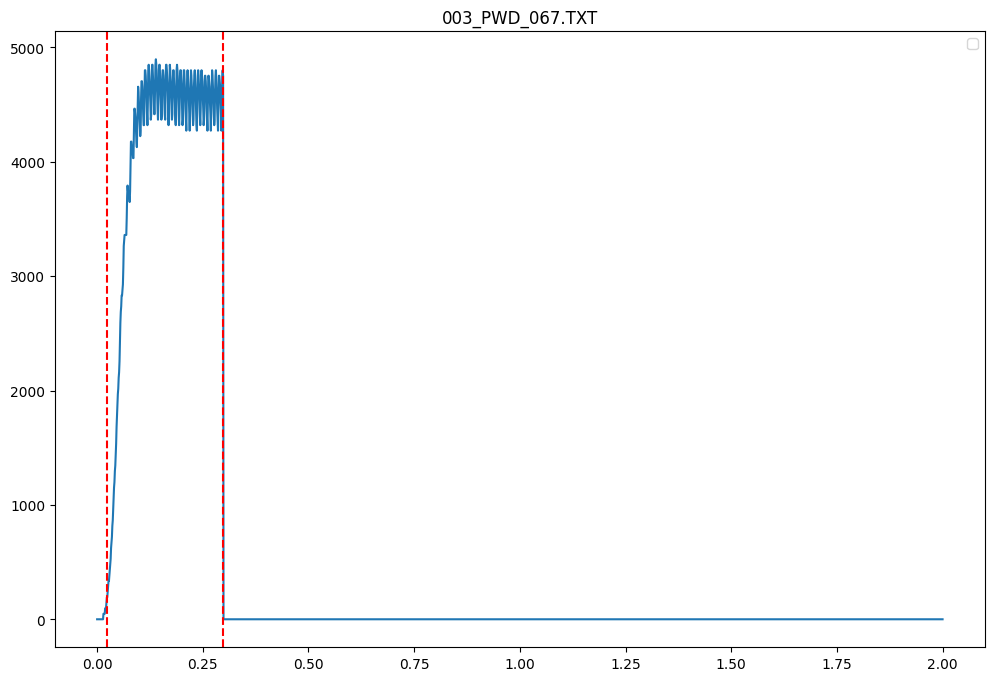

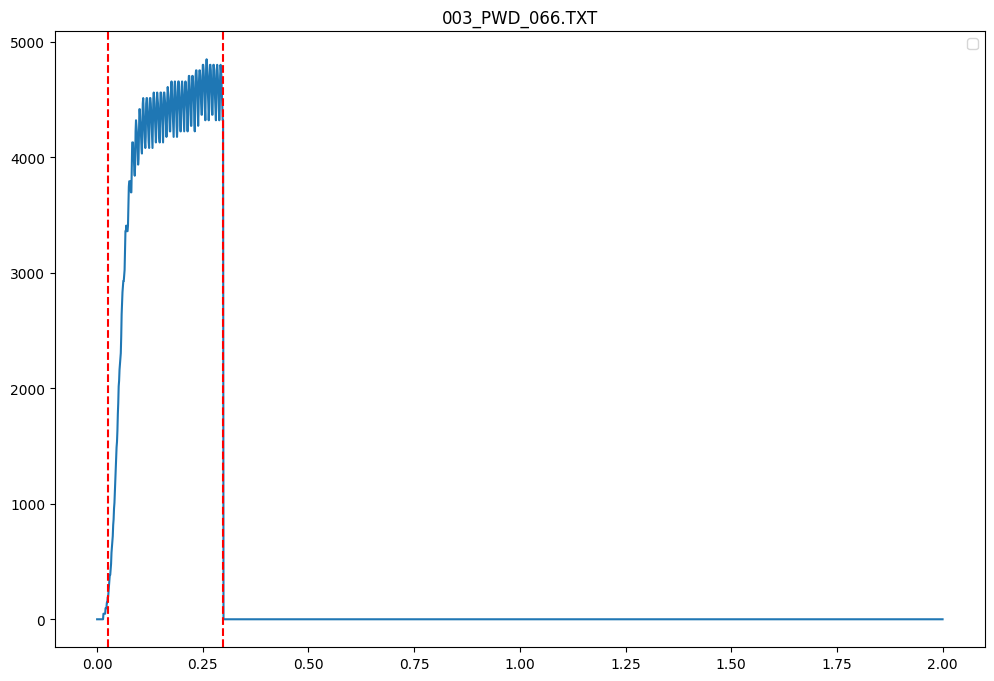

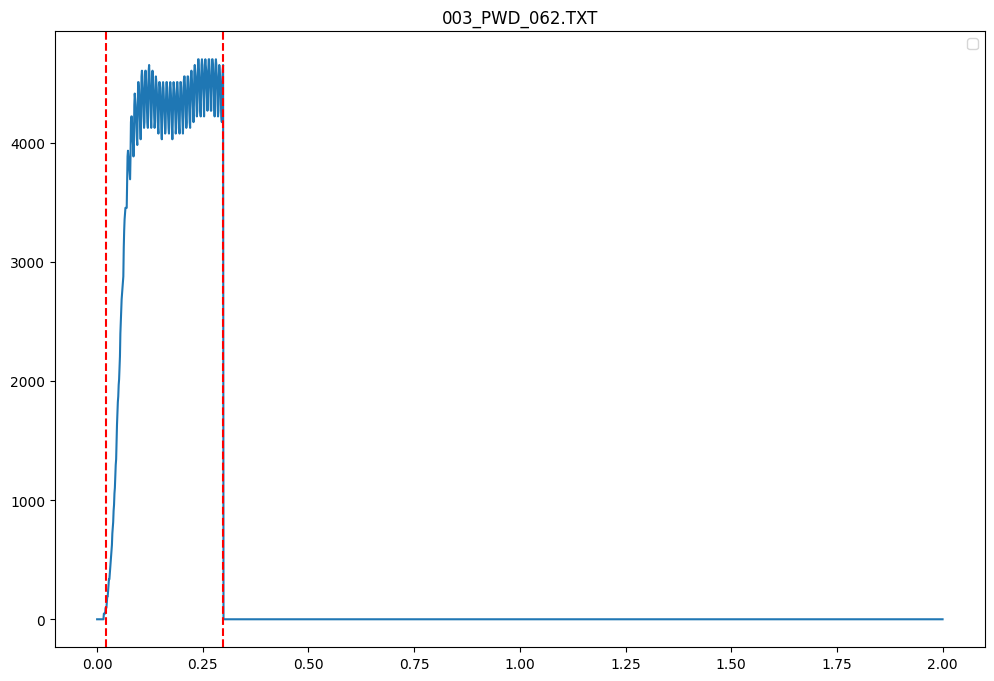

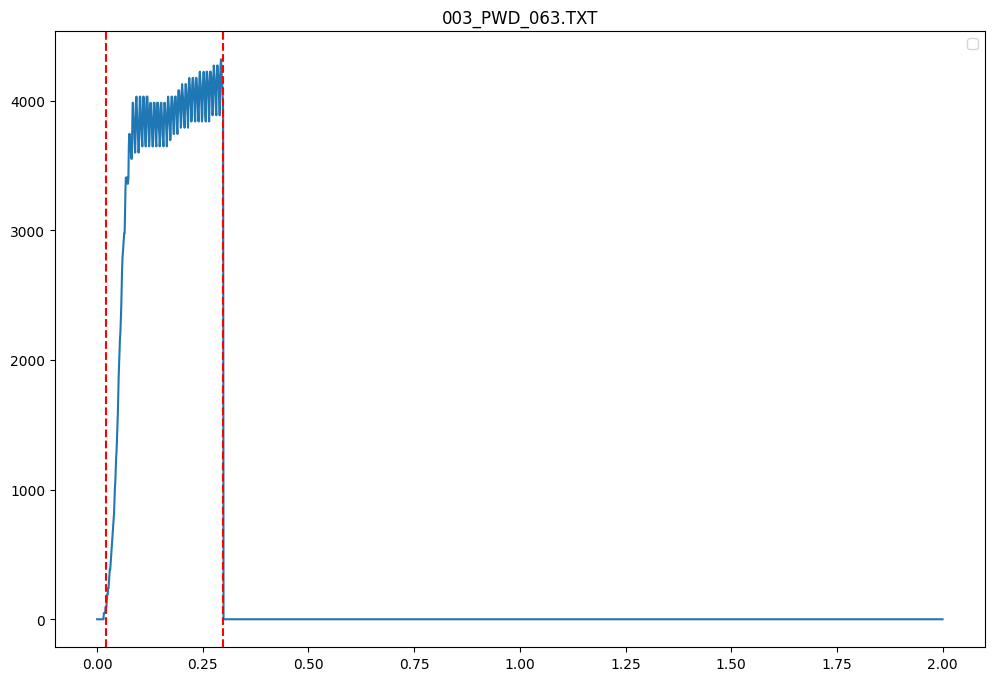

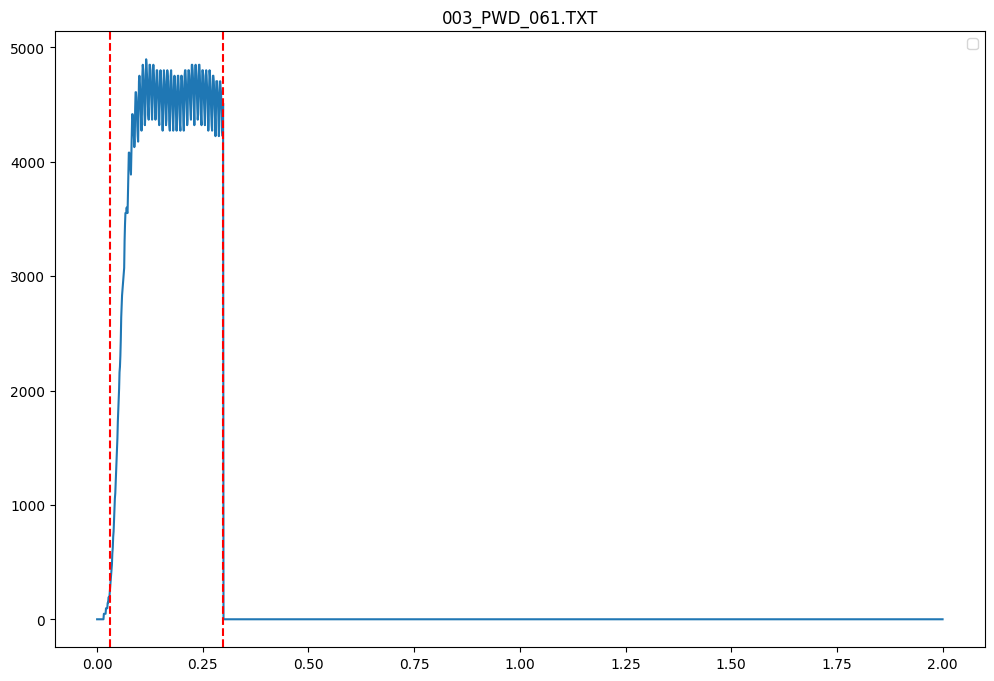

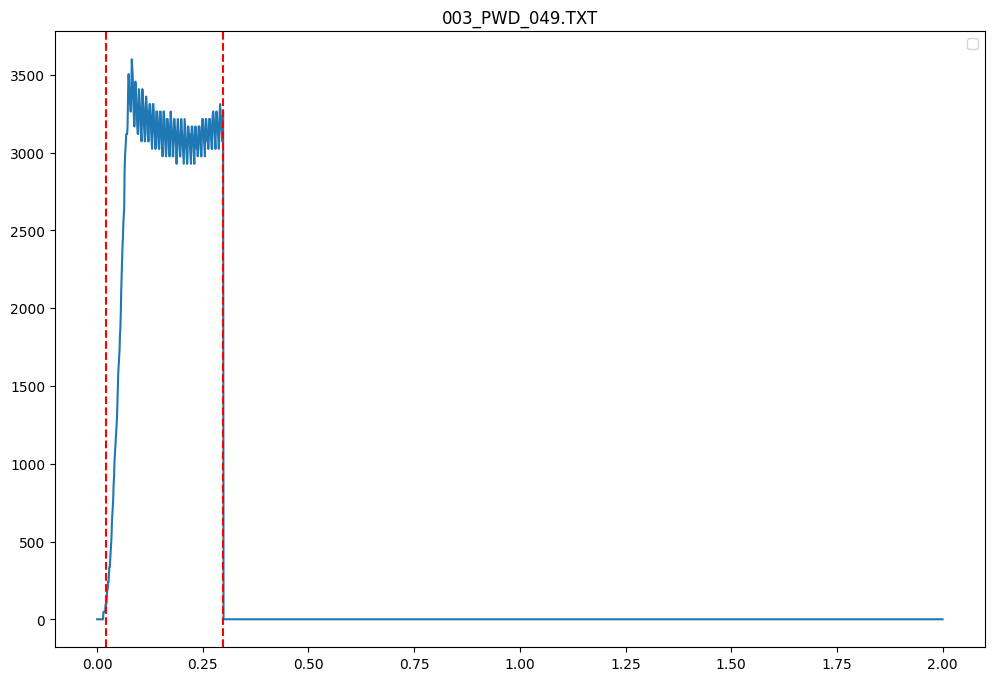

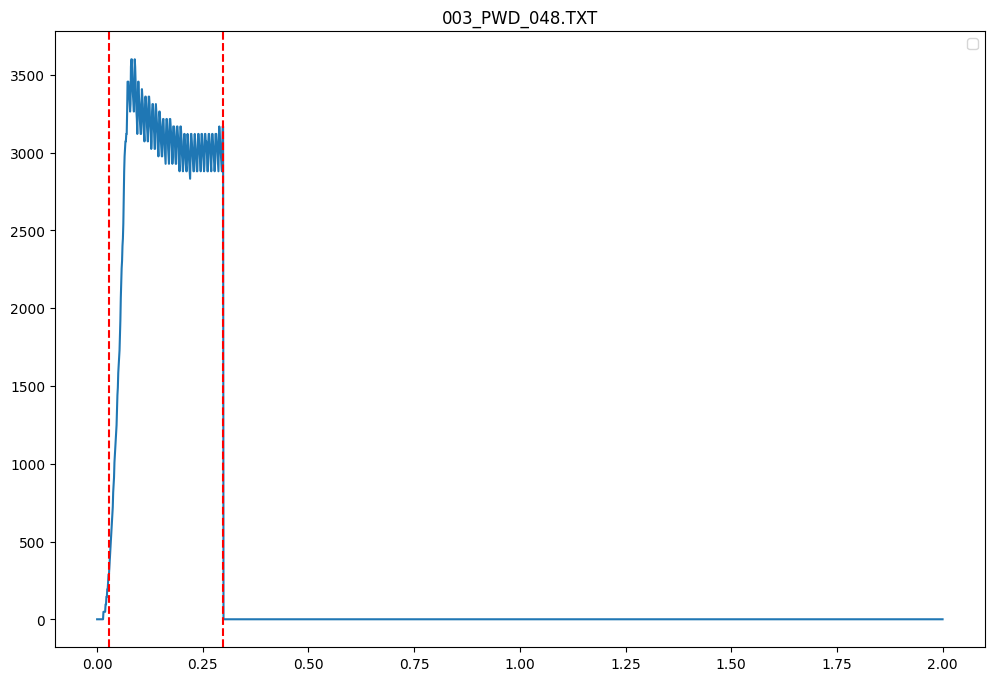

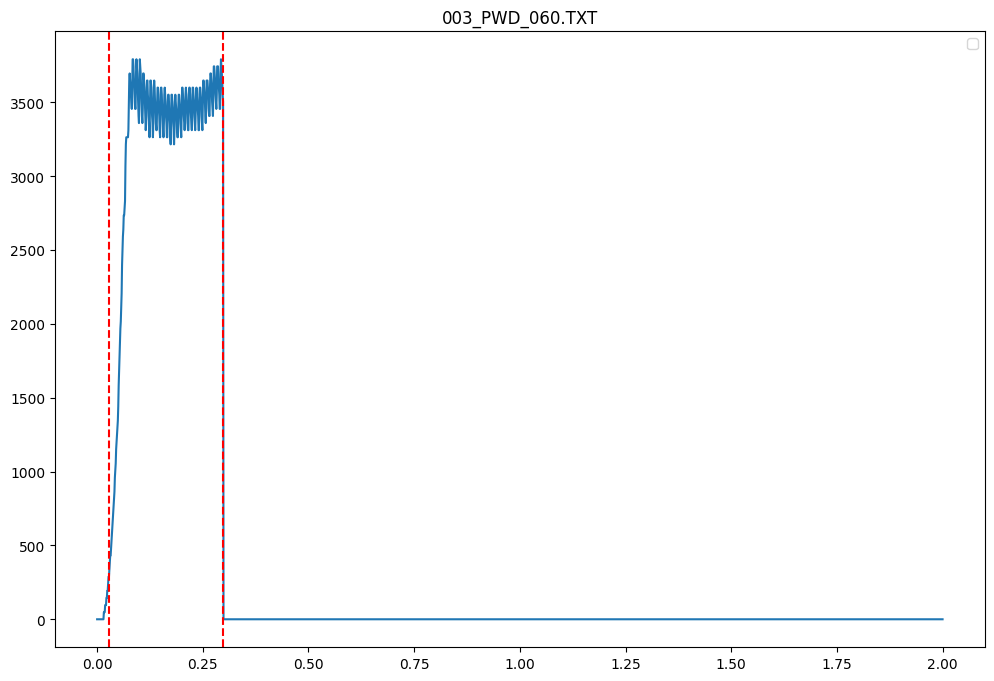

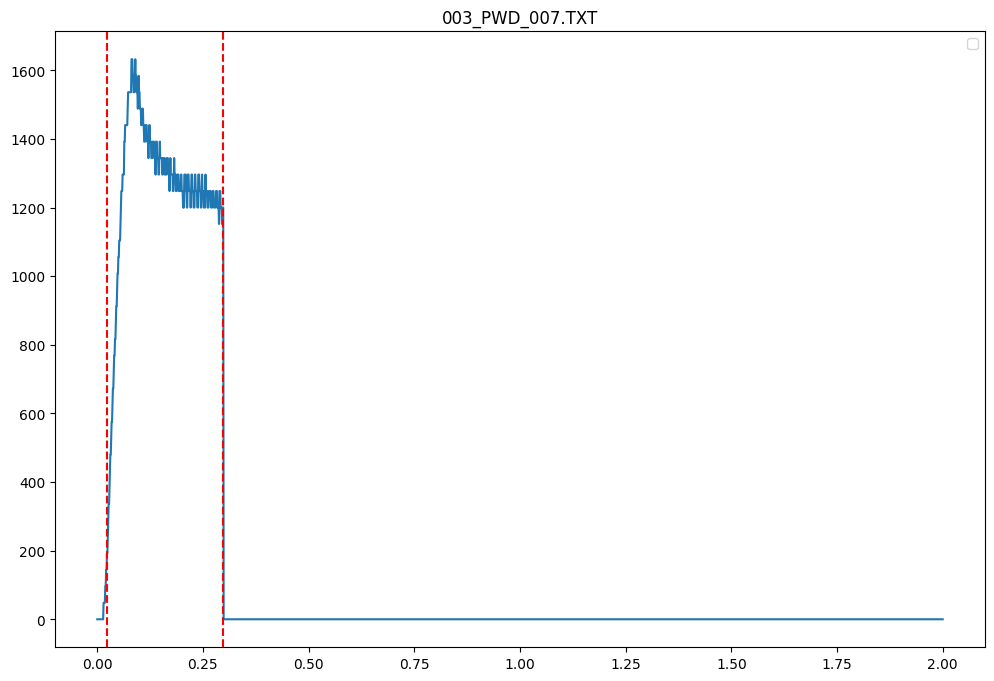

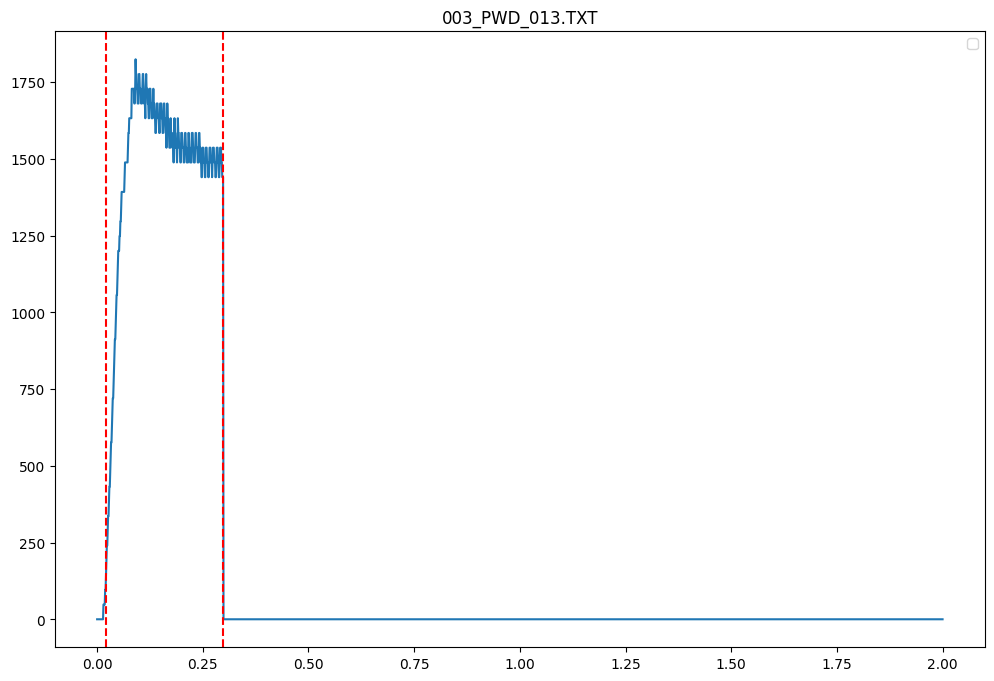

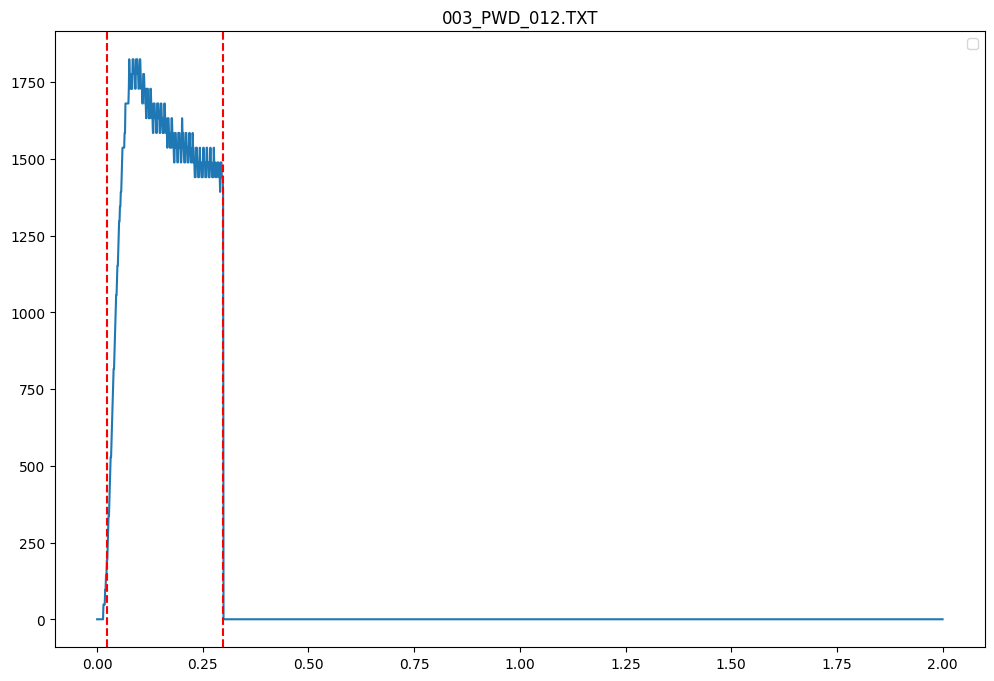

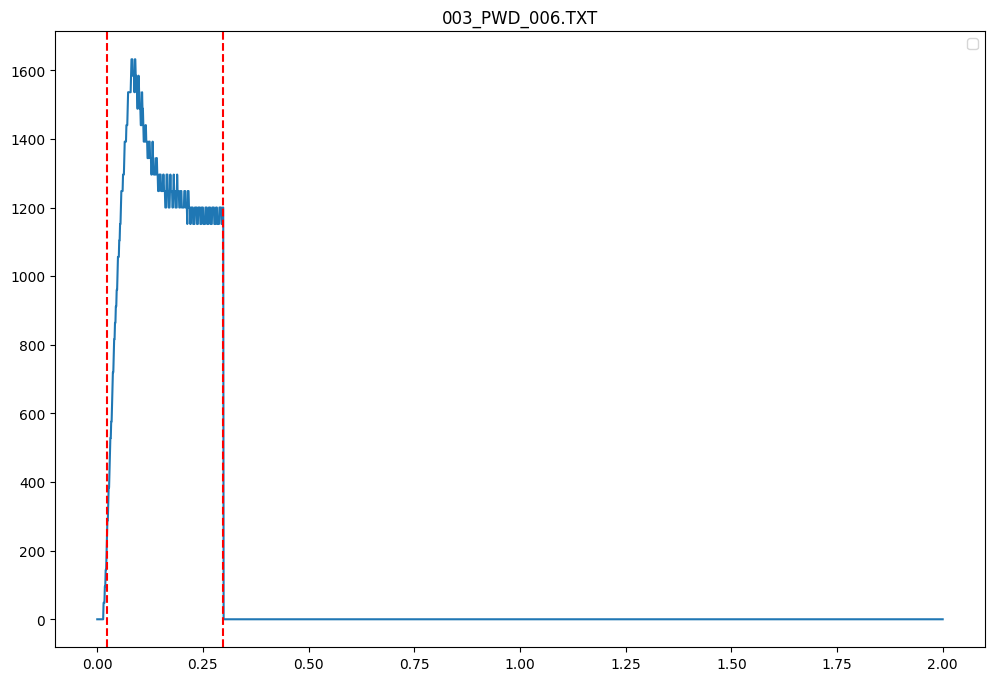

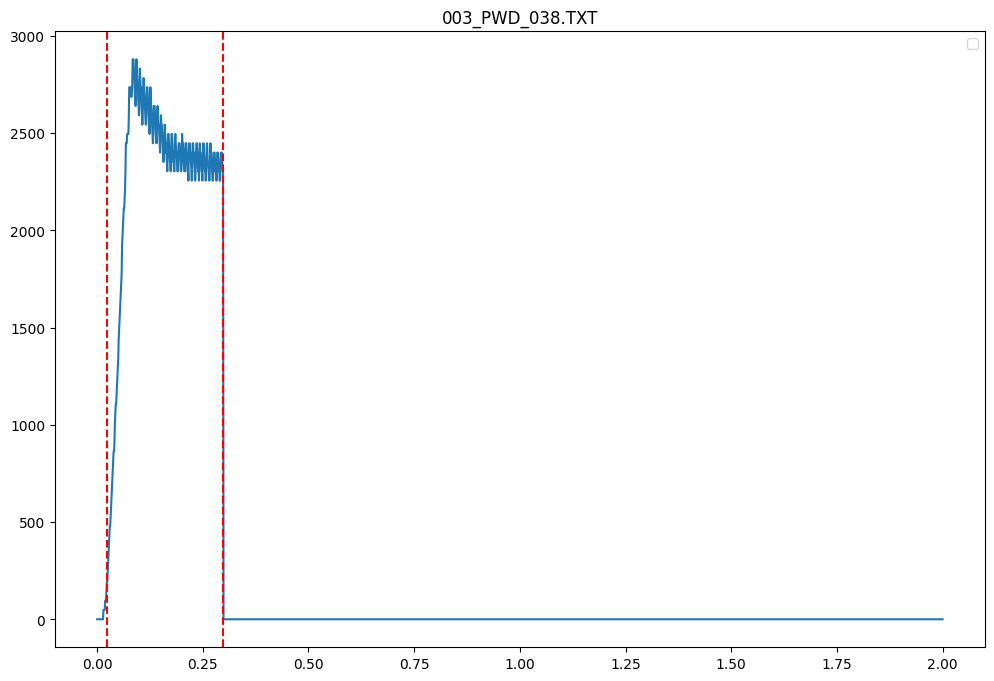

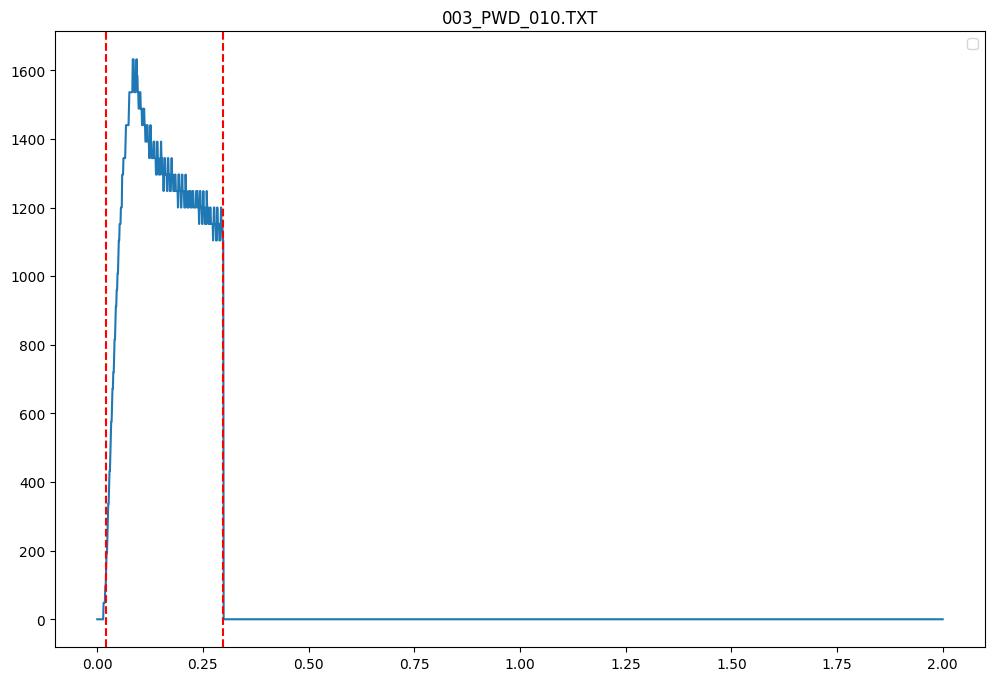

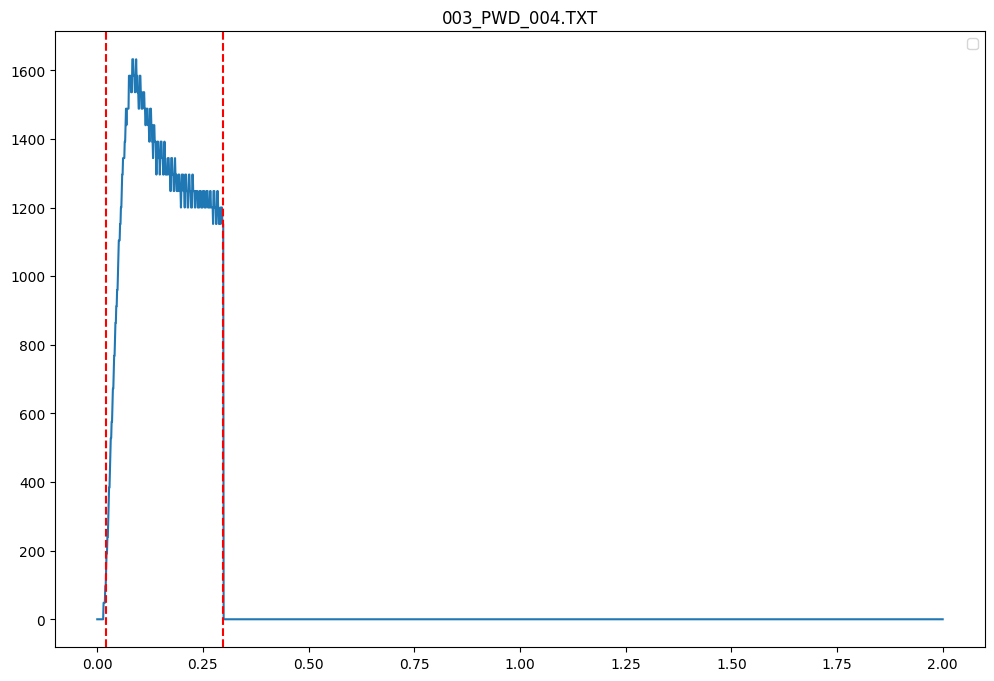

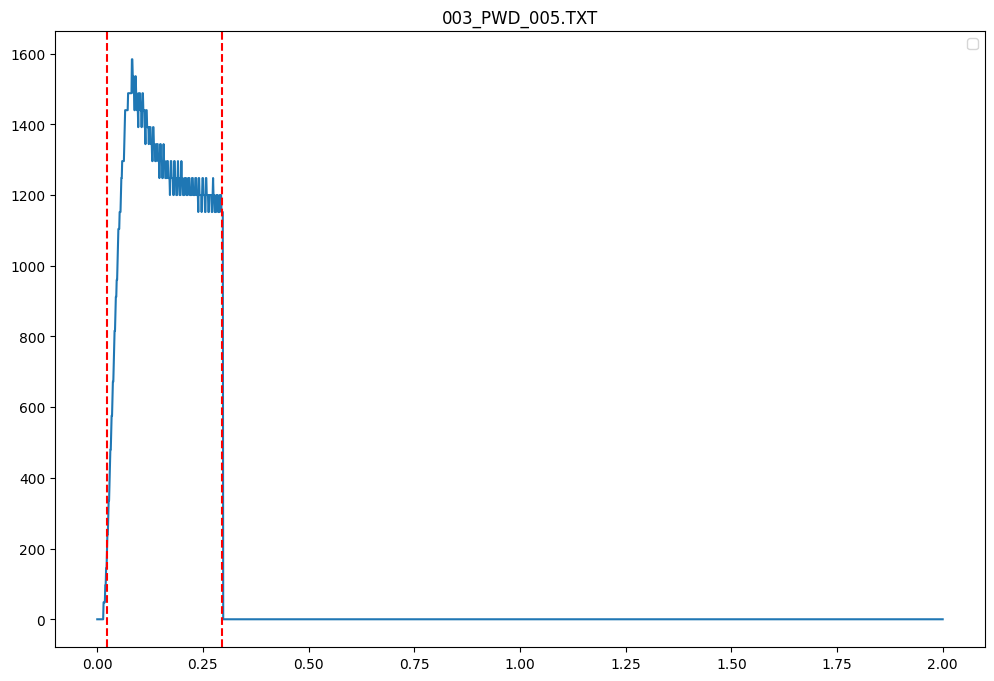

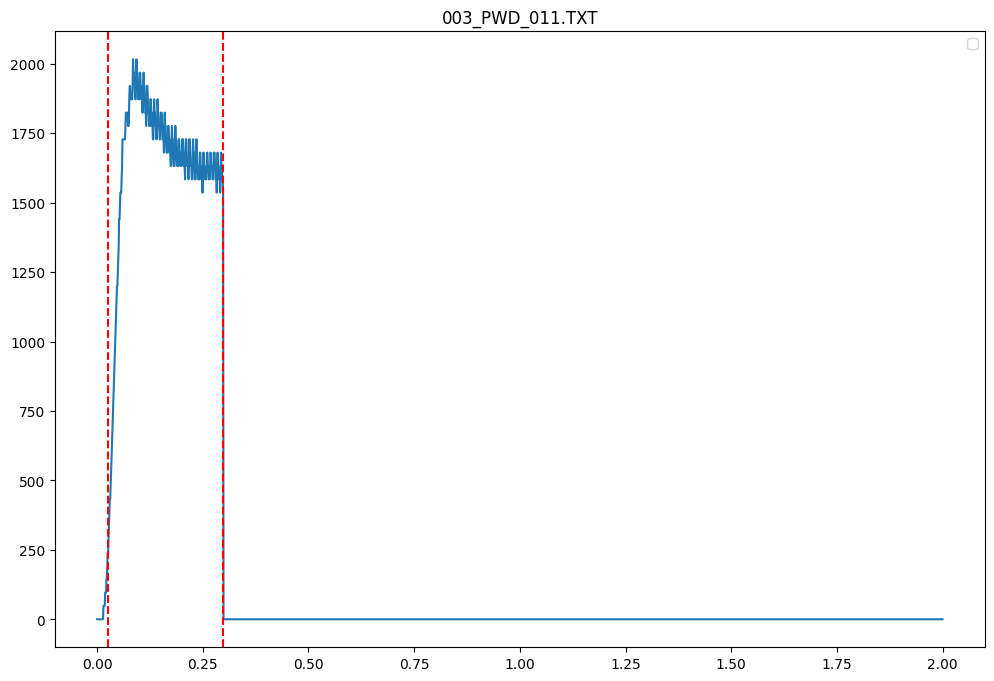

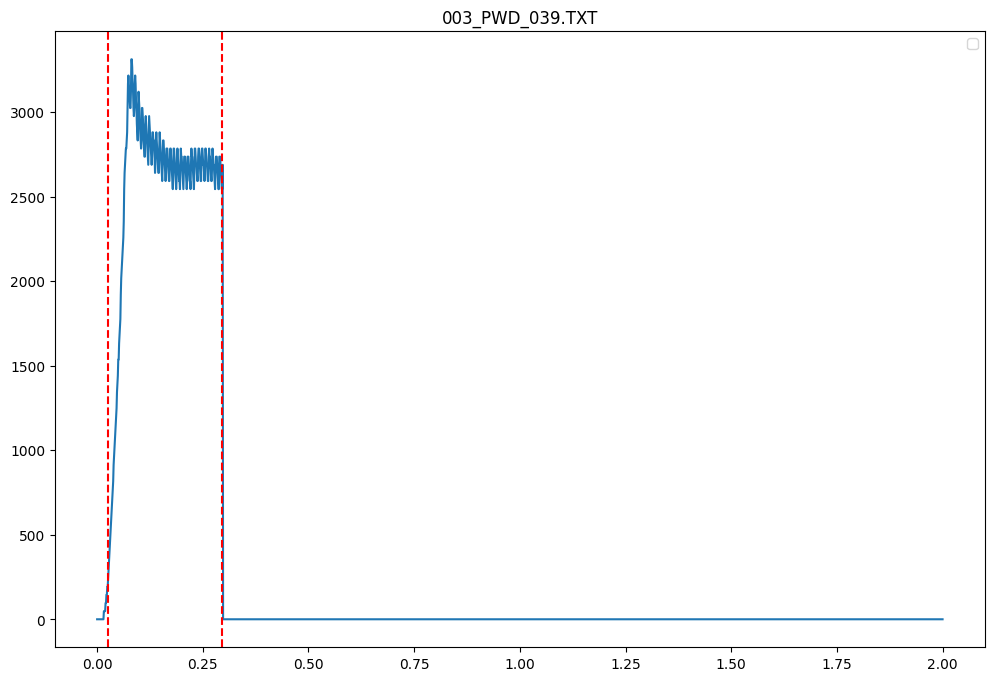

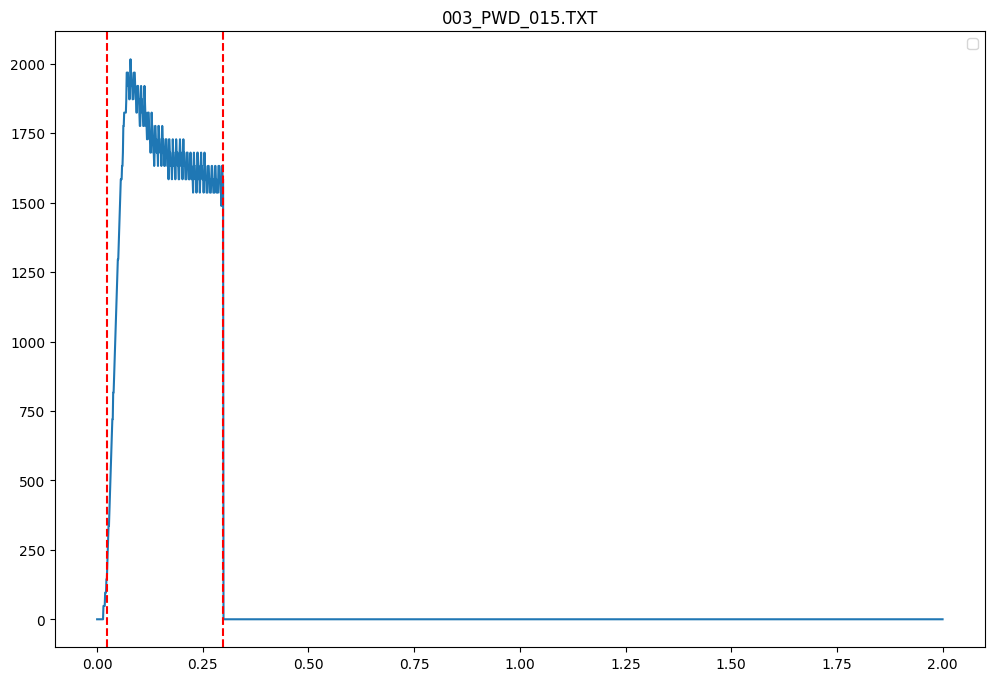

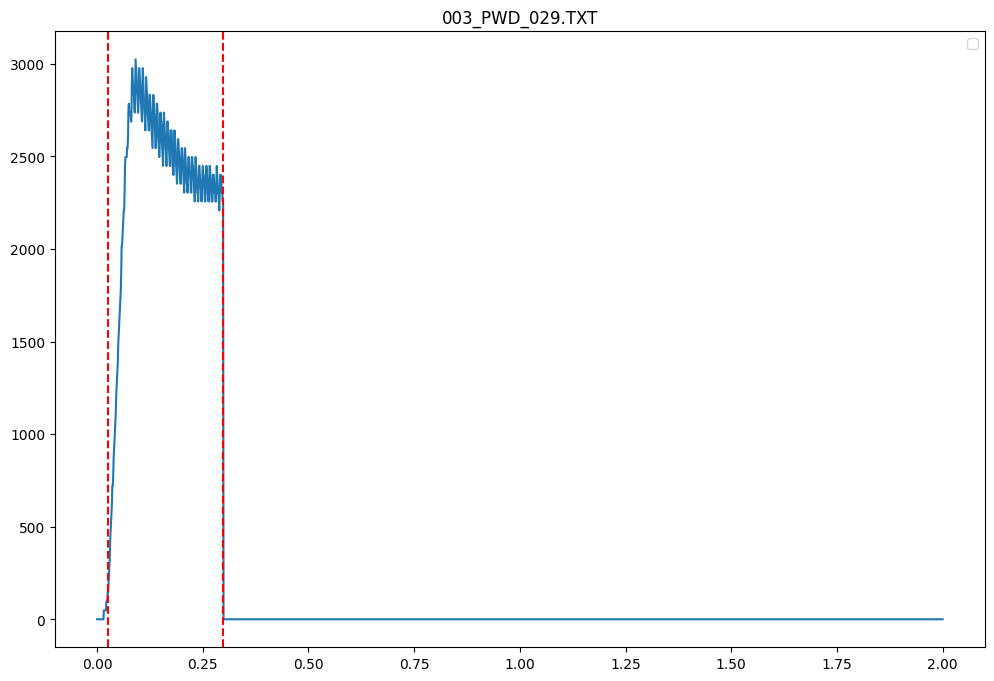

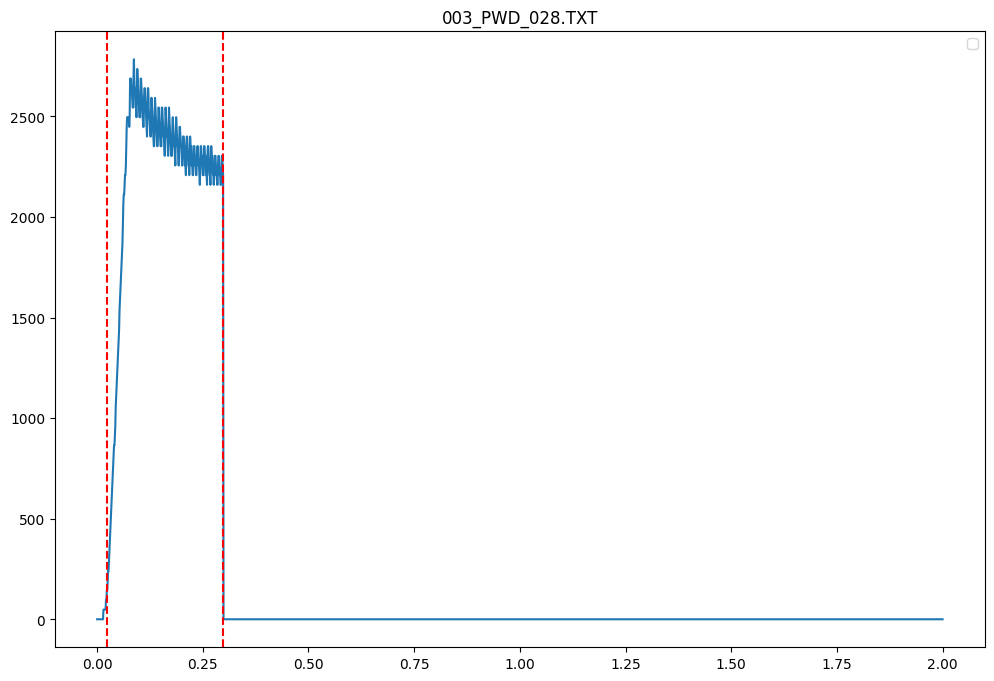

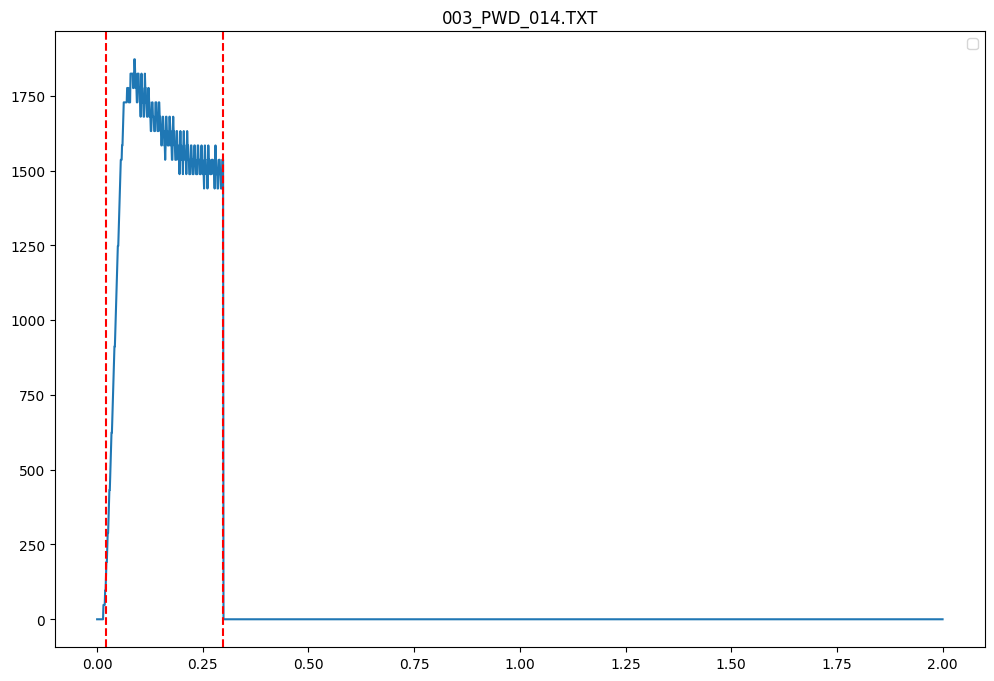

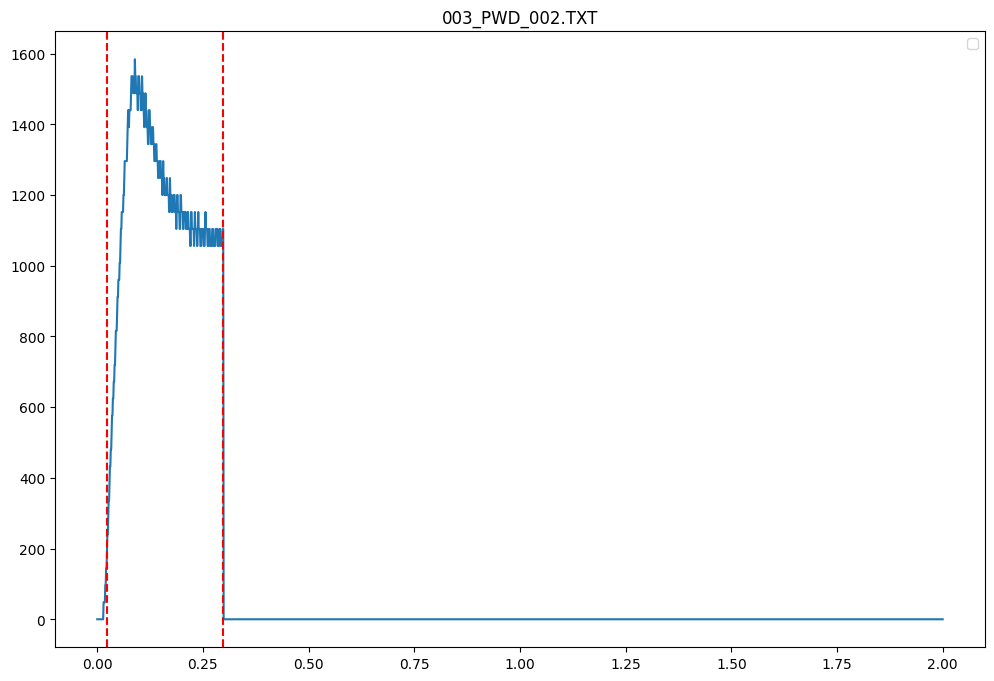

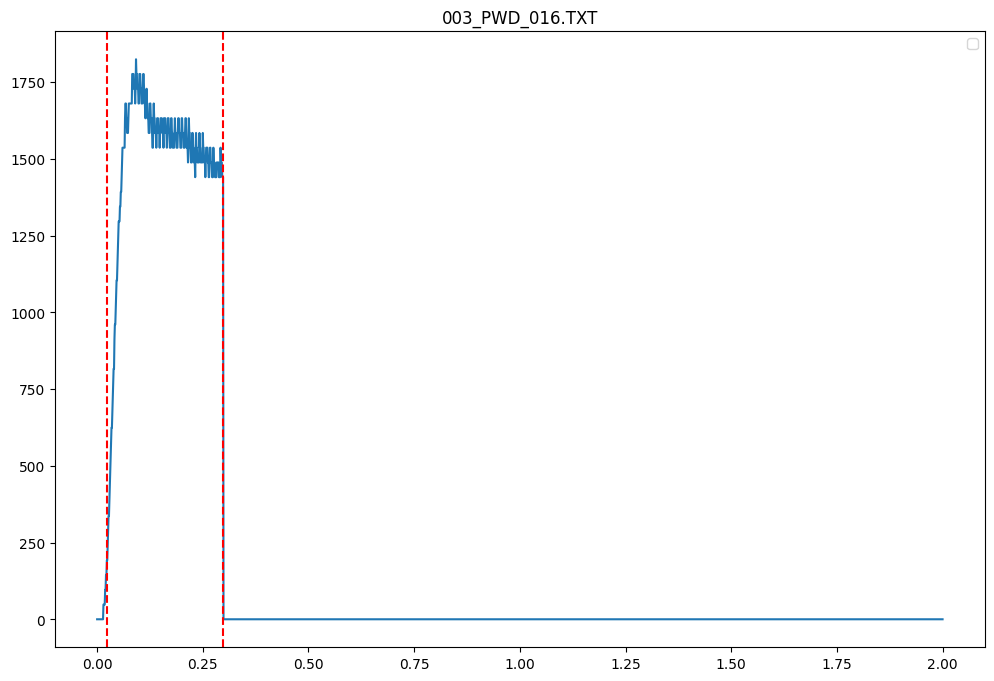

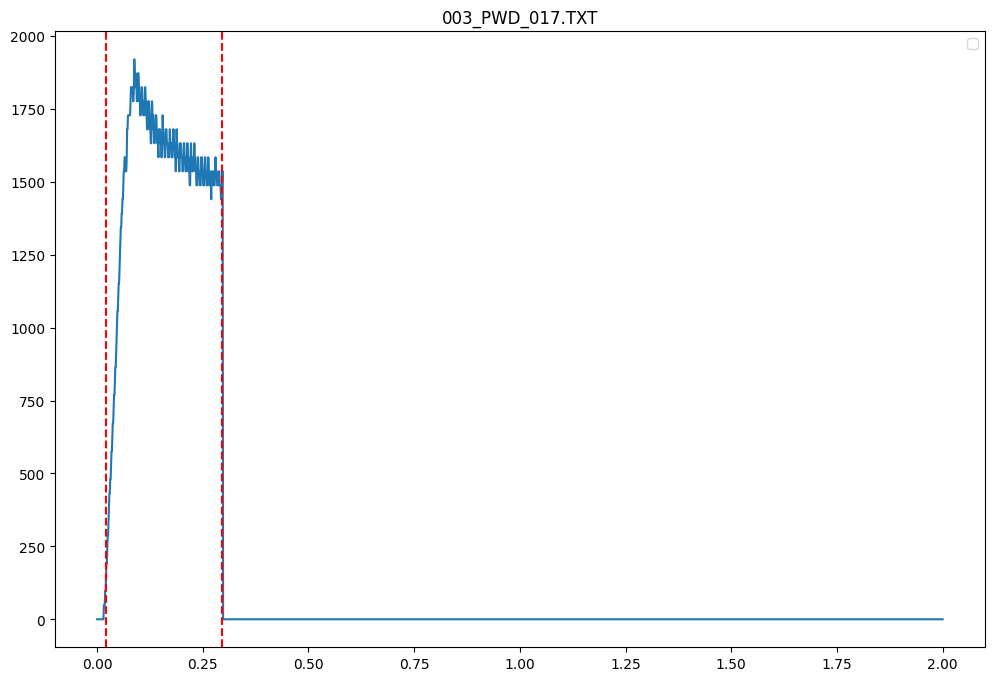

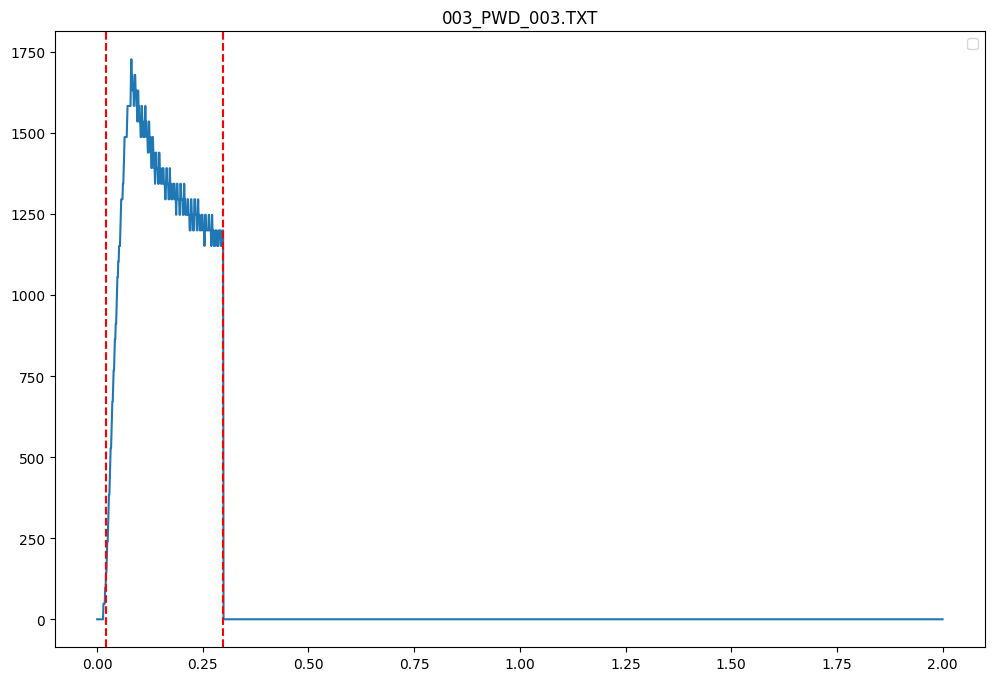

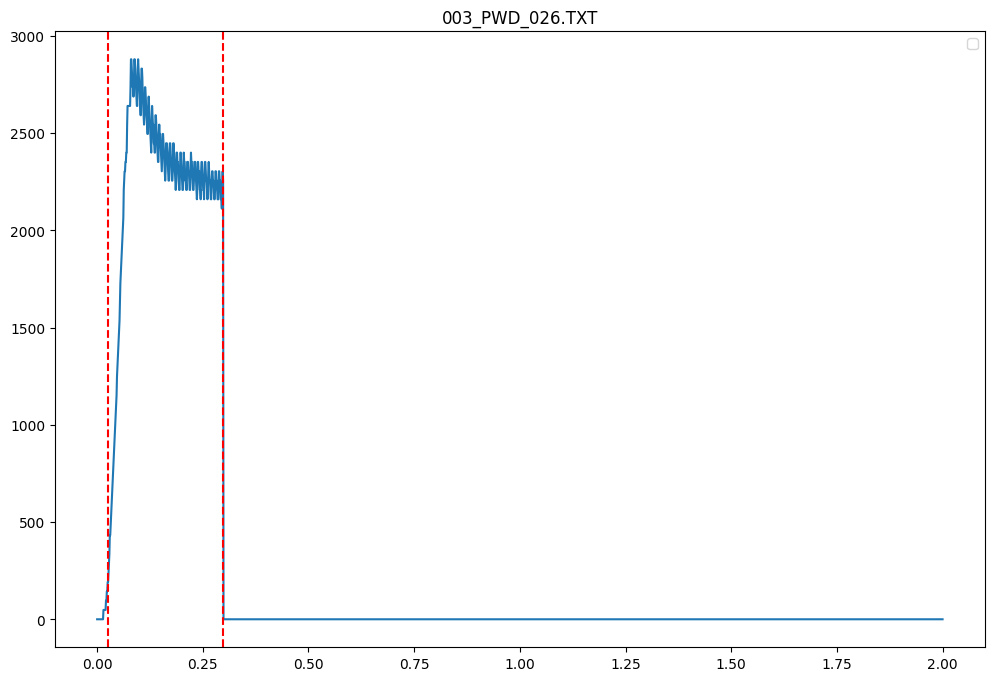

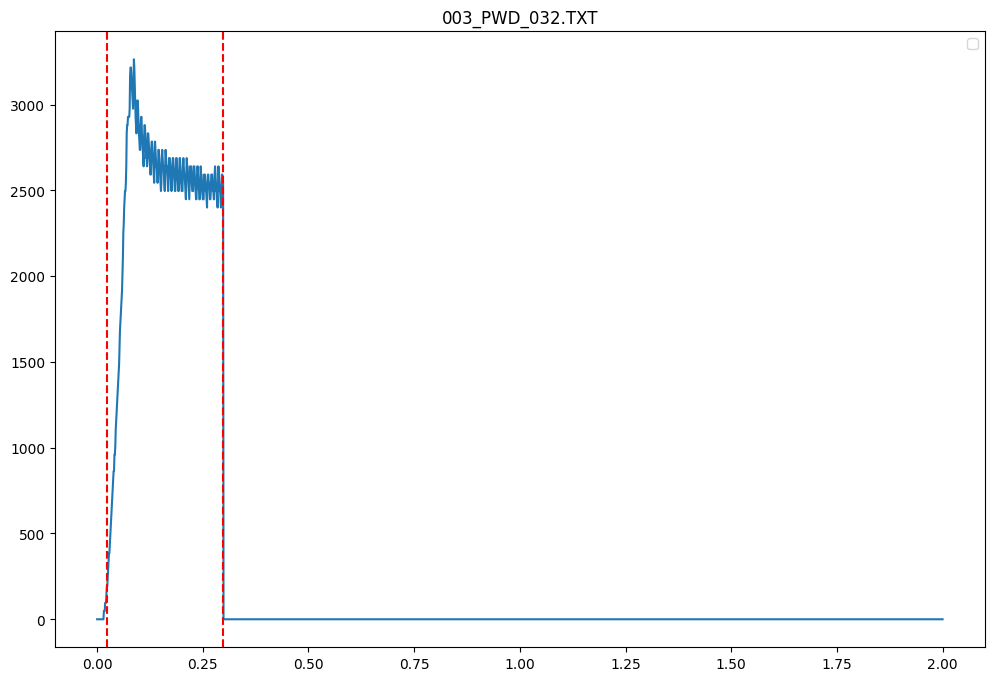

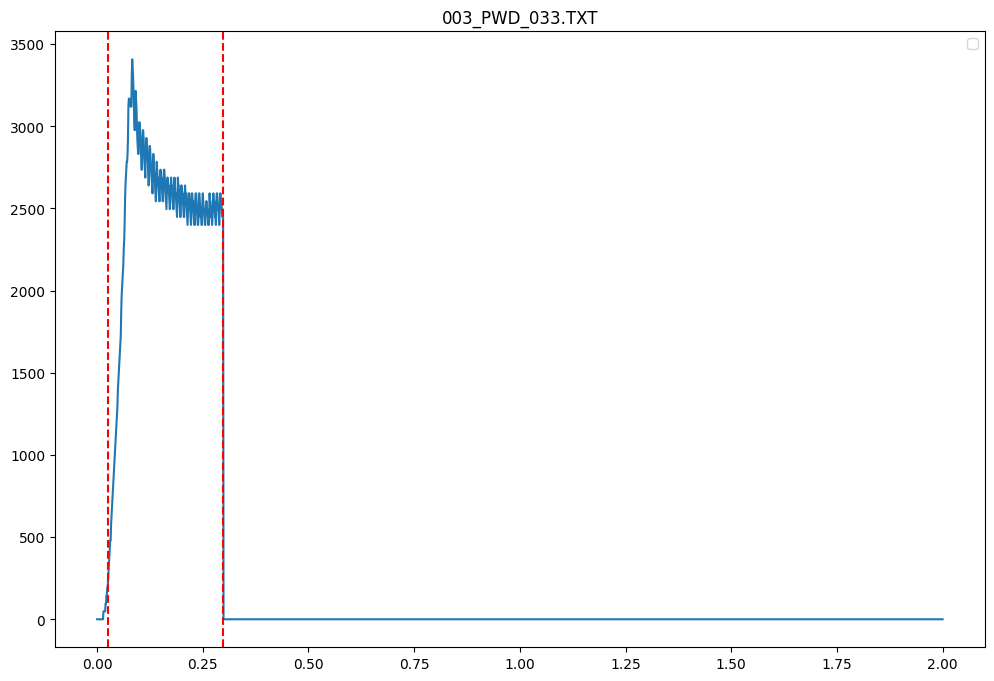

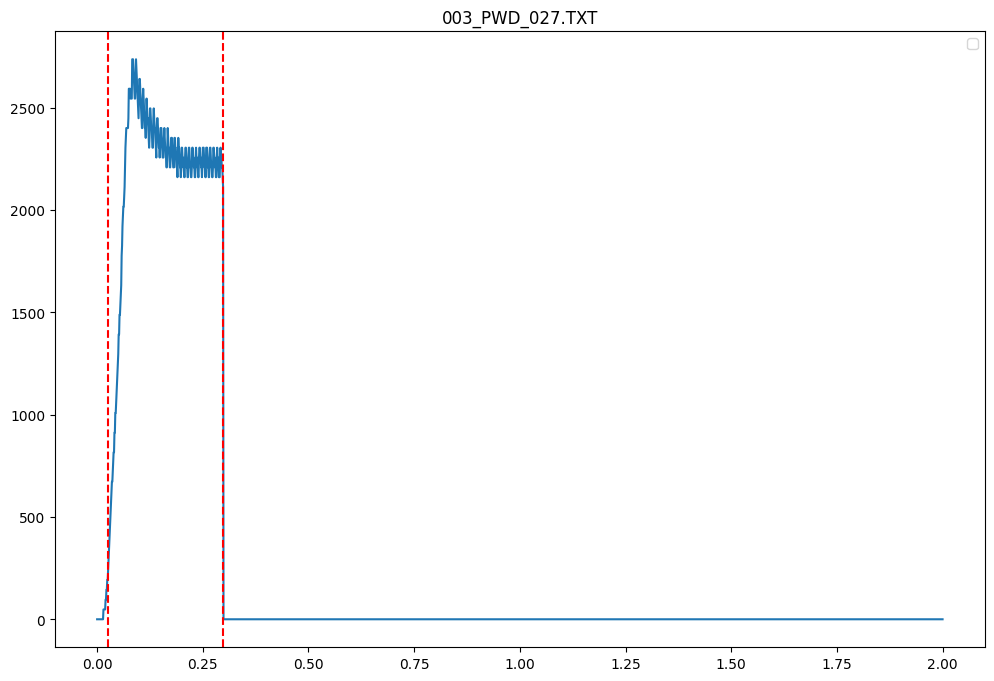

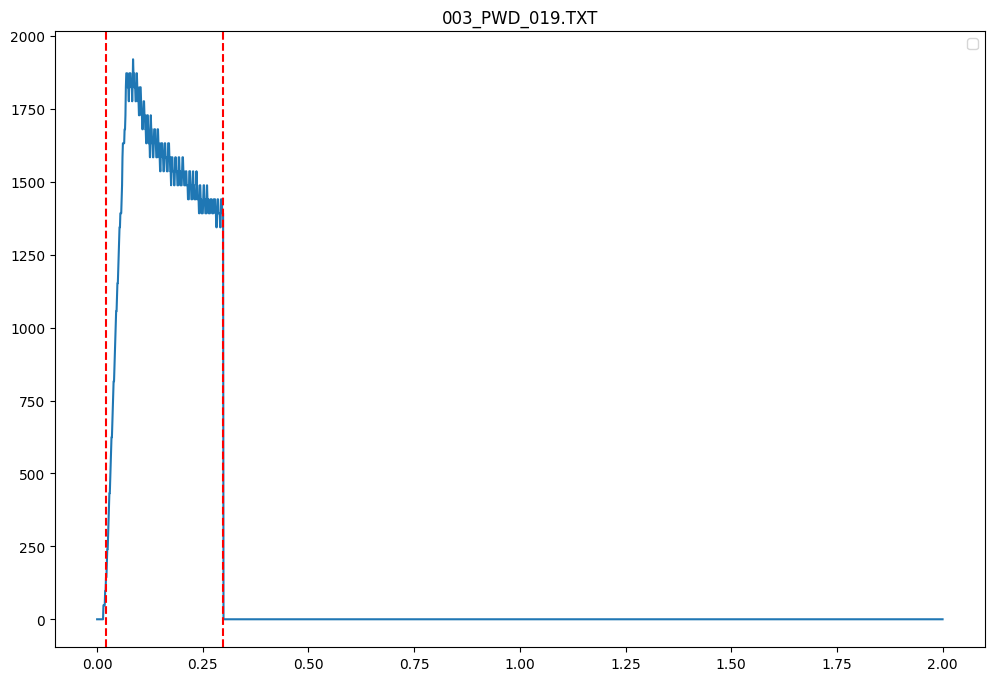

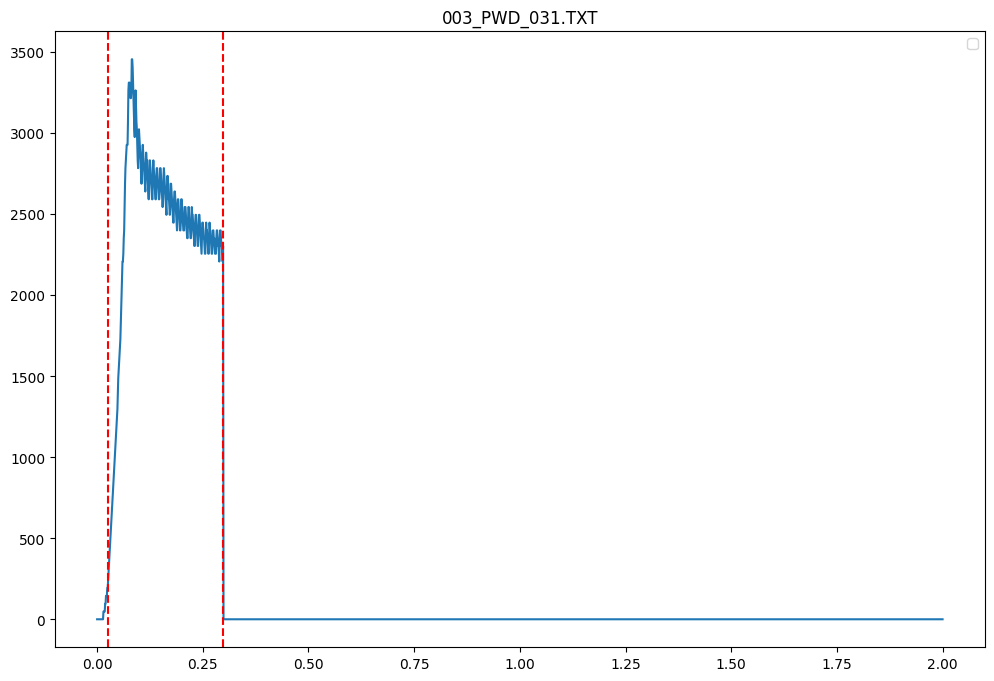

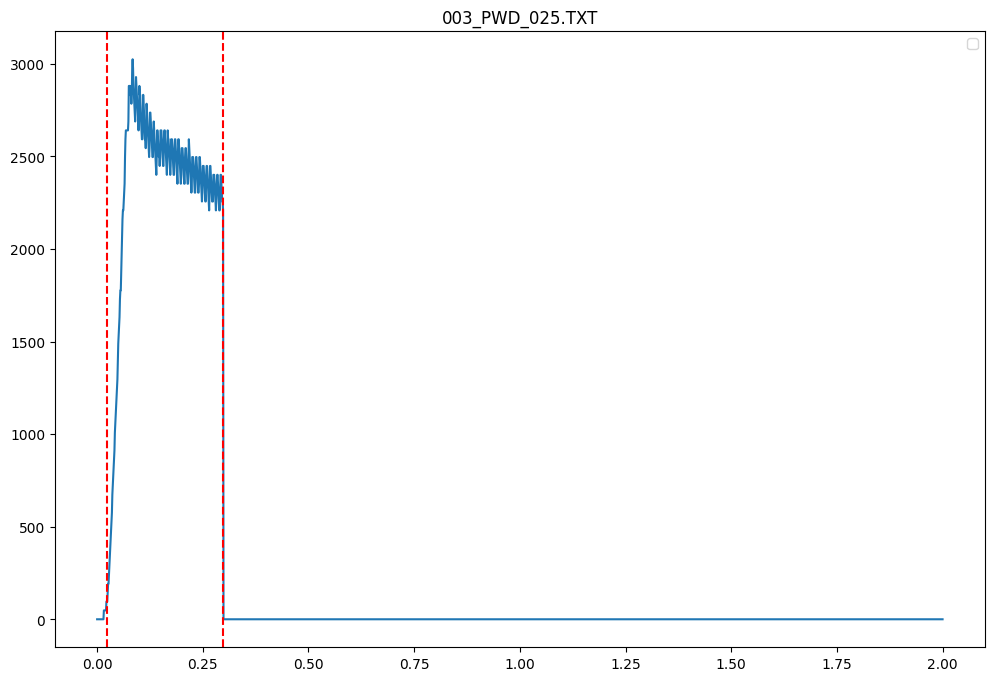

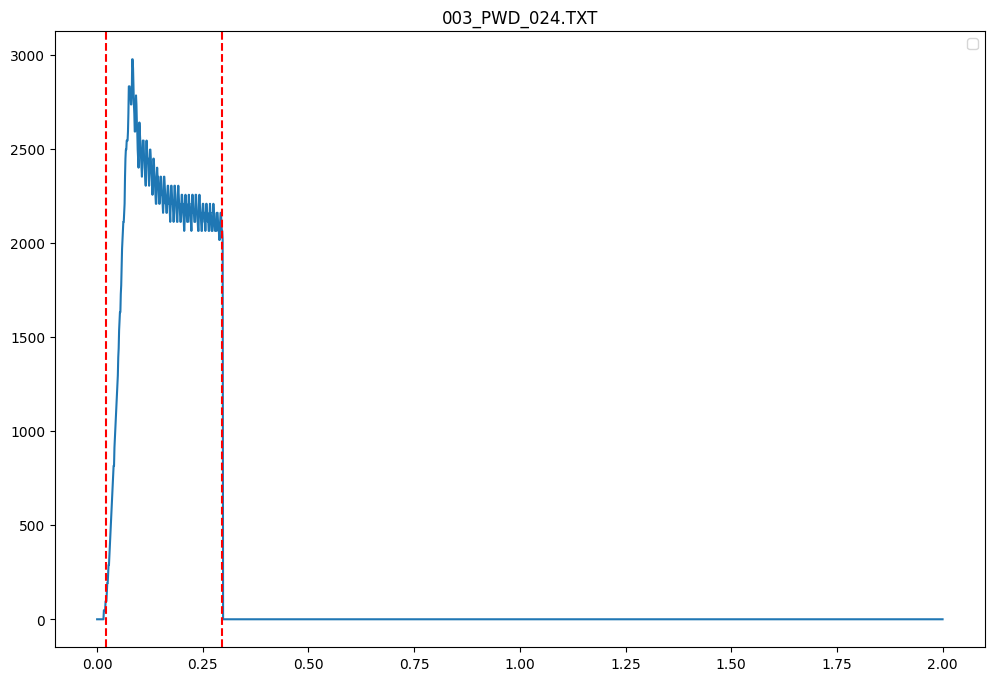

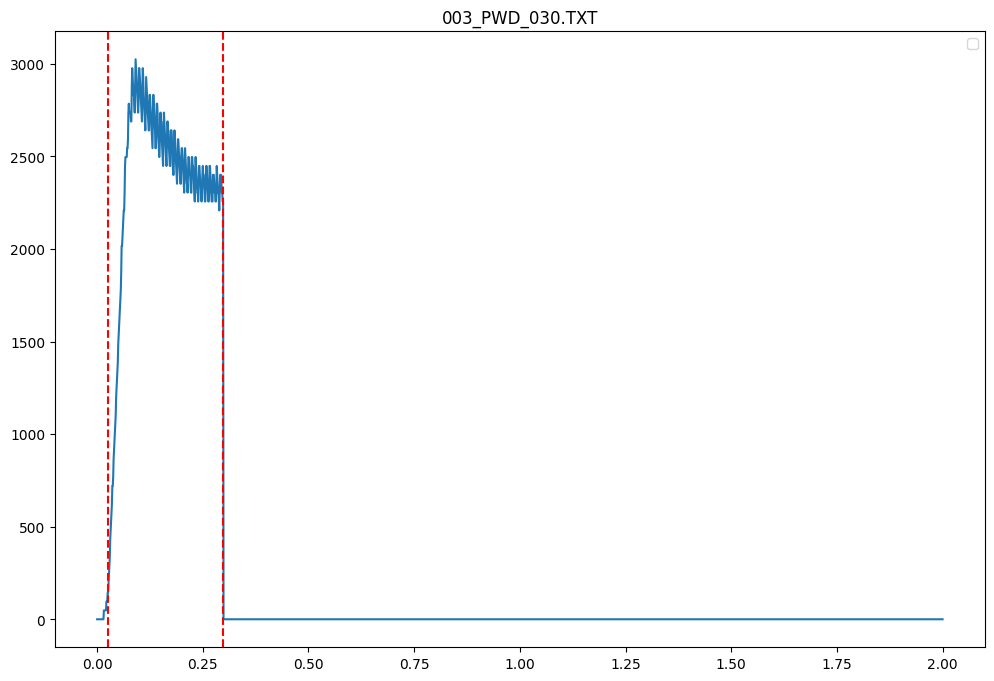

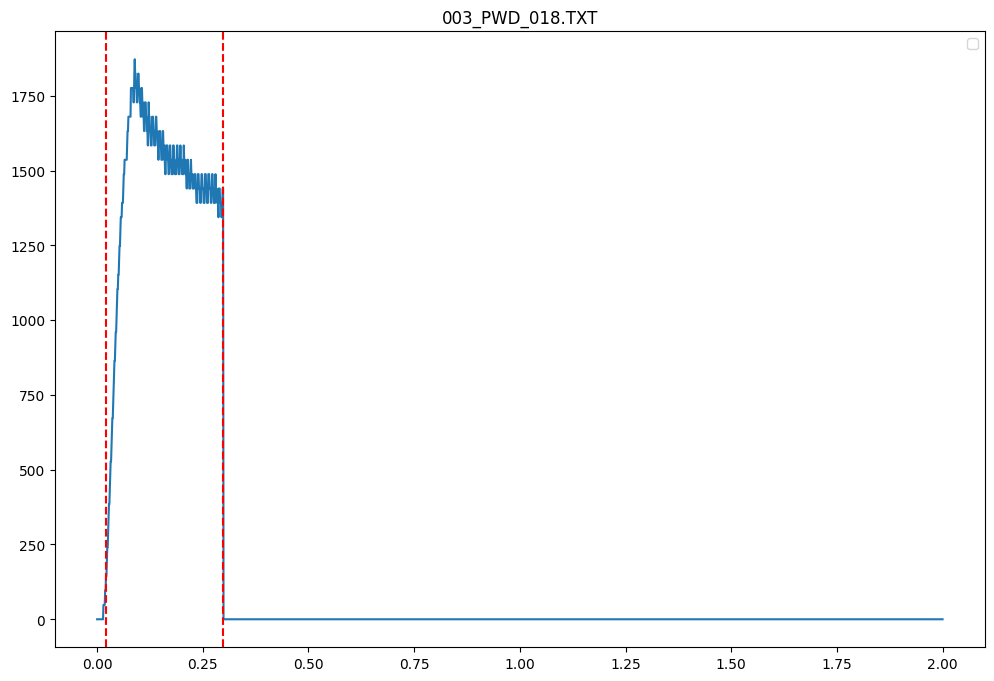

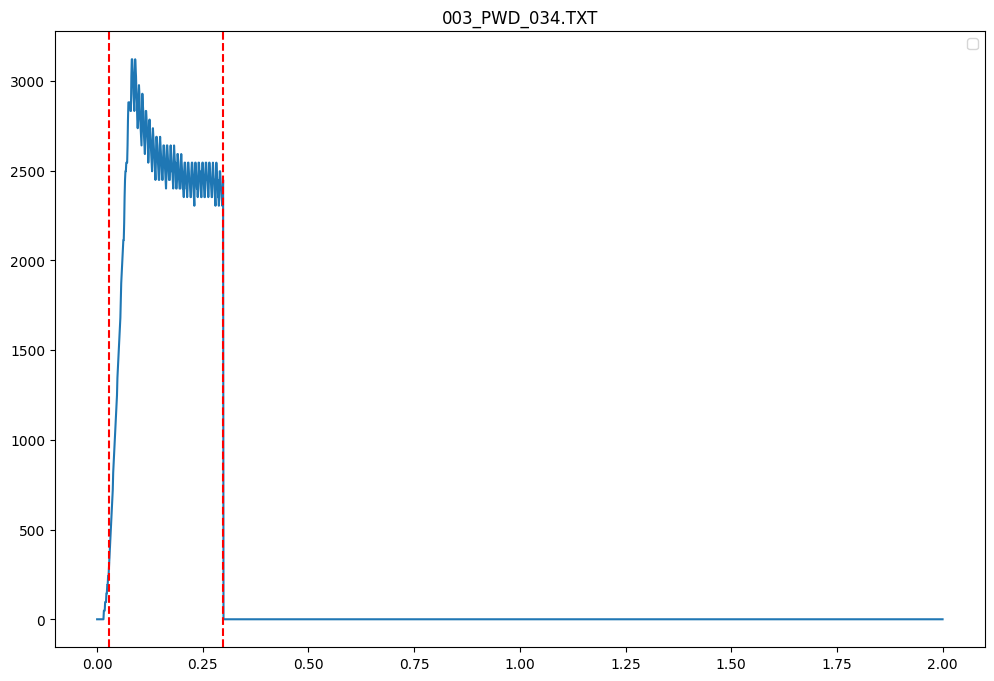

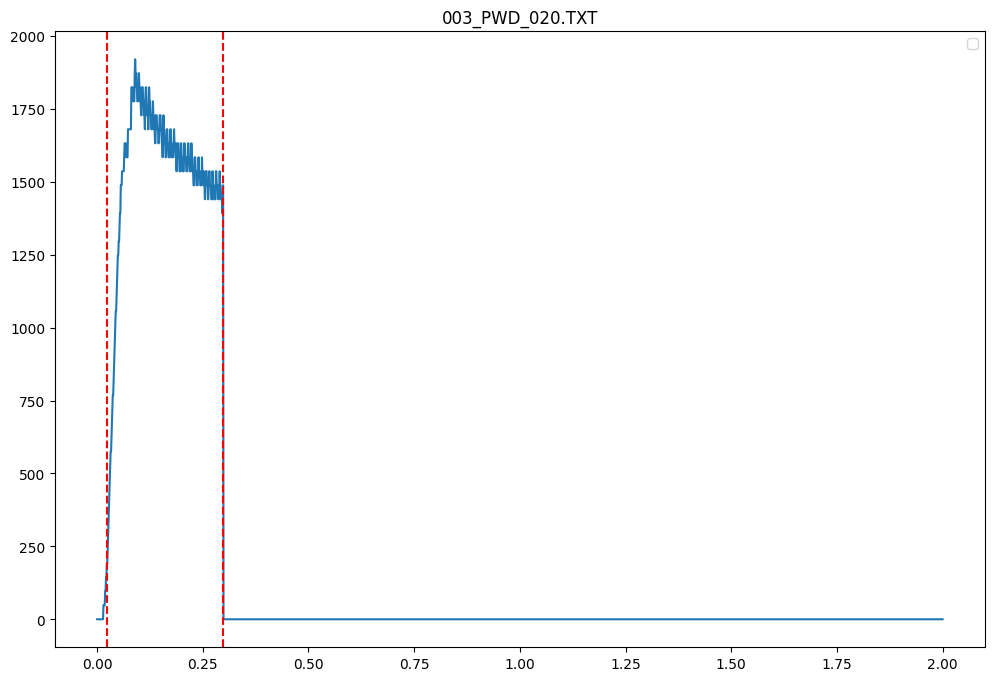

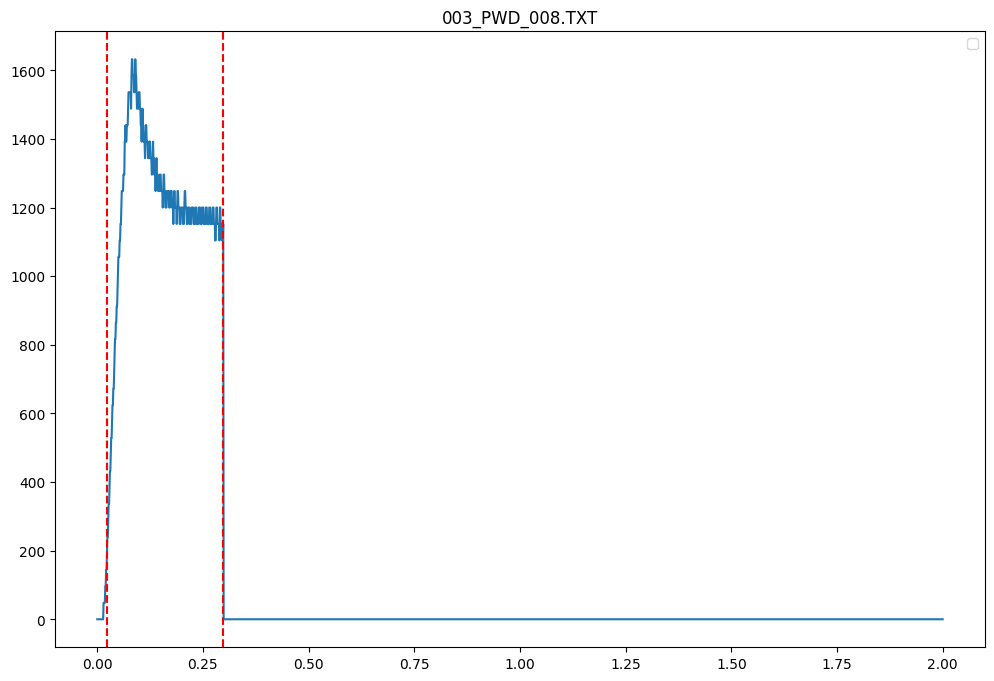

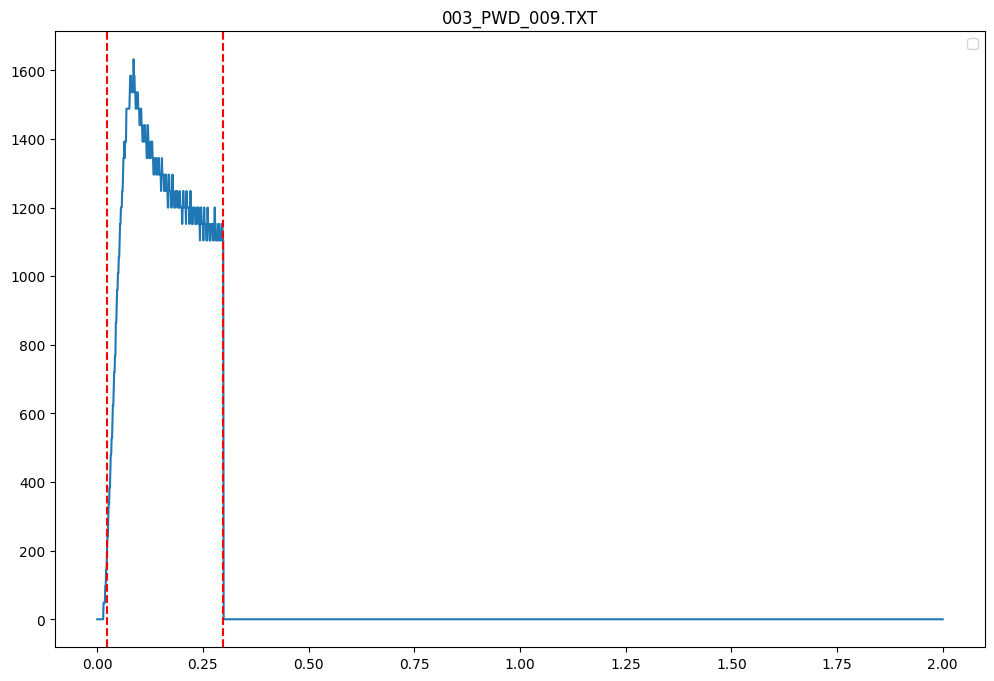

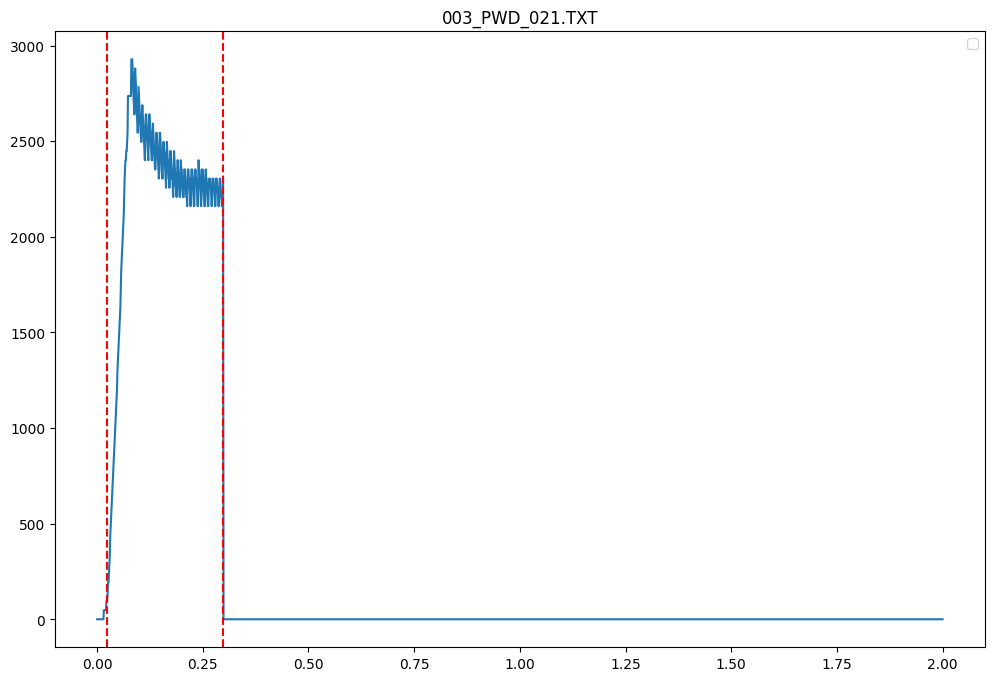

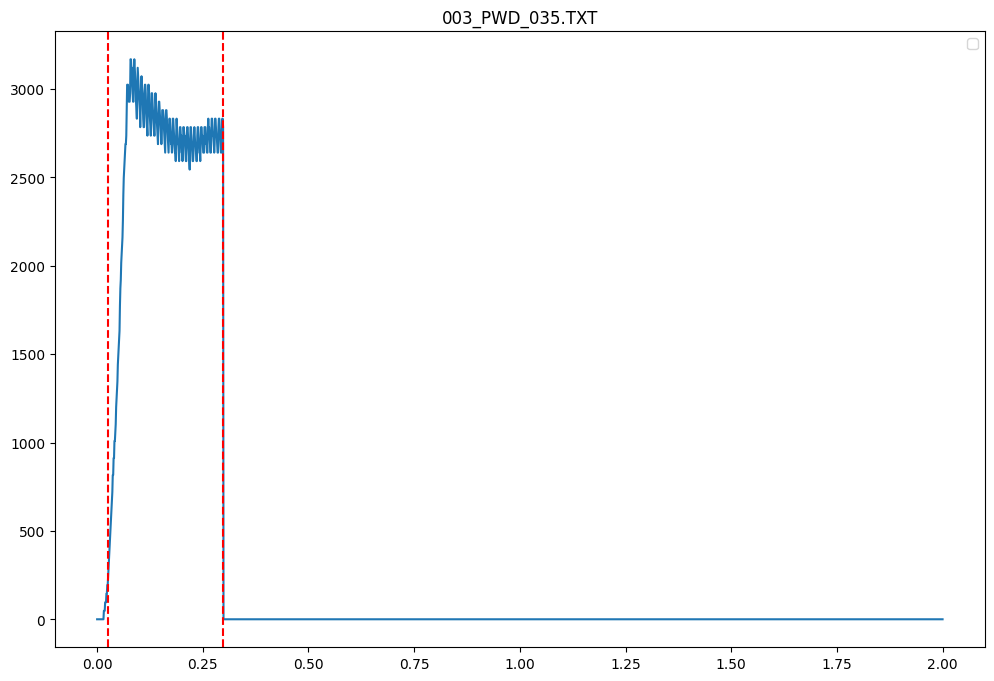

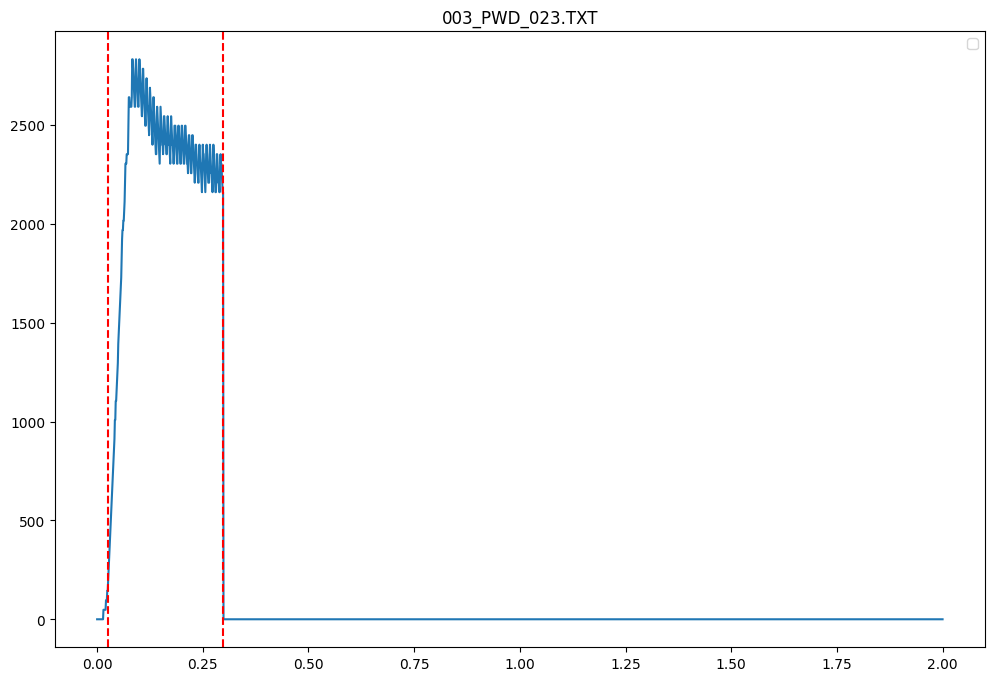

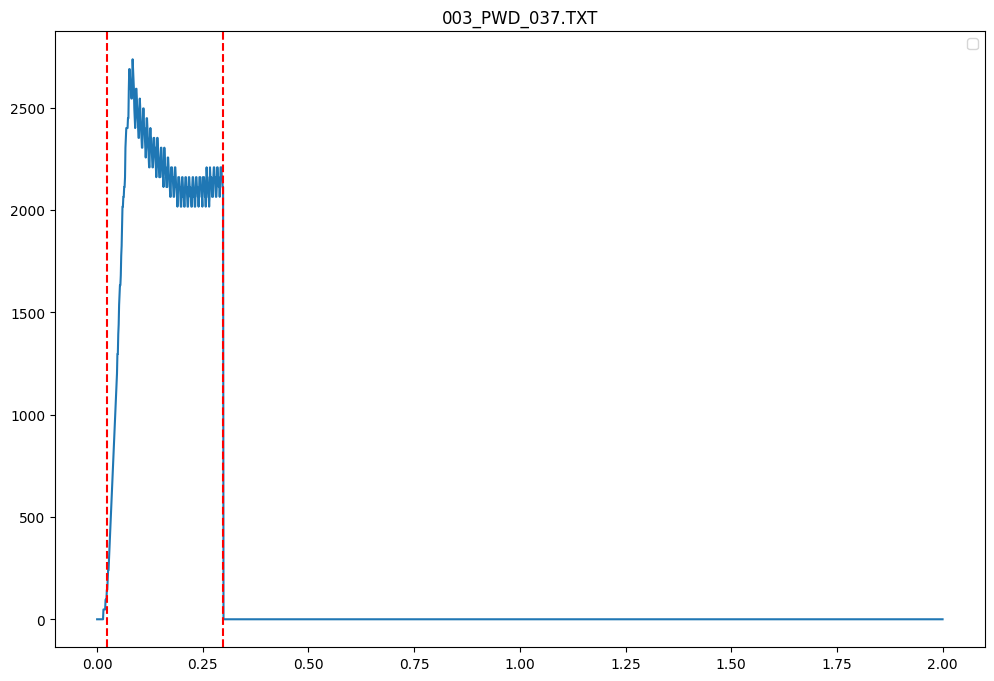

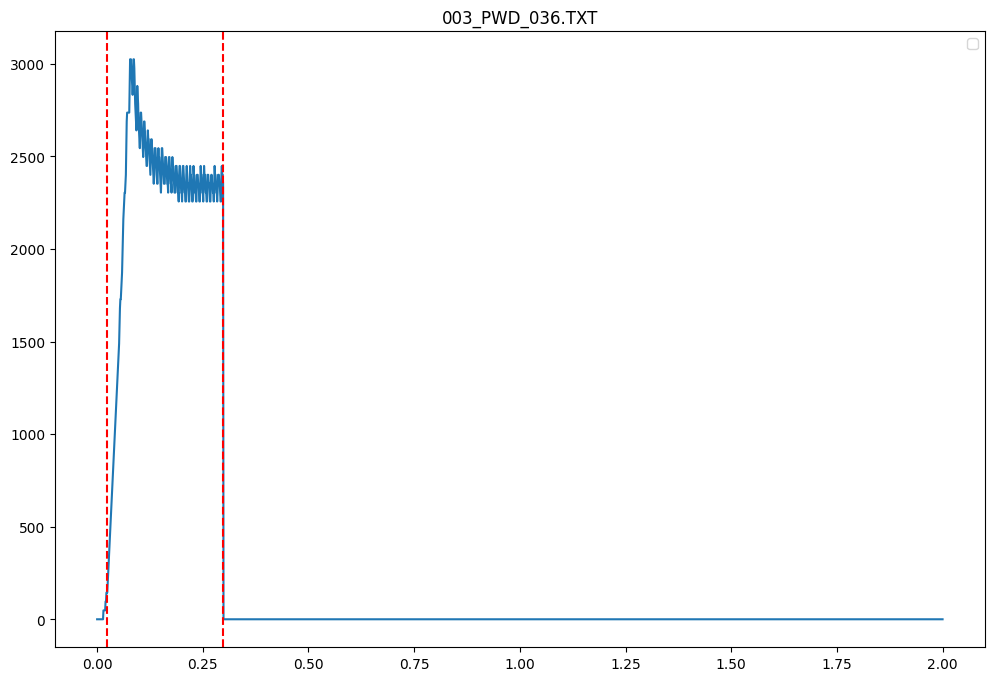

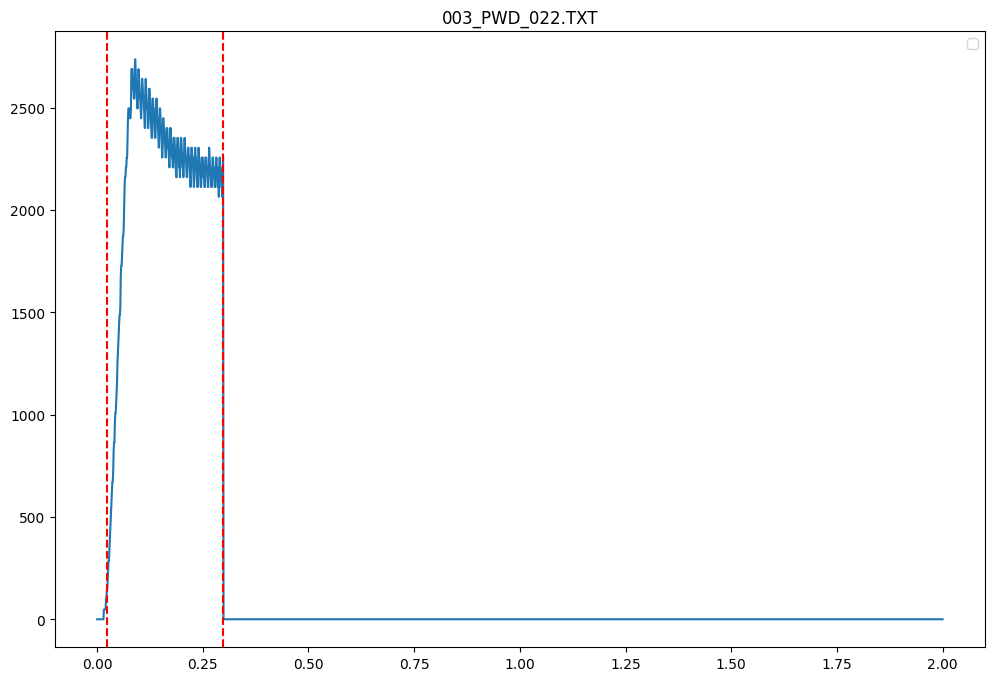

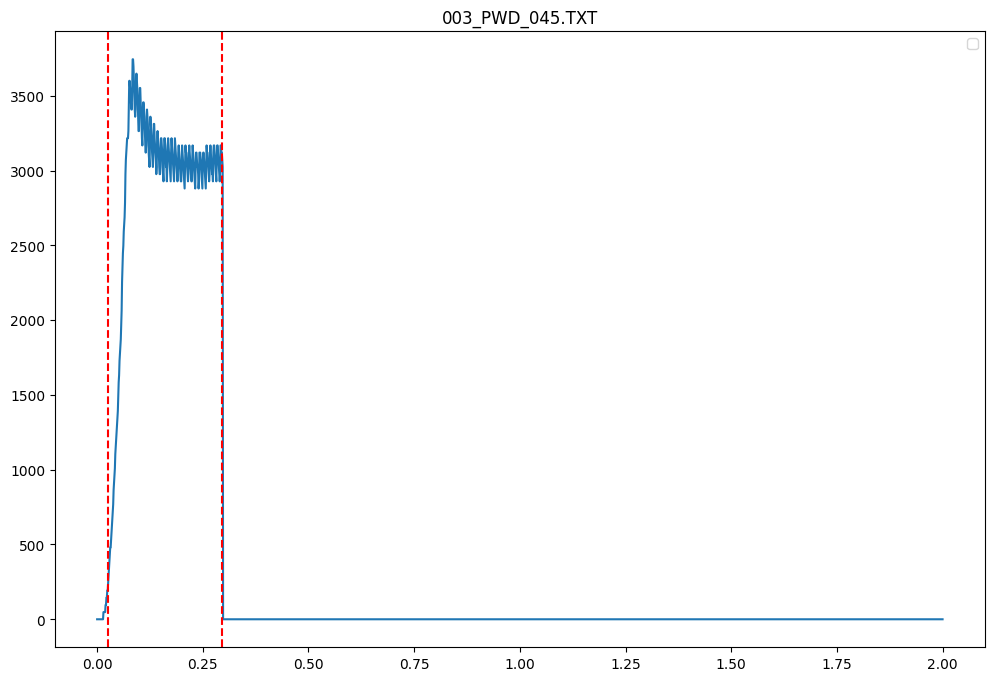

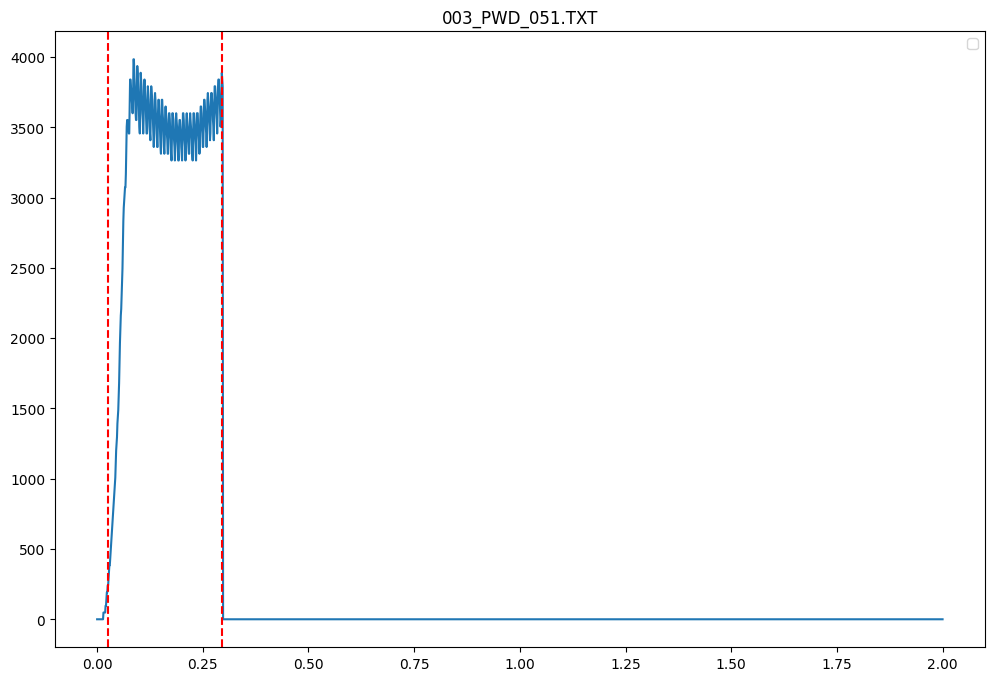

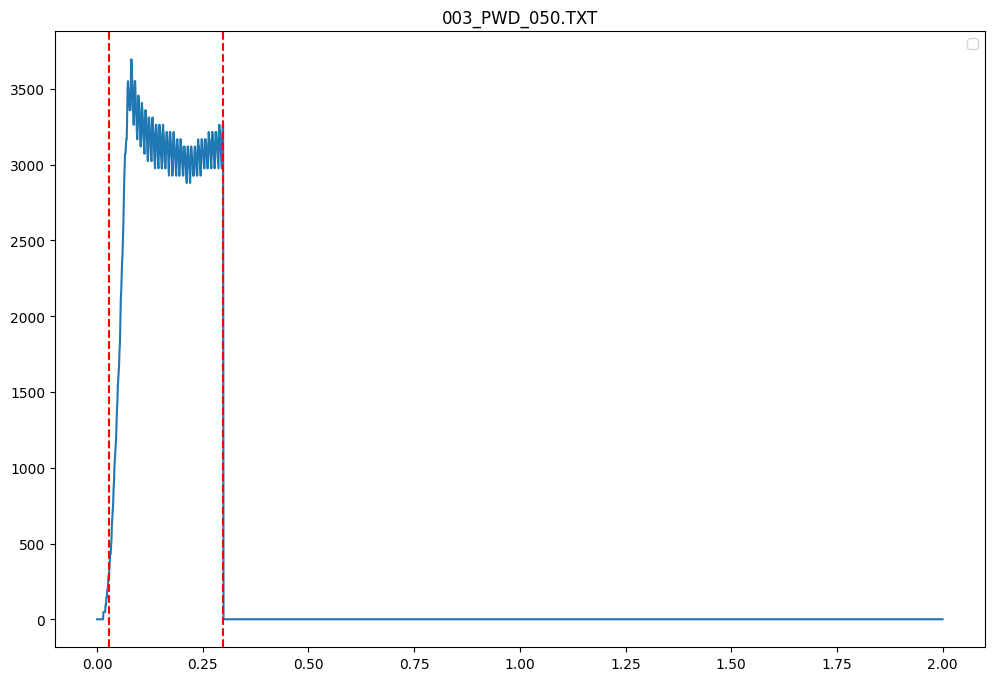

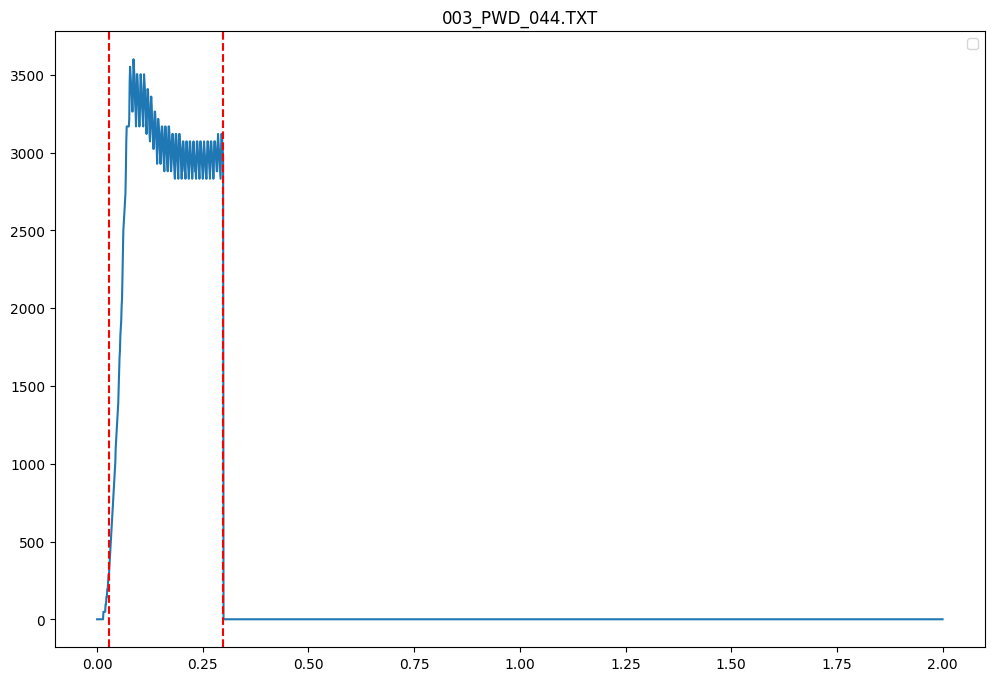

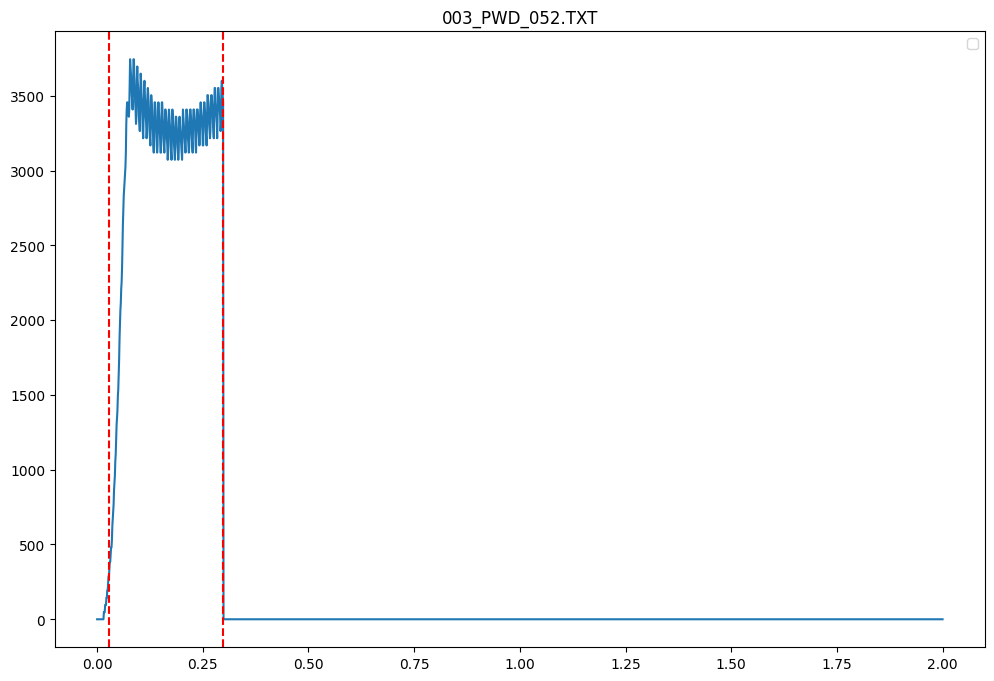

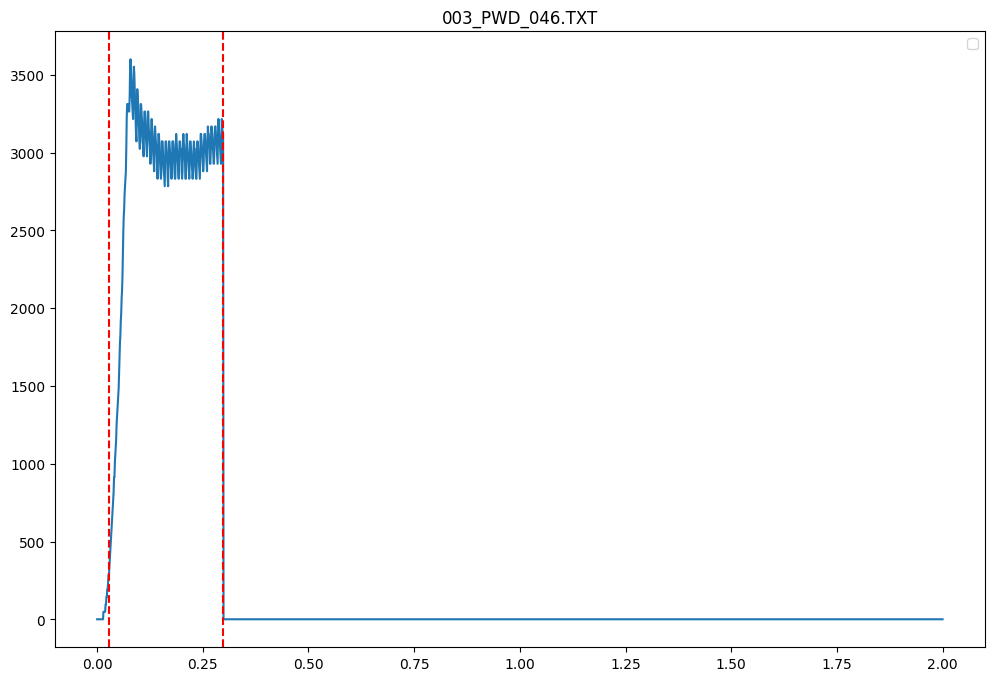

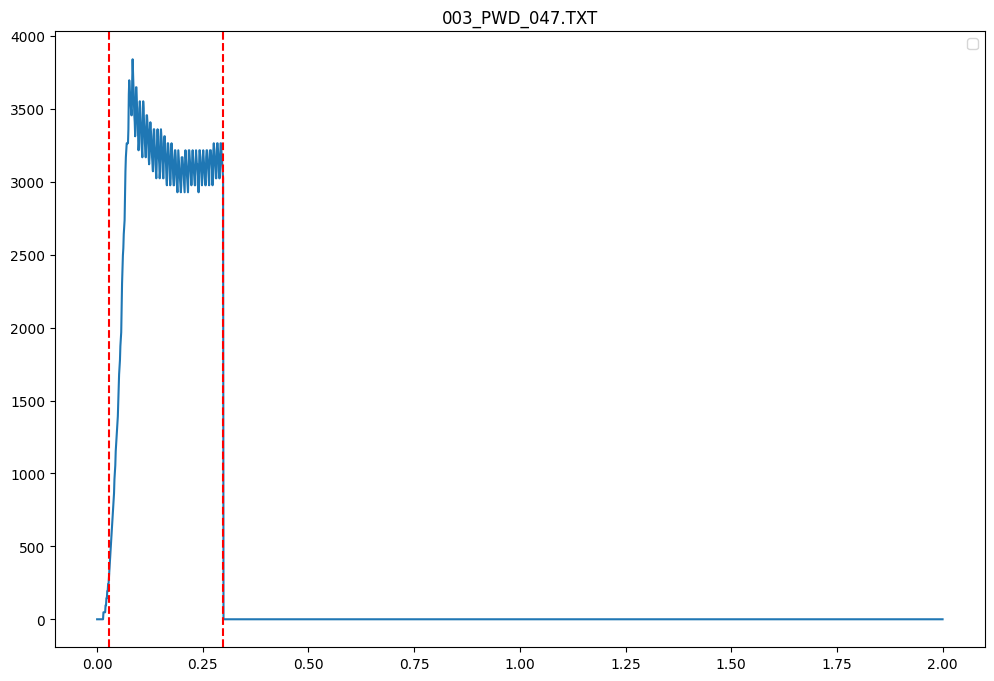

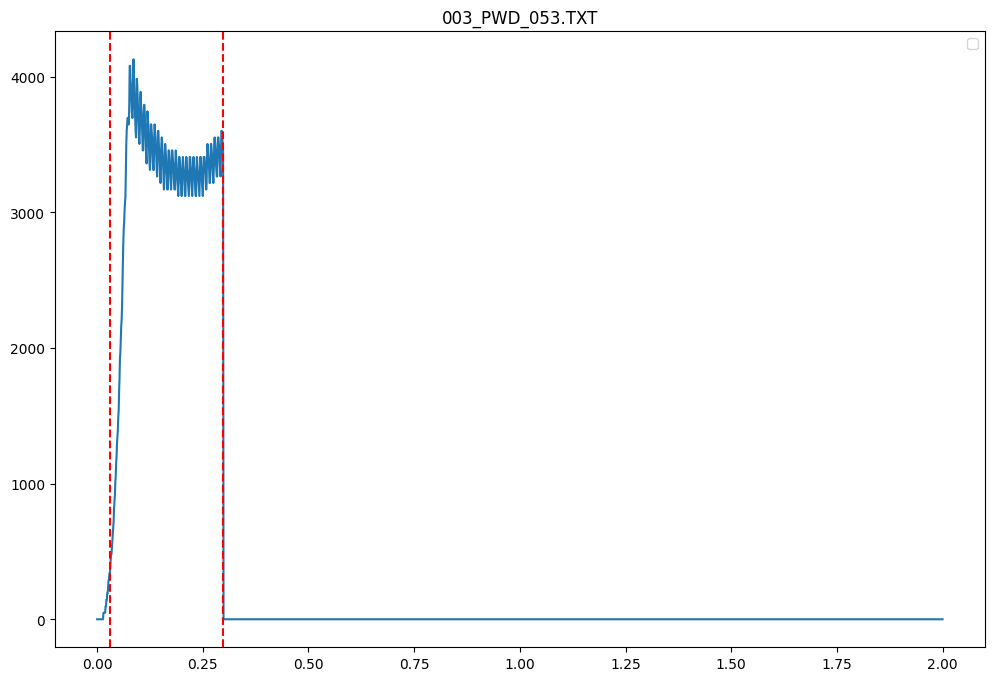

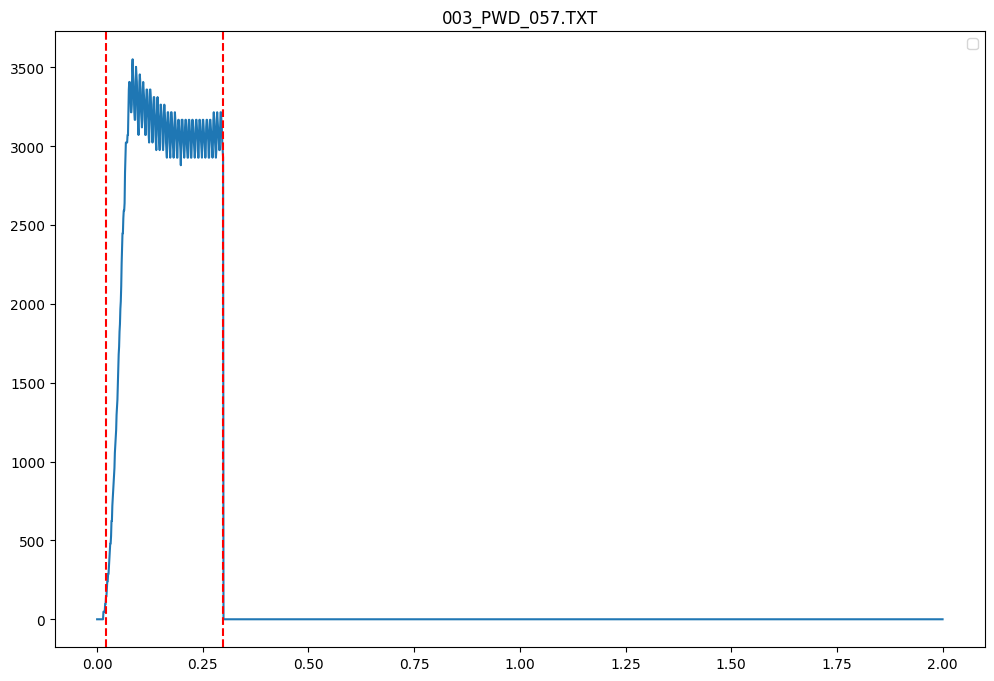

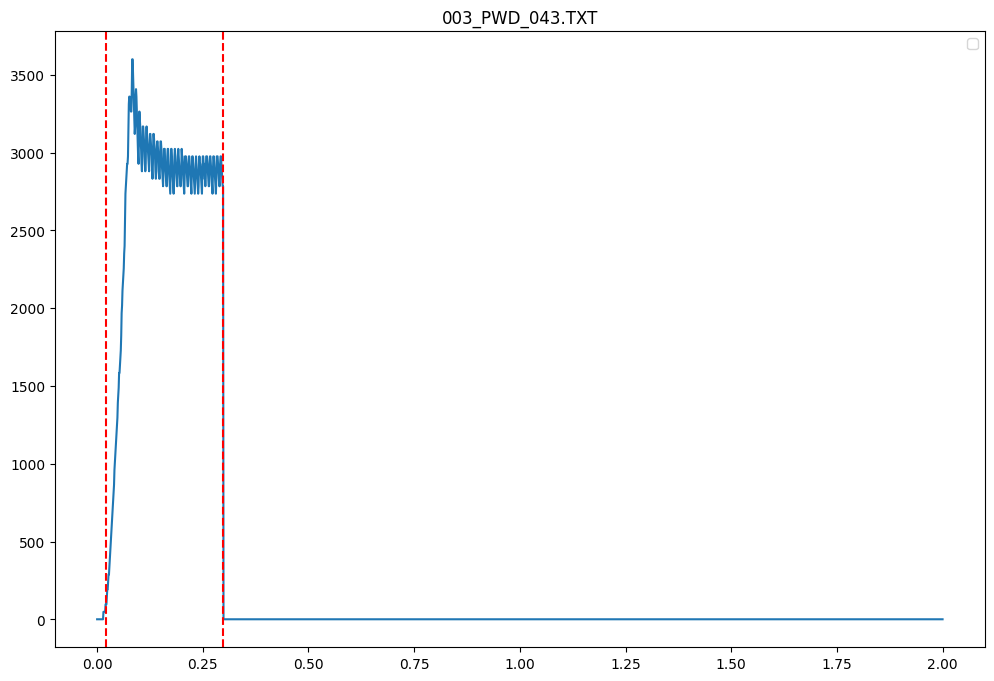

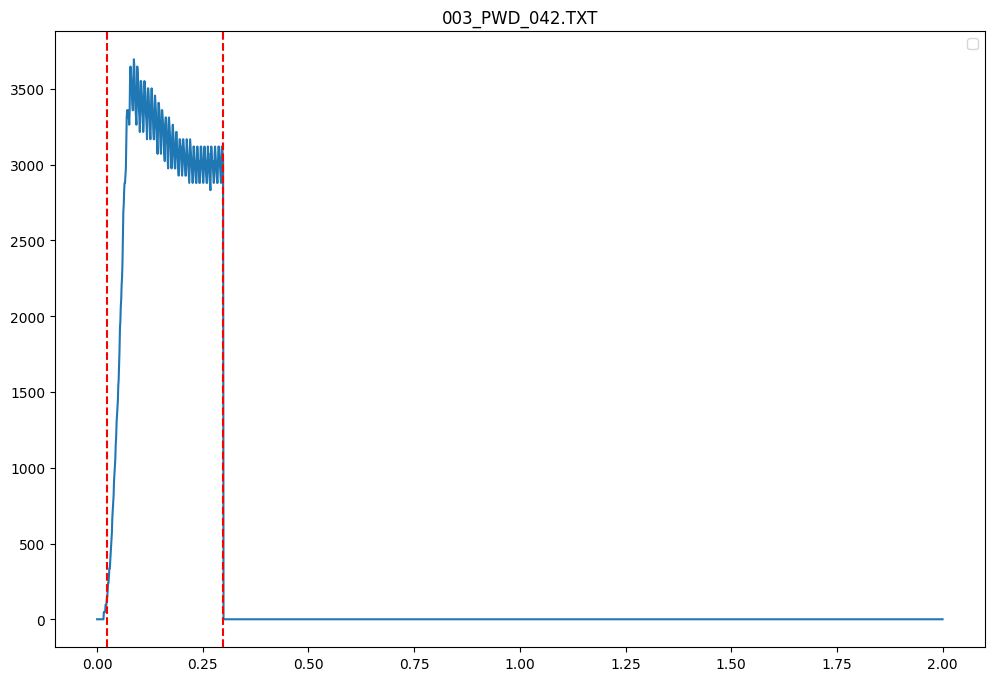

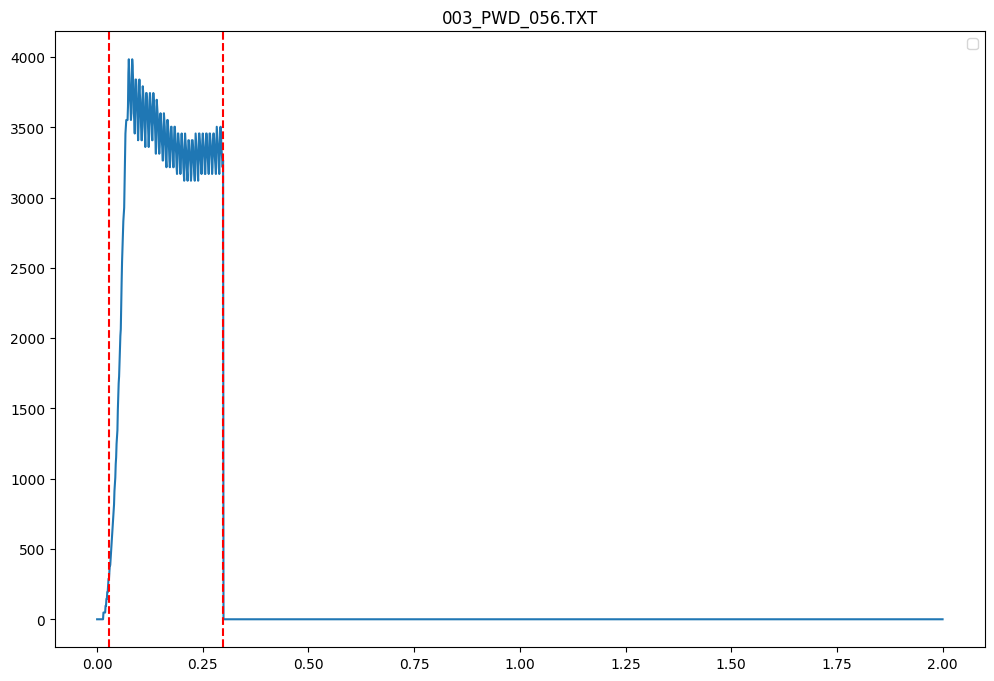

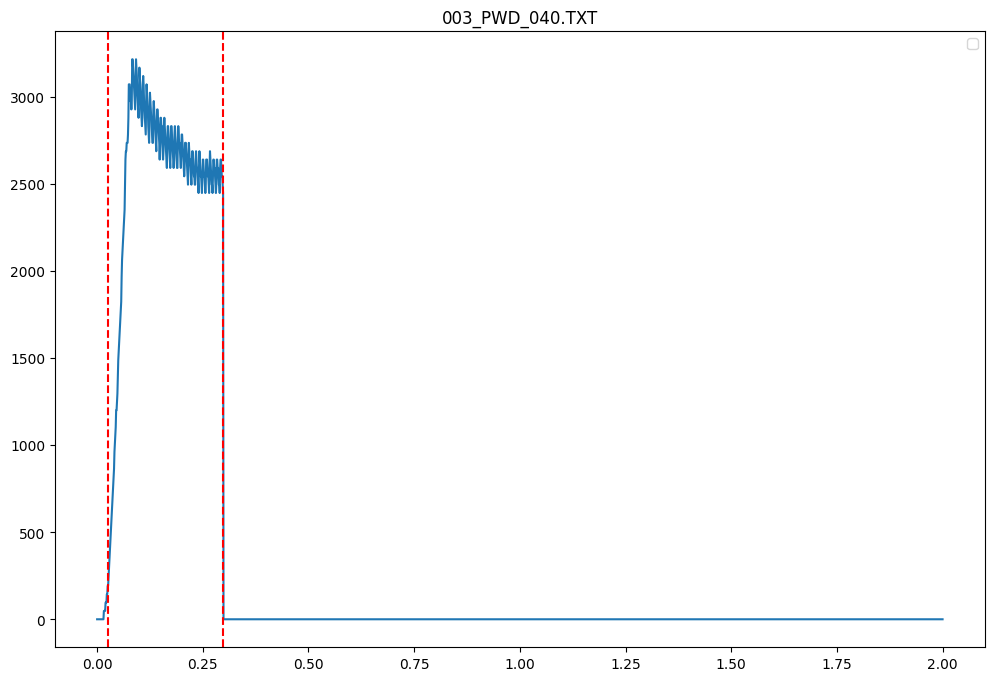

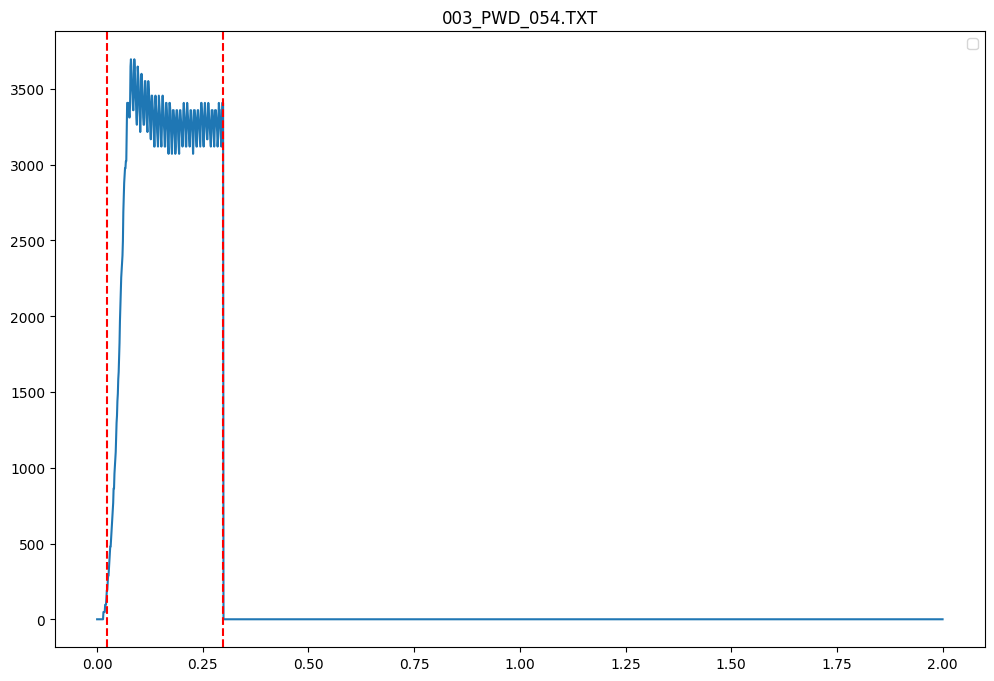

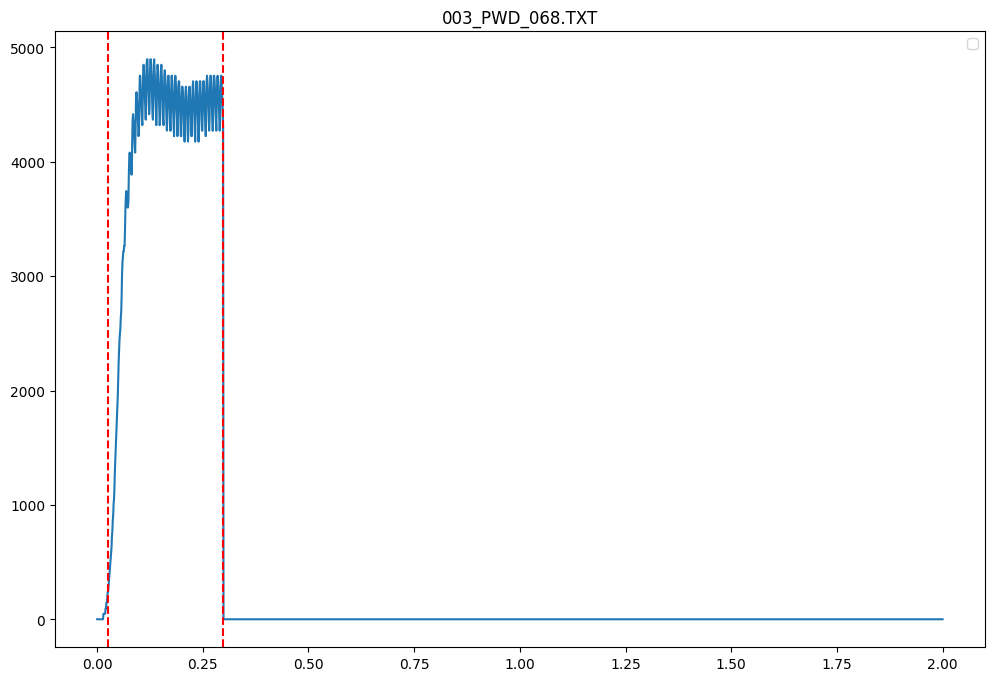

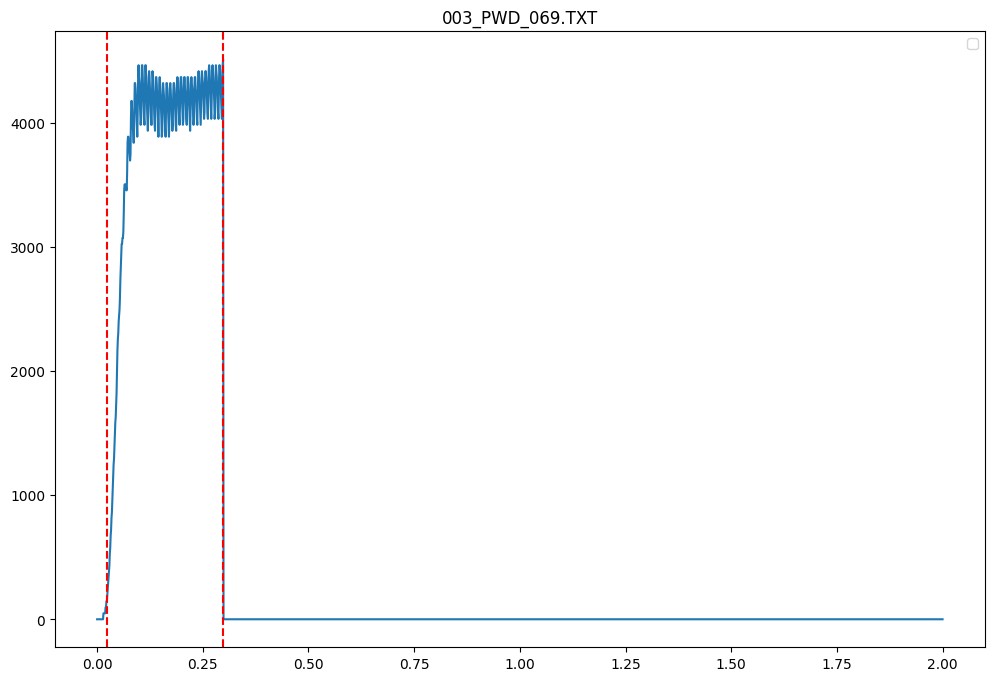

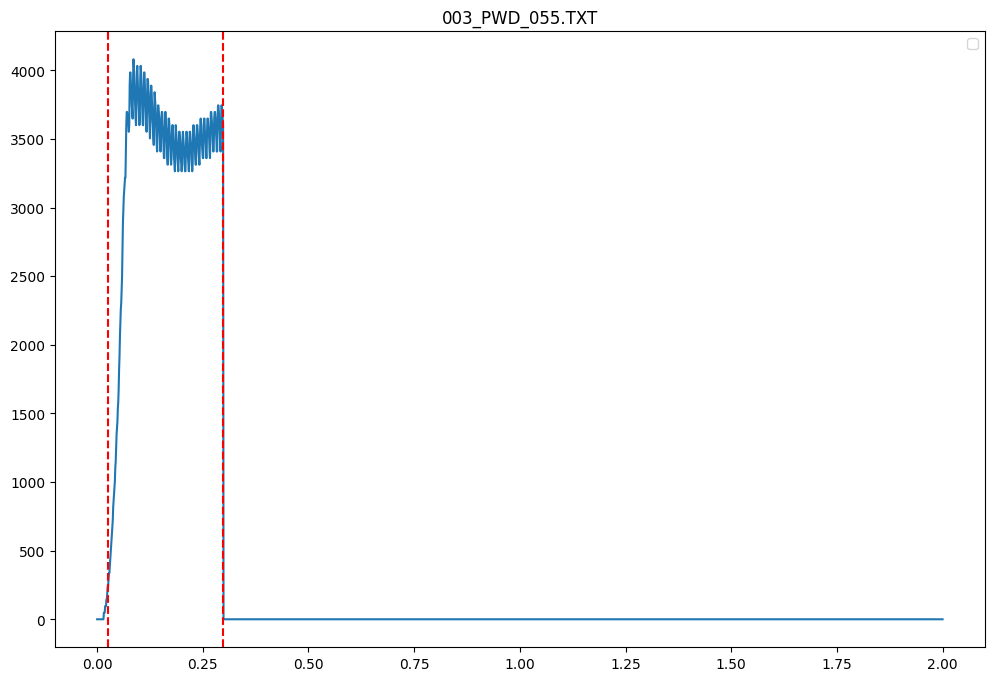

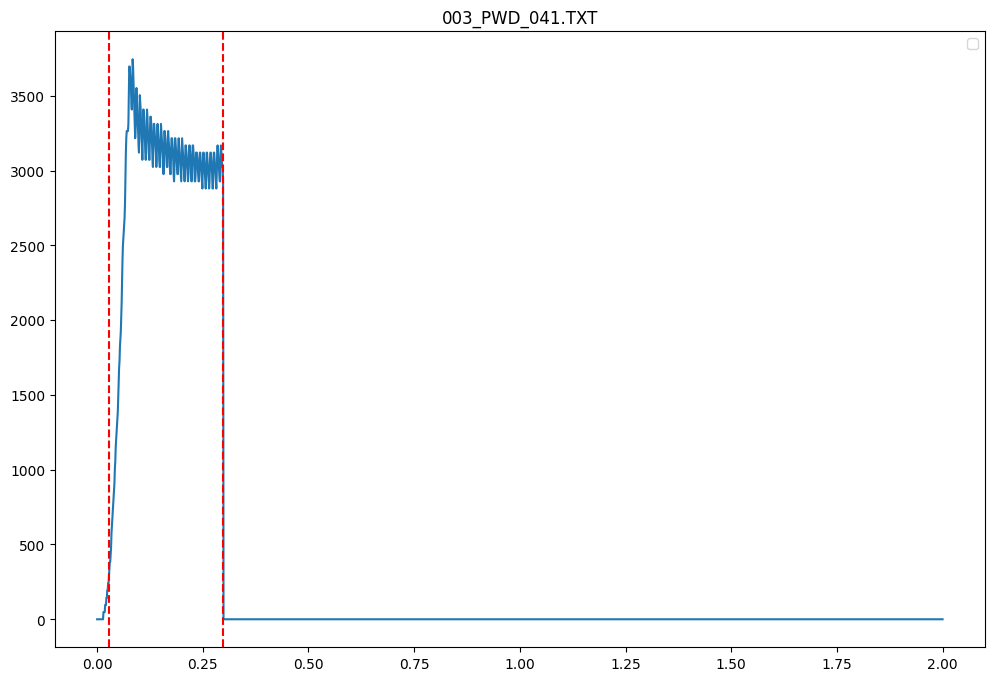

In [5]:
power_signals = os.listdir(base_path + "Power_Signals/")

for power_signal in power_signals:

    time = []
    power = []

    with open(base_path + "Power_Signals/" + power_signal, "r") as f:
        
        lines = f.readlines()
        
        for line in lines:
            
            time_, power_ = line.strip().split()
            
            time.append(float(time_))
            power.append(float(power_))

    # plt.figure(figsize=(12,8))
    # plt.title(power_signal)
    # plt.plot(time, power)
    # plt.show()

    # The main weld starts when we observe an increase in power 
    
    n = len(time)

    window = 2
    increase_threshold = 25

    ptr = 0
    while ptr < n:

        increase = 1 / window * sum([power[i + 1] - power[i] for i in range(ptr, ptr + window)])
        if increase >= increase_threshold:
            break

        ptr += window

    main_weld_start_idx = ptr

    # The main weld ends when we observe a decrease in power

    ptr = main_weld_start_idx + 100

    decrease_threshold = 500

    while ptr < n:

        decrease = 1 / window * sum([power[i] - power[i + 1] for i in range(ptr, ptr + window)])
        if decrease >= decrease_threshold:
            break

        ptr += window

    main_weld_end_idx = ptr

    plt.figure(figsize=(12,8))
    plt.title(power_signal)
    plt.plot(time, power)
    plt.axvline(x=time[main_weld_start_idx], color='r', linestyle='--')
    plt.axvline(x=time[main_weld_end_idx], color='r', linestyle='--')
    plt.legend()
    plt.show()

## Part 3.b


Feature generation (8 points): Create features following the steps below and record all
features in a .csv file (part3b.csv).

Each row corresponds to one experiment and each column
corresponds to one parameter/feature. 

The columns should follow this order: experiment
number, quality label, four features from group a, four features from group b, and four
features from group c. This table should be included in your report.


* Process output signals **-Group A-** (2 points): Welding pressure, pre-height, height, and
height change. The first three were recorded by the welder. Height change is the
difference between pre-height and the height.

* Time-domain features from power signals **-Group B-** (3 points): Brainstorm and
generate four features. In the report, provide the definitions of all features and a
justification of why these features may be helpful.

* Frequency-domain features from force signals **-Group C-** (3 points): Generate the
following features: 1st peak frequency and magnitude, 2nd peak frequency and
magnitude.

In [ ]:
name = "part3b.csv"
col_names = ["experiment number", "quality label", "featA1", "featA2", "featA3", "featA4", "featB1", "featB2", "featB3", "featB4", "featC1" , "featC2", "featC3", "featC4"]
file  = './data/part3/WeldClassification.xls'

df = pd.read_excel(file, skiprows=6)

dataframe ={ col_names[0]: df['Run No.'], col_names[1]: df['Class Label'], col}

Run No.  Amplitude [μm]  Time [sec]  Pressure [psi]  Energy [J]  \
0         2              30         0.3              10         357   
1         3              30         0.3              10         368   
2         4              30         0.3              10         353   
3         5              30         0.3              10         347   
4         6              30         0.3              10         356   
..      ...             ...         ...             ...         ...   
64       66              30         0.3              75        1133   
65       67              30         0.3              75        1177   
66       68              30         0.3              75        1169   
67       69              30         0.3              75        1100   
68       70              30         0.3              75        1151   

    Power [W]  PreHeight [mm]  Height [mm]  Max. Load at Peel Test [N]  \
0        1656            0.81         0.67                       36.28   
1        1752            0.83         0.67                       48.01   
2        1632            0.78         0.63                       39.83   
3        1632            0.81         0.67                       31.63   
4        1656            0.83         0.67                       36.57   
..        ...             ...          ...                         ...   
64       5016            0.64         0.37                       45.10   
65       5040            0.68         0.40                       49.69   
66       5112            0.68         0.38                       54.25   
67       4680            0.68         0.44                       56.33   
68       5016            0.67         0.38                       50.17   

   Class Label  
0            I  
1            I  
2            I  
3            I  
4            I  
..         ...  
64          II  
65          II  
66          II  
67          II  
68          II  

[69 rows x 10 columns]